###  Import Necessary Libraries:

In [1092]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Read the Dataset

In [1093]:
csv_path = 'PEP1.csv'
df = pd.read_csv(csv_path)

### Head

In [1094]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Tail

In [1095]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

#### Note : PoolQC is NaN

### DataTypes

In [1096]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Columns

In [1097]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

### 1. a. Shape:

In [1098]:
df.shape

(1460, 81)

In [1099]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

### 1.b. Null Values:

In [1100]:
NULL_Values = df.isnull().sum()
NULL_Values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

#### Visualize Plot for number of NaN Values to understand threshold to eliminate unwanted features

<AxesSubplot:>

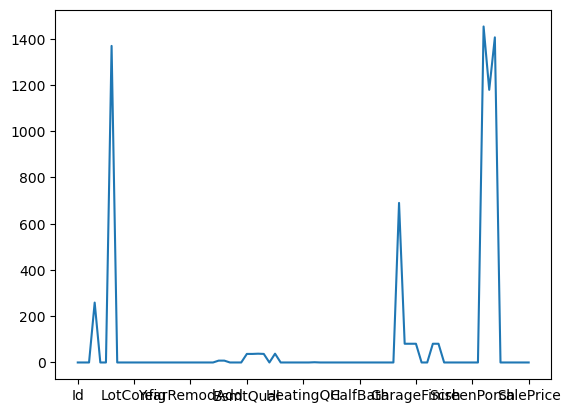

In [1101]:
NULL_Values.plot()

#### Features which have too many NaN values (we can drop those features eventually)

In [1102]:
threshold = 600
indx = [i for i, val in enumerate(NULL_Values) if val > threshold]
print(NULL_Values[indx])
print(df.iloc[:,indx])    

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64
     Alley FireplaceQu PoolQC  Fence MiscFeature
0      NaN         NaN    NaN    NaN         NaN
1      NaN          TA    NaN    NaN         NaN
2      NaN          TA    NaN    NaN         NaN
3      NaN          Gd    NaN    NaN         NaN
4      NaN          TA    NaN    NaN         NaN
...    ...         ...    ...    ...         ...
1455   NaN          TA    NaN    NaN         NaN
1456   NaN          TA    NaN  MnPrv         NaN
1457   NaN          Gd    NaN  GdPrv        Shed
1458   NaN         NaN    NaN    NaN         NaN
1459   NaN         NaN    NaN    NaN         NaN

[1460 rows x 5 columns]


#### 1.b. All Features with Null Values

In [1103]:
threshold = 1
indx = [i for i, val in enumerate(NULL_Values) if val > threshold]
print(NULL_Values[indx])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


#### Make ID as the index :

In [1104]:
df.set_index(['Id'],inplace=True)

In [1105]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### 1.c. Unique Variables:

In [1107]:
for col in df.columns:
  print(f"Unique values in column {col}: {df[col].unique()}")

Unique values in column MSSubClass: [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column LotFrontage: [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column LotArea: [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column Street: ['Pave' 'Grvl']
Unique values in column Alley: [nan 'Grvl' 'Pave']
Unique values in column LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
U

### 2. Generate a separate dataset for numerical and categorical variables

In [1108]:
# select only the numerical variables
df_num = df.select_dtypes(include=['float64', 'int64'])

# select only the categorical variables
df_cat = df.select_dtypes(include=['object'])

### Categorical Variable

In [1109]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns 

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### 4.a. Missing Value Treatment for Categorical Variables:

In [1110]:
# Evaluate How many Null Values we have in Categorical Features 
df[categorical_columns]
NULL_Values_Categorical = df[categorical_columns].isnull().sum()
threshold = 1
indx = [i for i, val in enumerate(NULL_Values_Categorical) if val > threshold]
print(NULL_Values_Categorical[indx])

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1111]:
# For Categorical Features : If No. of Null values is higher than 600 we can Drop them and
# for  features with lower number of Null values we can use the 'mode' of other available rows
# Else we can create another section called : 'Missing'
threshold_high = 600
indx_high_threshold = [i for i, val in enumerate(NULL_Values_Categorical) if val > threshold_high]
print(NULL_Values_Categorical[indx_high_threshold])


Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


In [1112]:
threshold_low = 600
indx_low_threshold = [i for i, val in enumerate(NULL_Values_Categorical) if val < threshold_low and val >1]
print(NULL_Values_Categorical[indx_low_threshold])


MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64


In [1113]:
# replace the Nulls in other columns with "Missing"
cols = df_cat.columns
for col in cols:
    df_cat[col].fillna("Missing", inplace=True)

In [1114]:
# drop Selected Columns with high categorical Nulls
df_cat = df_cat.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

### Numeric Variable

In [1115]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### 3.a. Missing value treatment for Numeric Variable

In [1116]:
# Evaluate How many Null Values we have in Numerical Features 
df[numeric_columns]
NULL_Values_Numeric = df[numeric_columns].isnull().sum()
threshold = 1
indx = [i for i, val in enumerate(NULL_Values_Numeric) if val > threshold]
print(NULL_Values_Numeric[indx])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [1117]:
# We can see that only a few Feature Columns with Null values
# LotFrontage and  is "linear feet of street connected" : Missing values can be trated using mean
# MasVnrArea : "Area in feet^2": Missing values can be trated using mean
# GarageYrBlt : We can not take mean value for this, we can just equate this to YearBuilt 
# but in all 81 cases Garage is Missing!!! 

# df['equal'] = pd.to_numeric(df['GarageYrBlt'])== df['YearBuilt']
# false_count = (df['equal'] == False).sum()
# print(false_count)
# The above code shows us that 371 values of Year Built and GarageYrBlt are different. which is a small % of the 
# total dataset. So we can just drop the GarageYrBlt as a feature. 

df_num = df_num.drop(columns=['GarageYrBlt'])

#### Zero Imputation: 

In [1118]:
# Since 8 rows of MasVnrType Features are none, we can say that MasVnrArea for those rows can be 0 
df_num['MasVnrArea'].fillna(0, inplace=True)

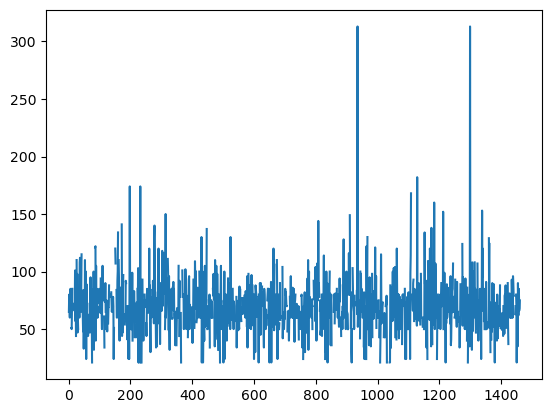

In [1119]:
# Understand LotFrontage Numeric Feature :
plt.plot(df_num['LotFrontage'])

In [1120]:
mean = df_num['LotFrontage'].mean()
df_num['LotFrontage'].fillna(mean, inplace=True)

#### Ensure All Missing Values are treated in the seperate _num and _cat df:

In [1121]:
NULL_Values_test = df_num.isnull().sum()
NULL_Values_test

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
Bedroom          0
Kitchen          0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [1122]:
NULL_Values_test = df_cat.isnull().sum()
NULL_Values_test

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

### EDA

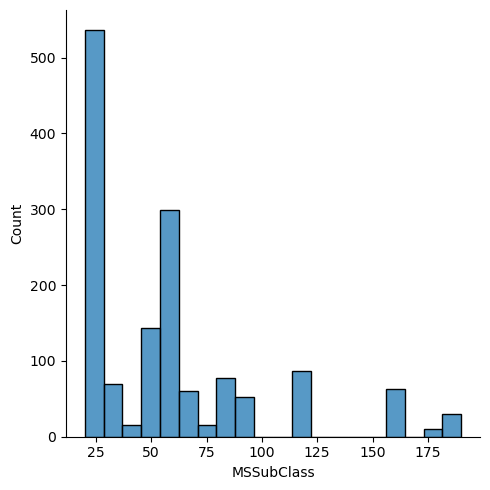

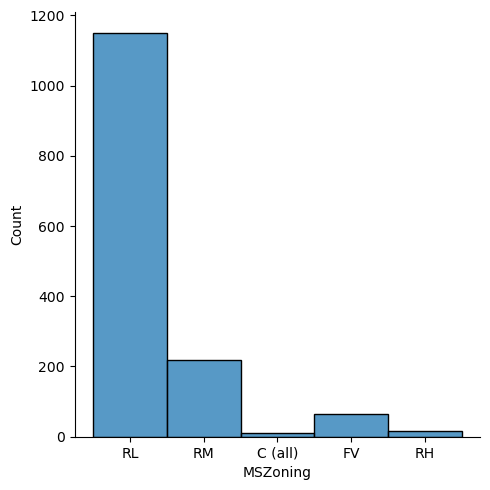

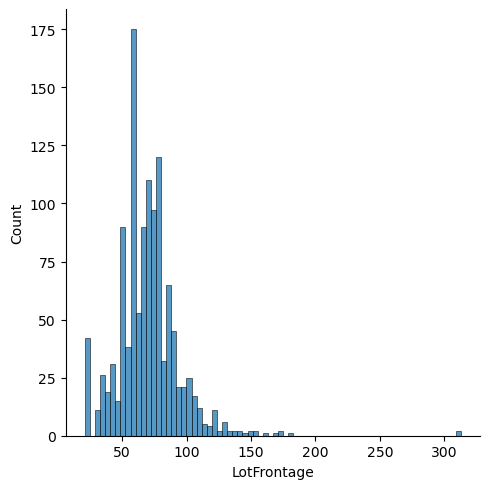

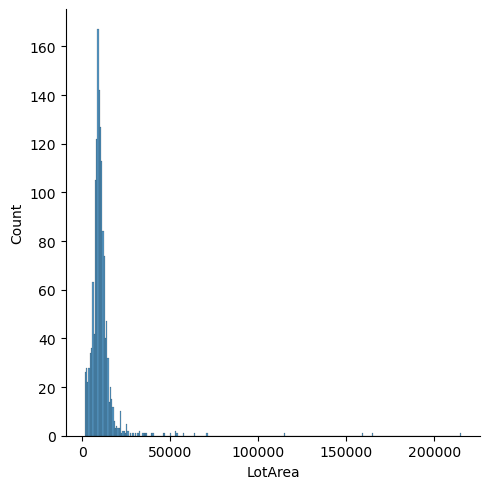

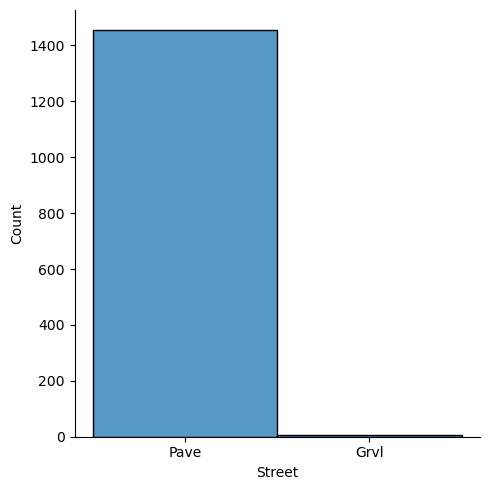

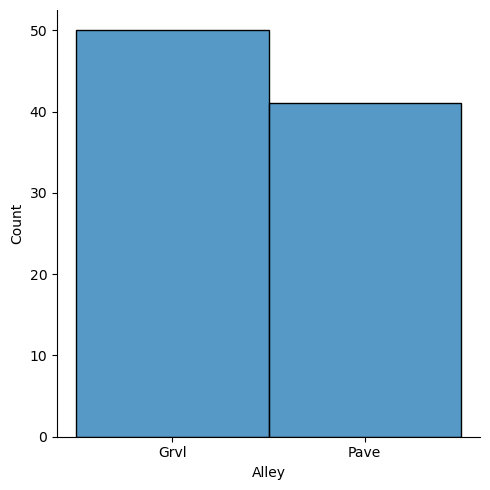

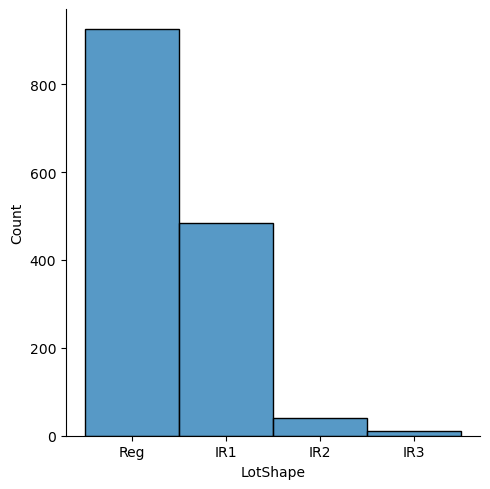

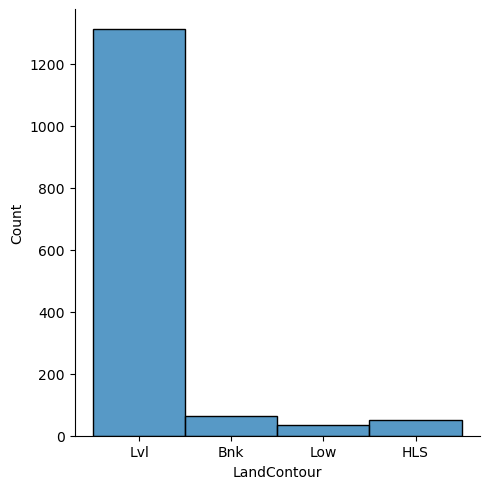

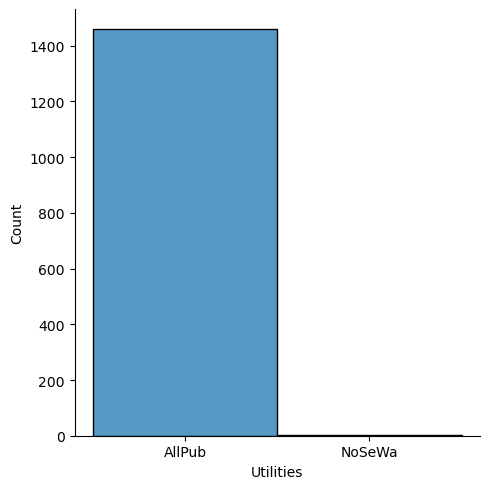

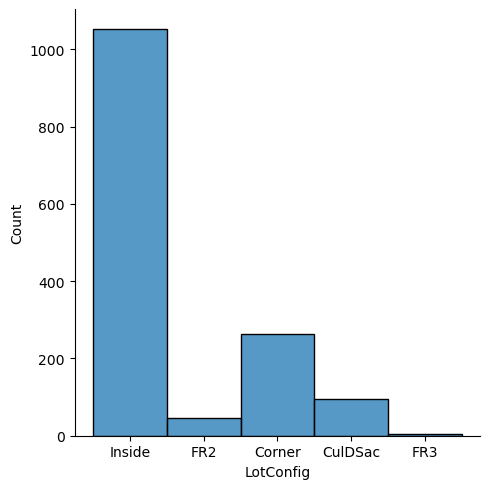

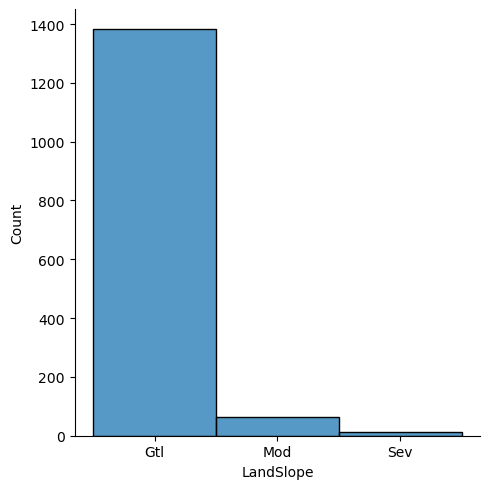

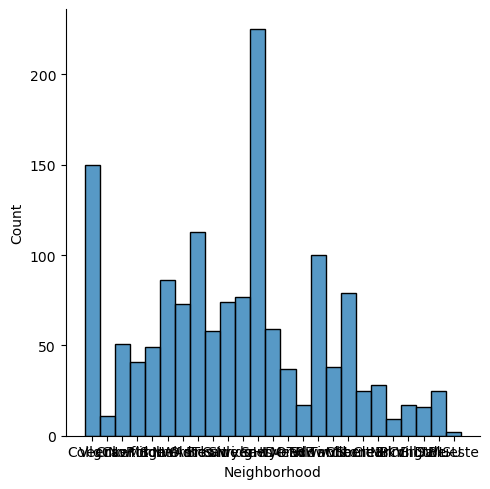

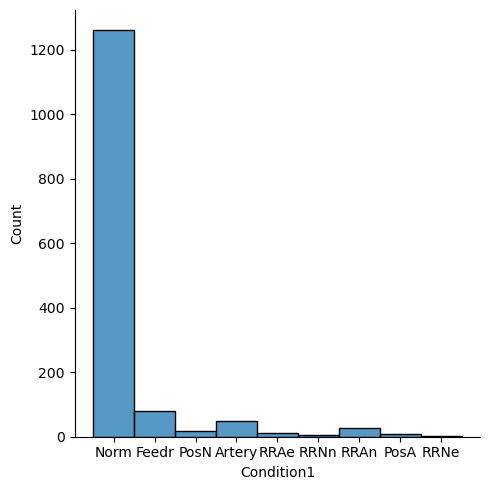

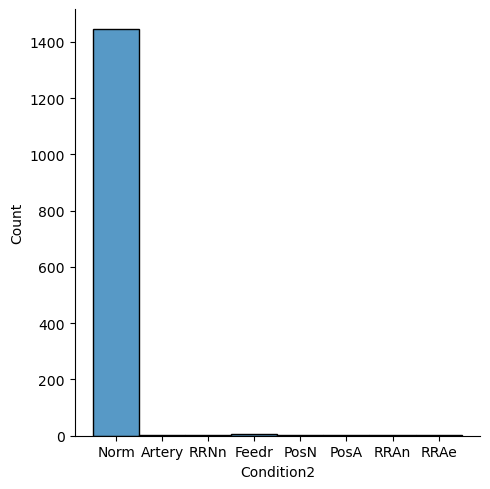

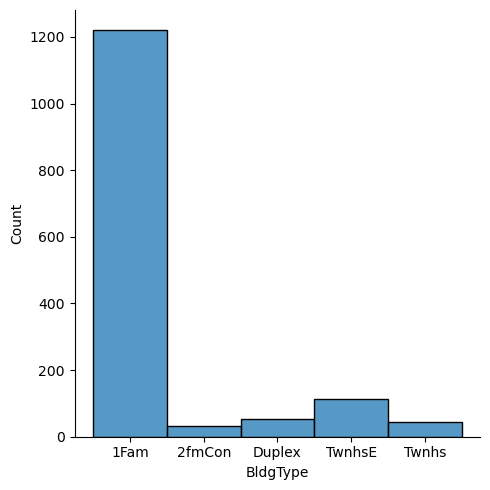

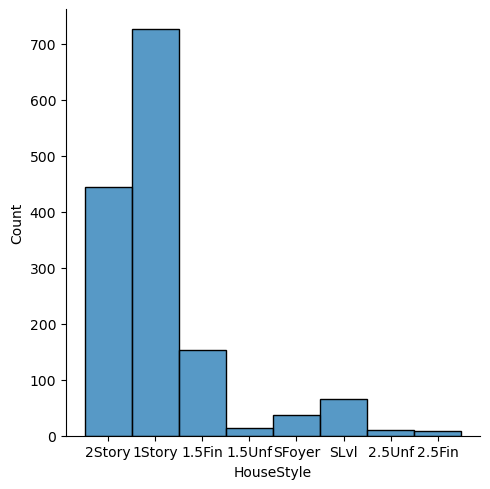

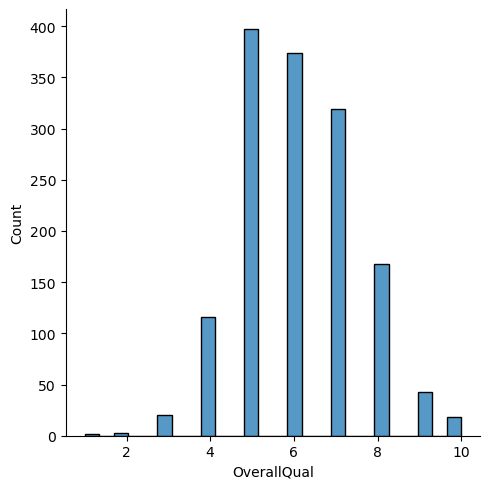

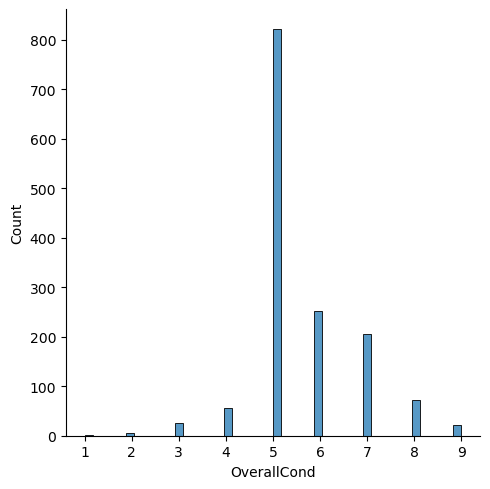

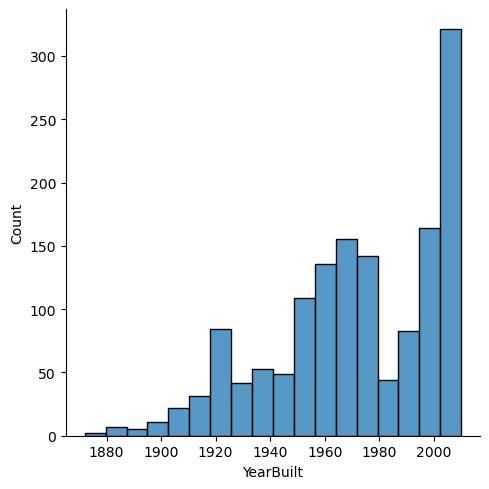

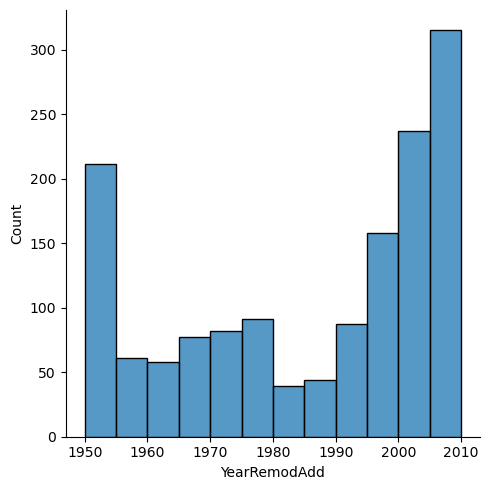

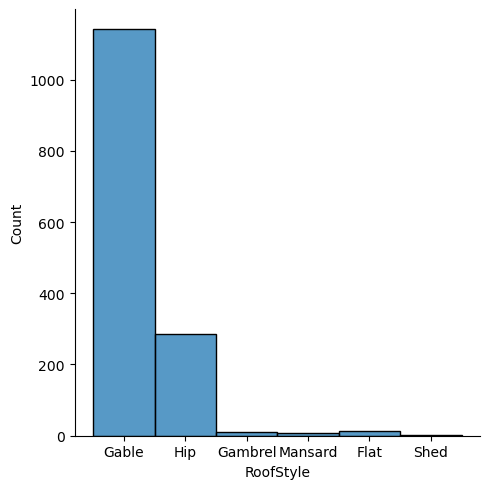

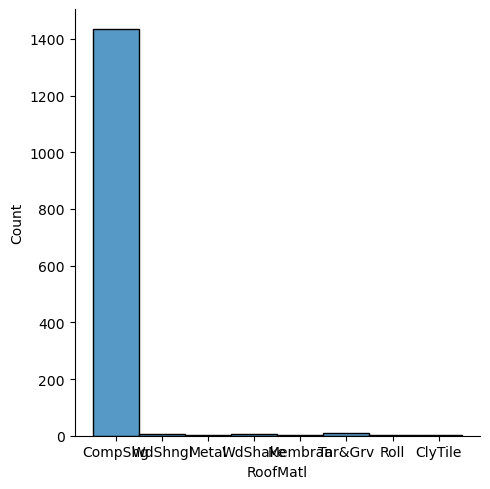

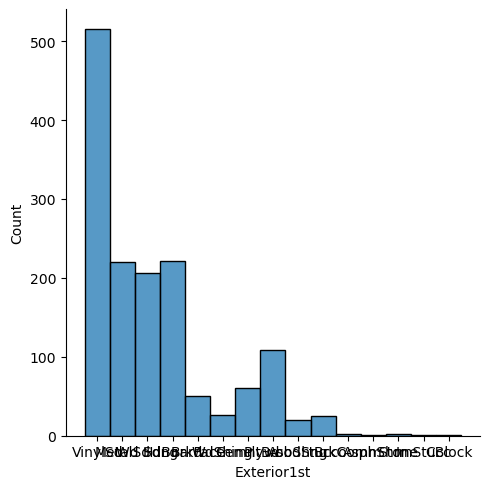

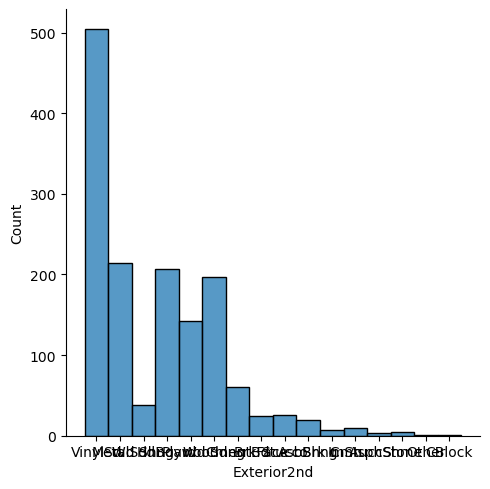

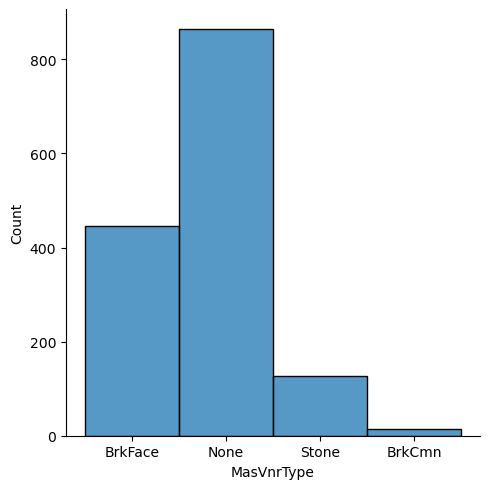

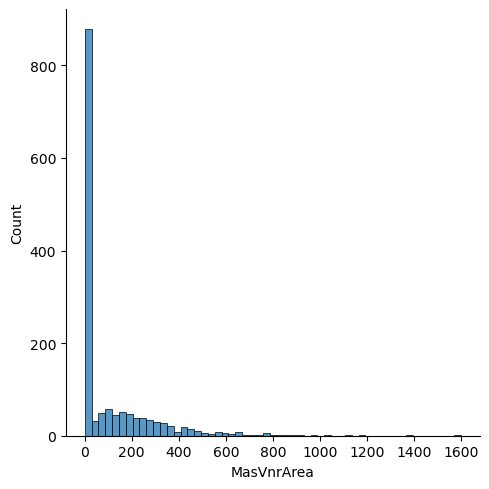

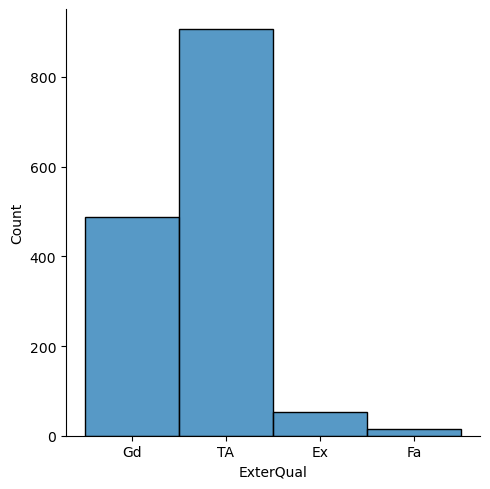

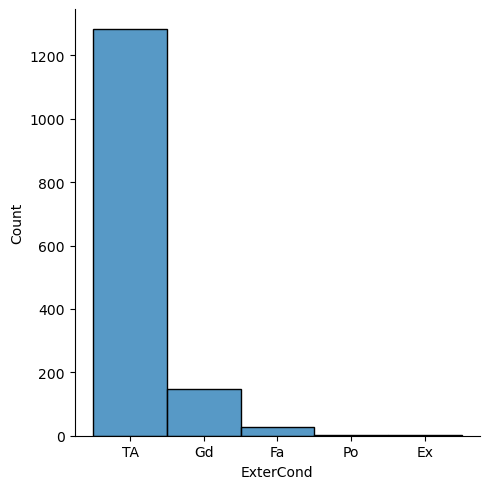

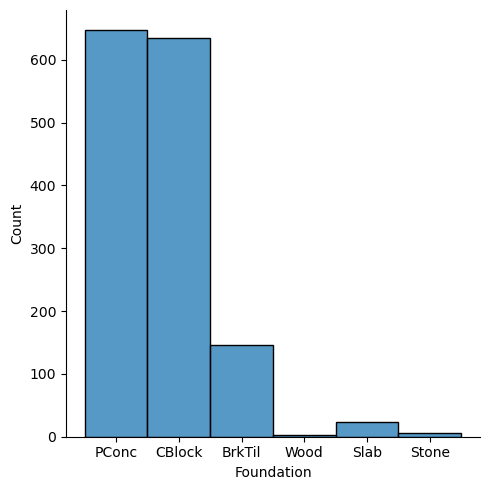

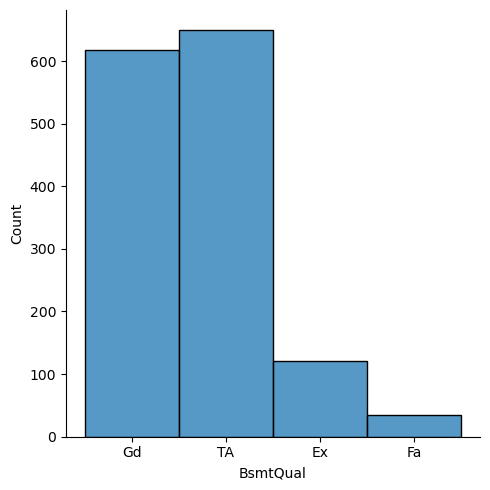

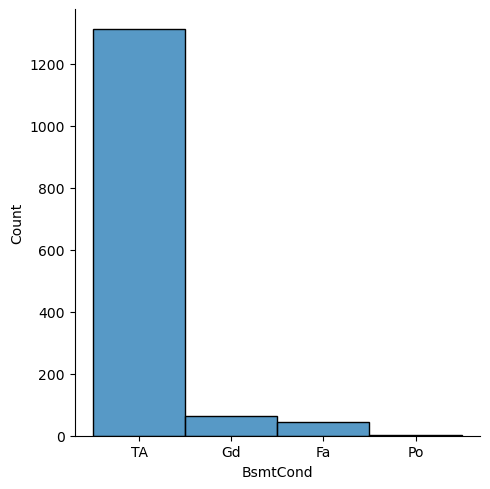

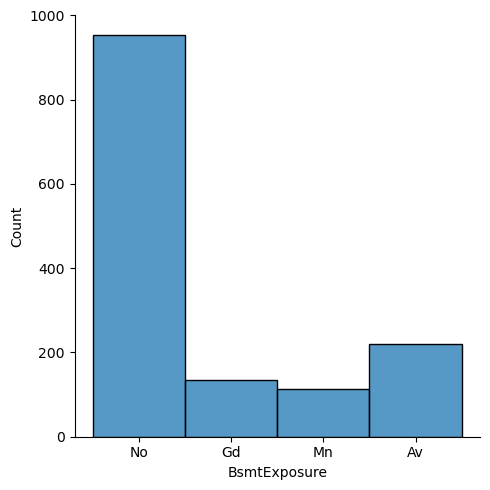

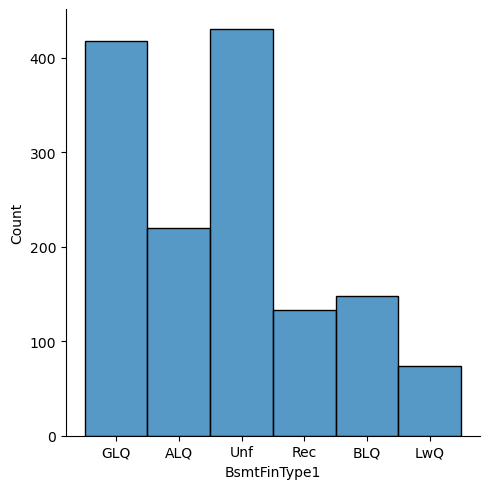

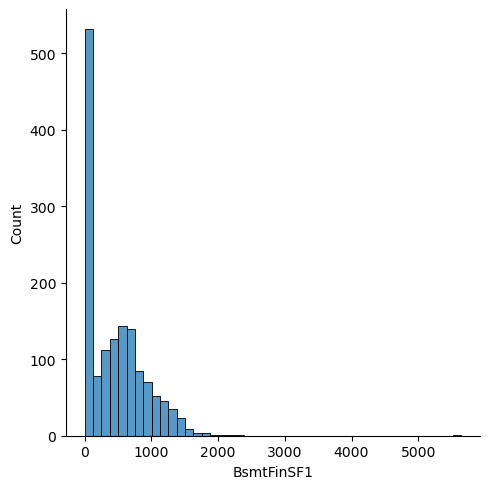

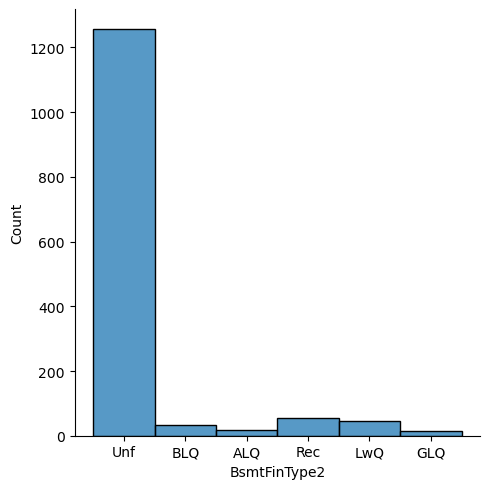

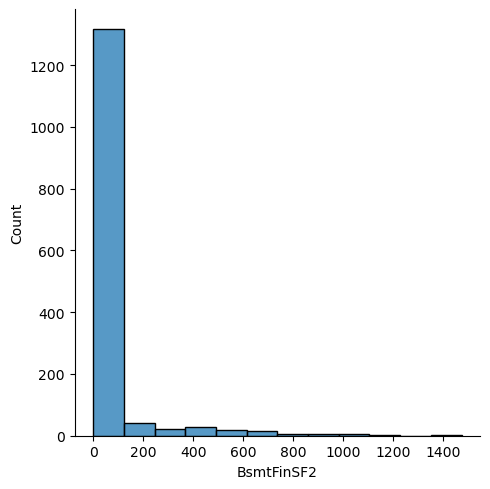

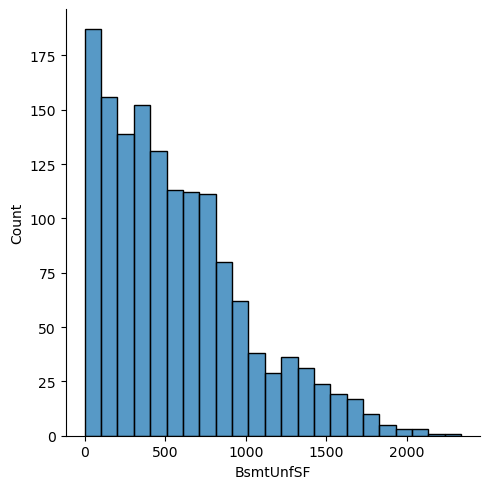

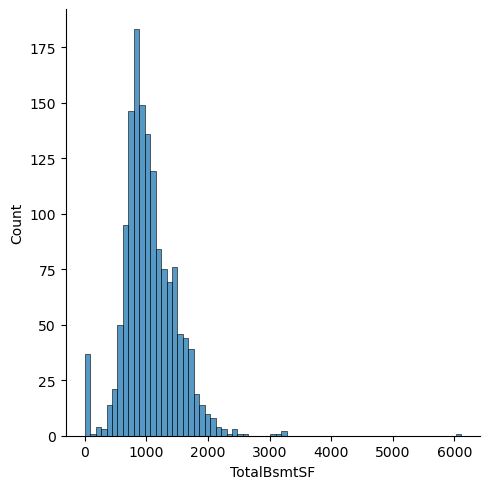

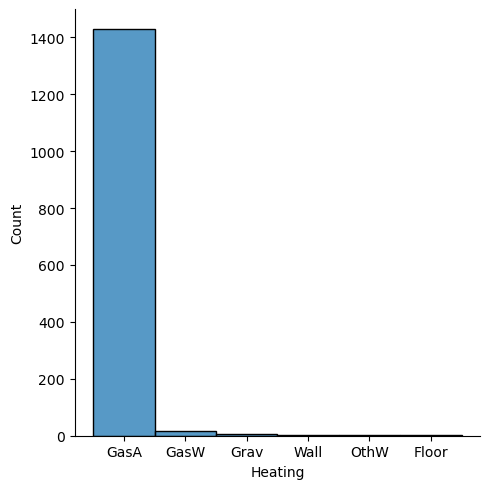

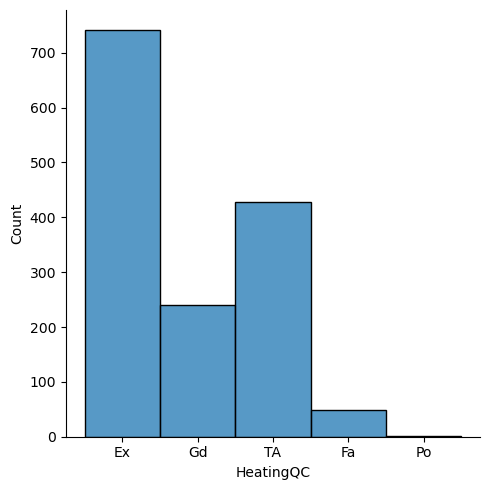

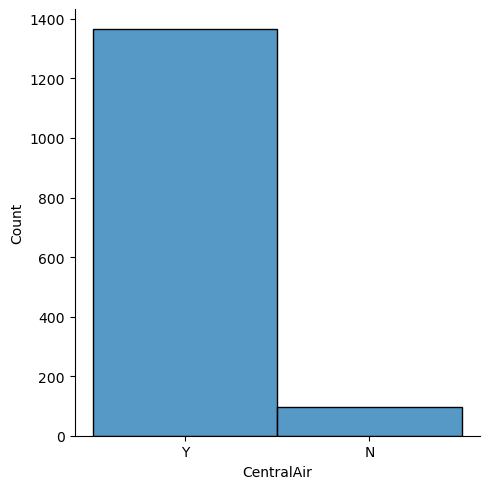

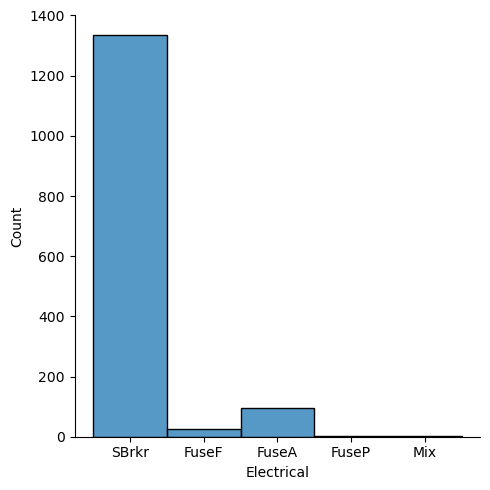

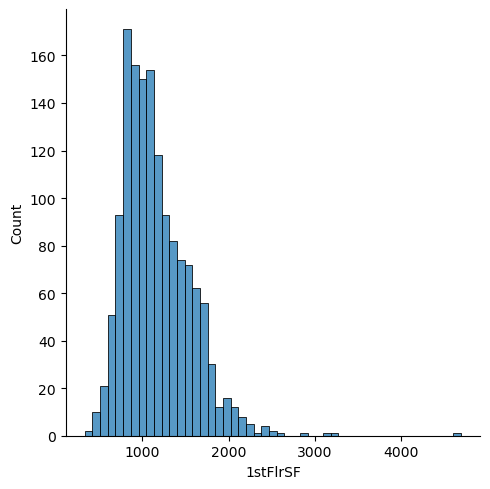

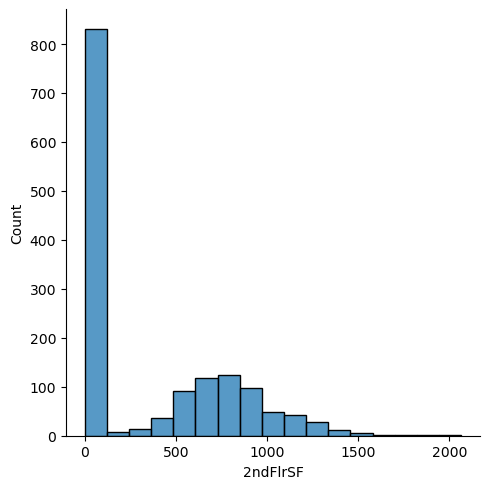

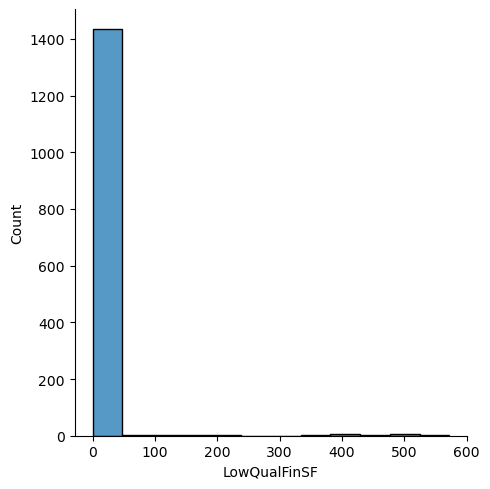

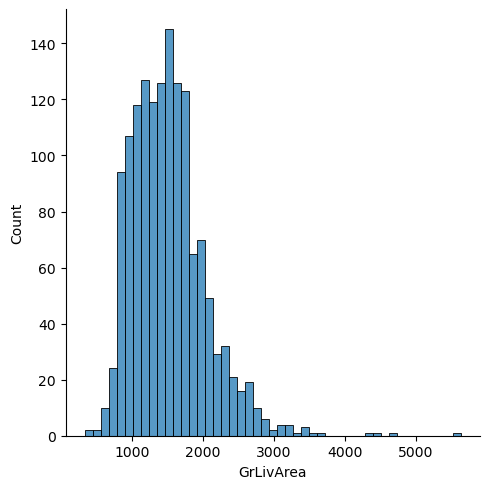

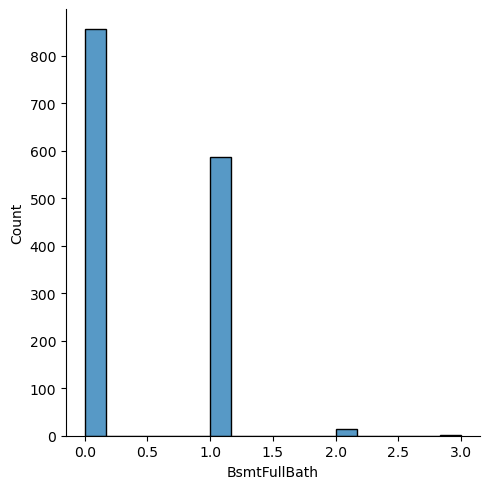

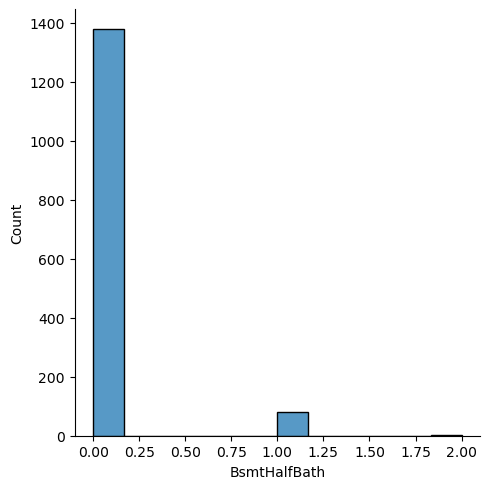

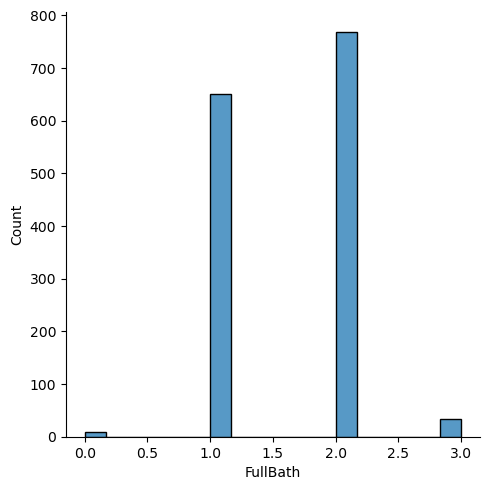

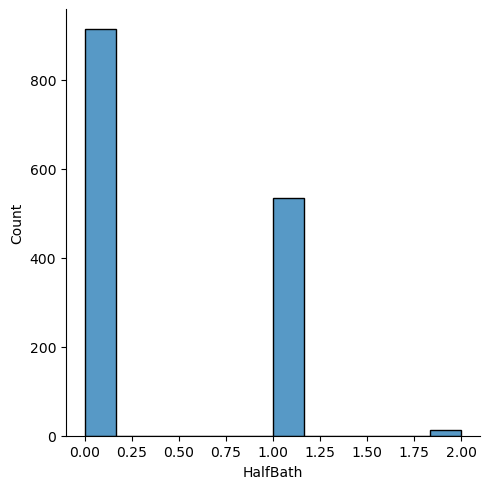

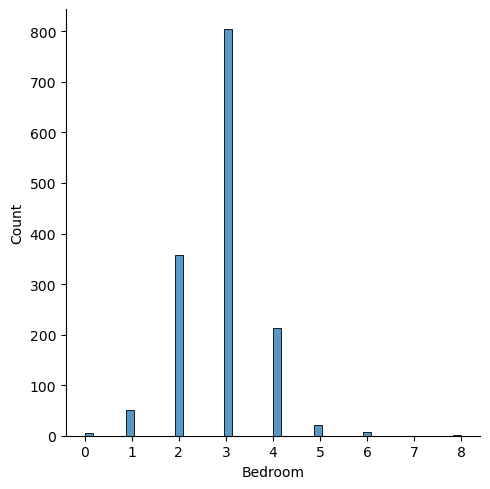

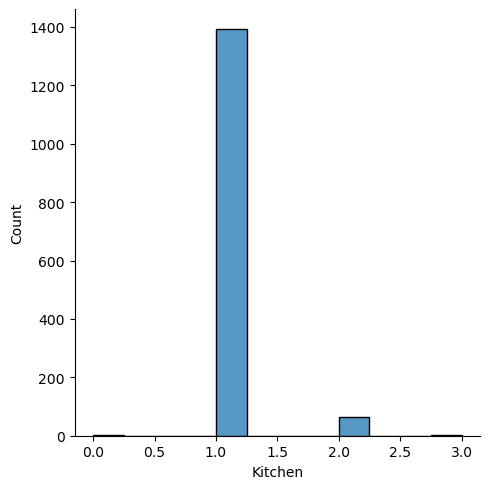

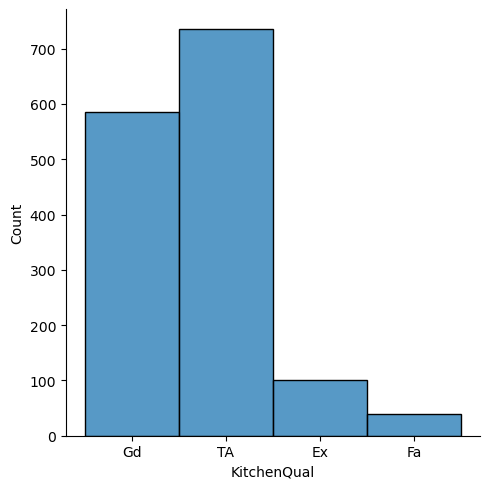

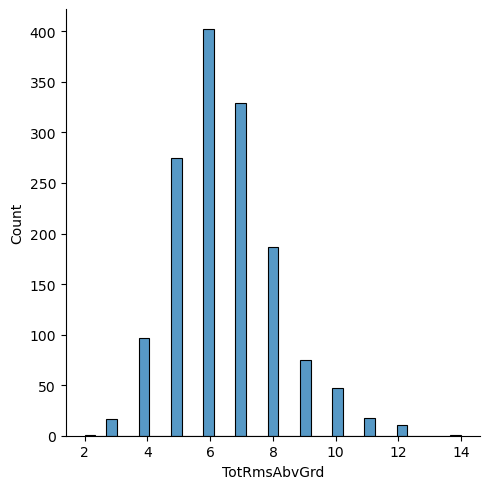

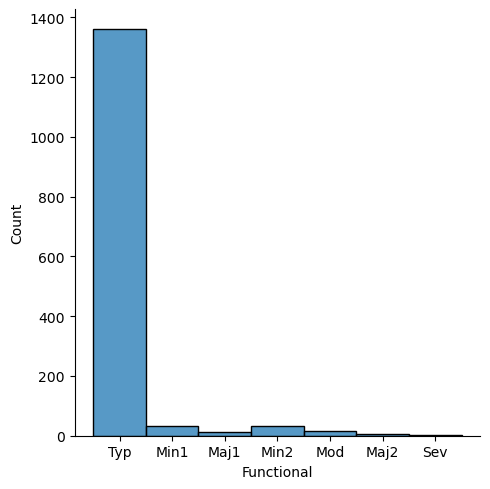

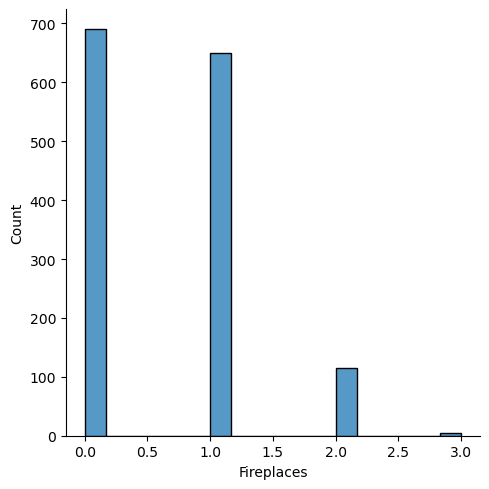

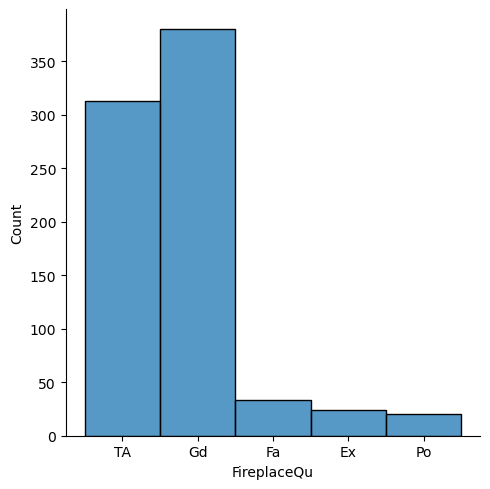

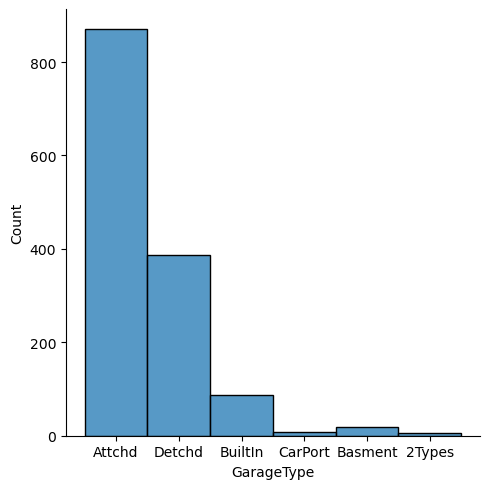

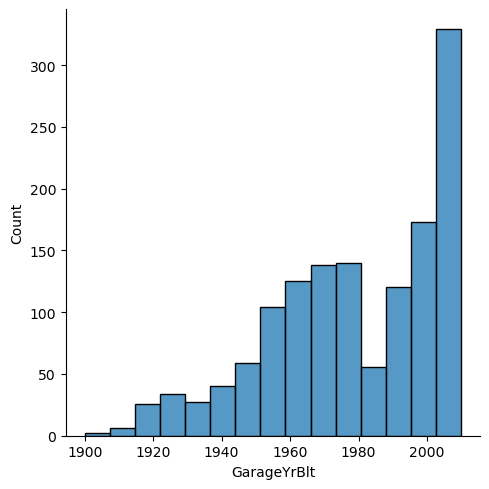

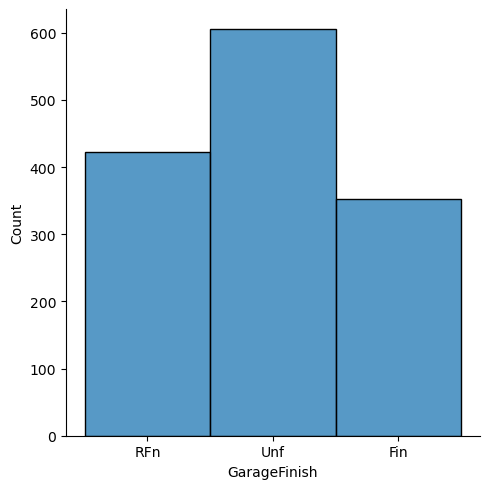

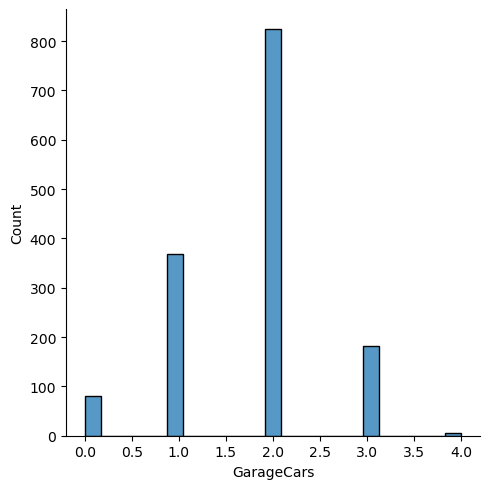

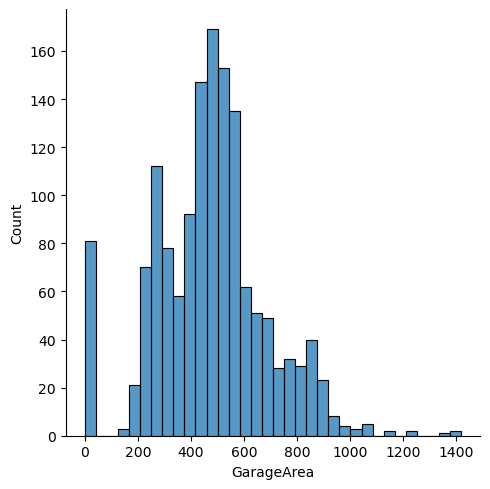

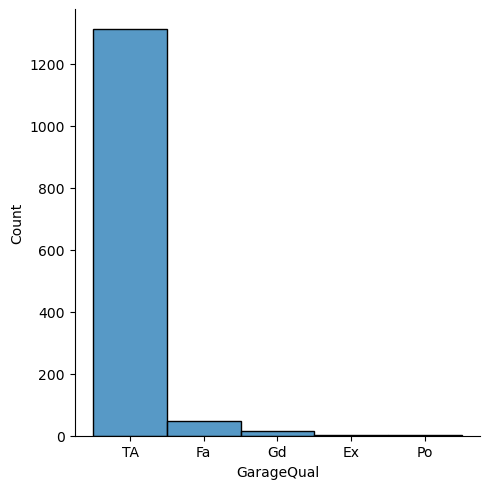

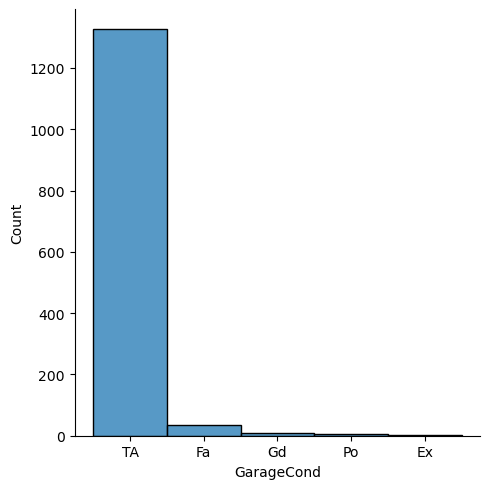

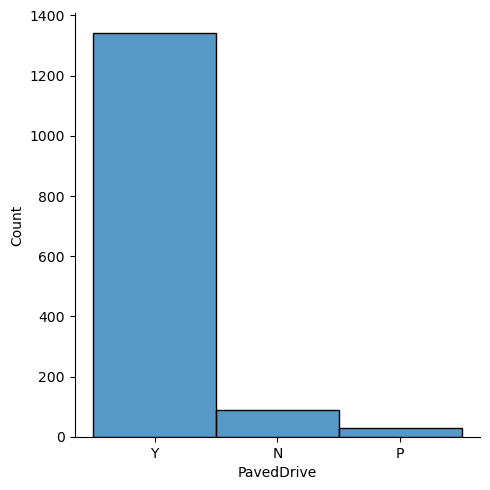

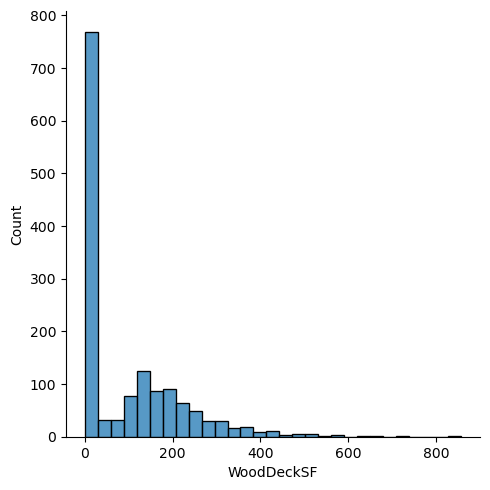

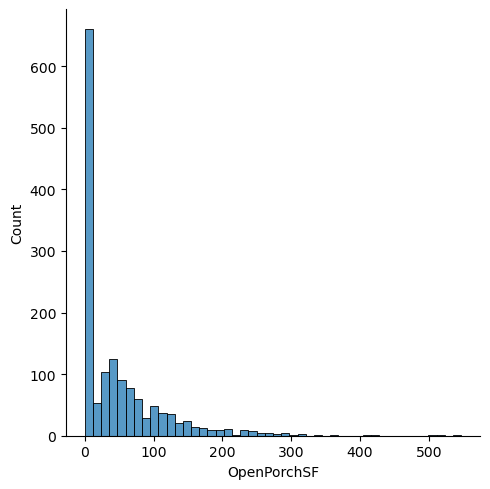

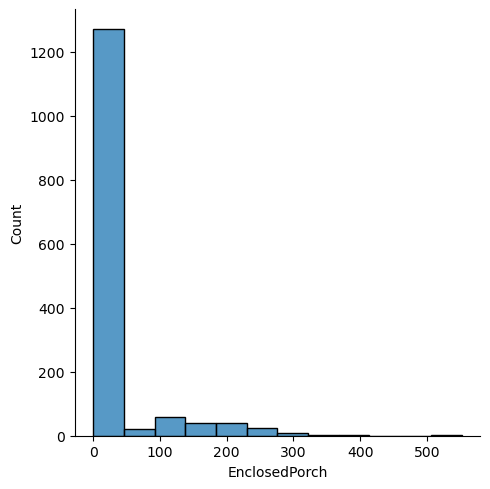

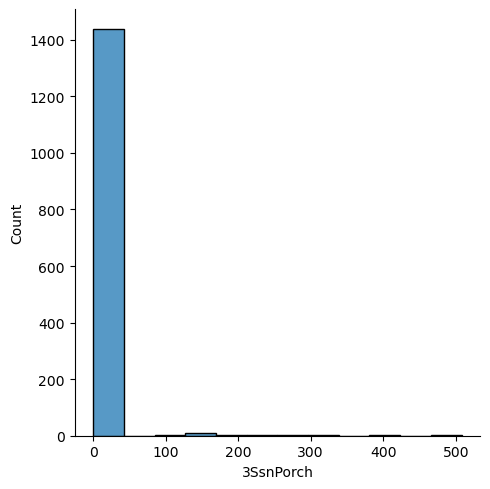

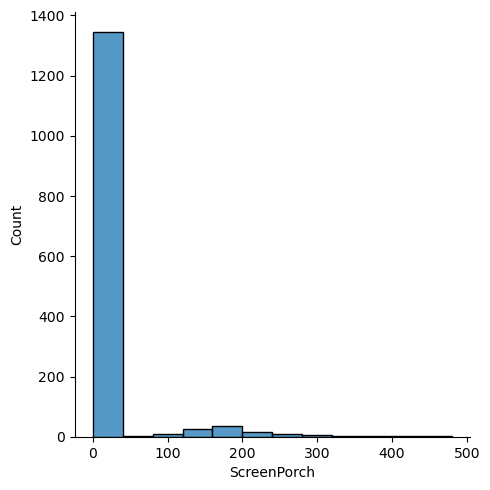

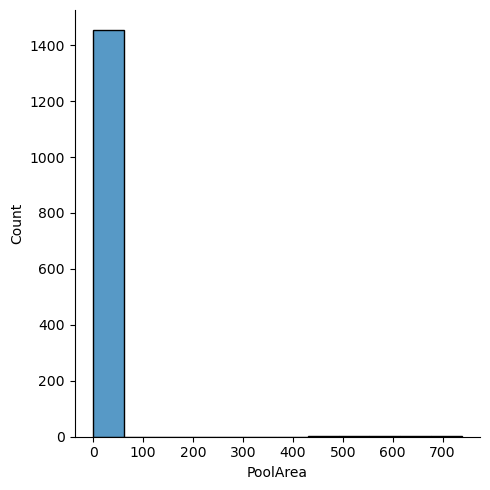

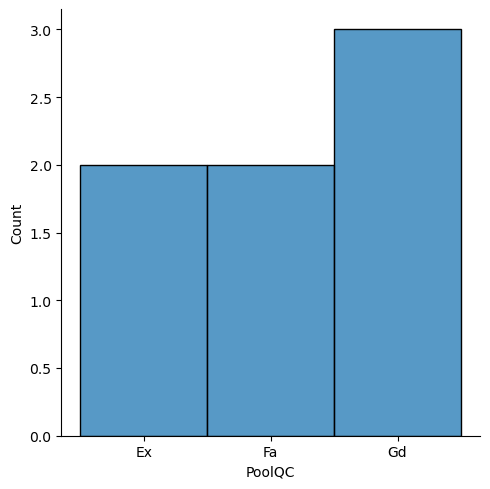

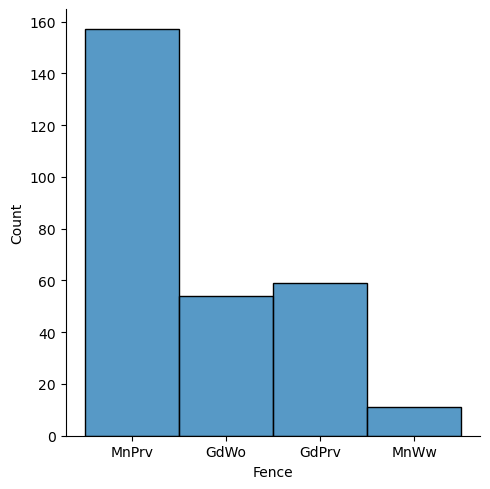

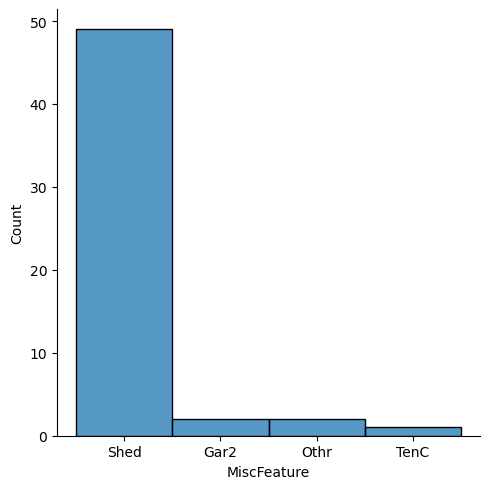

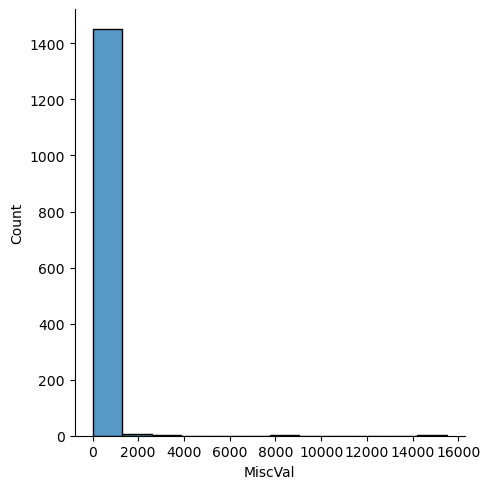

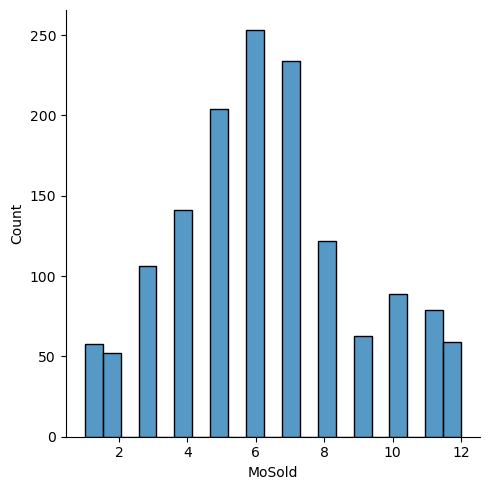

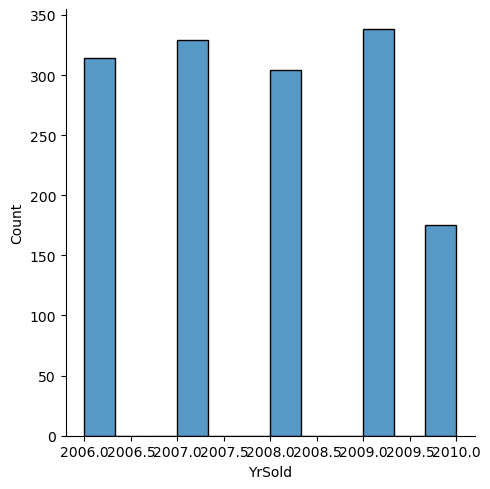

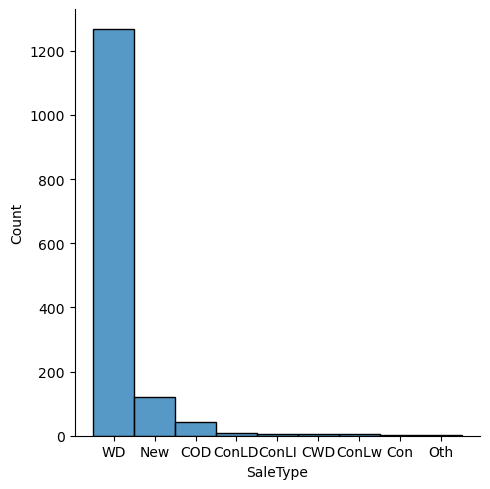

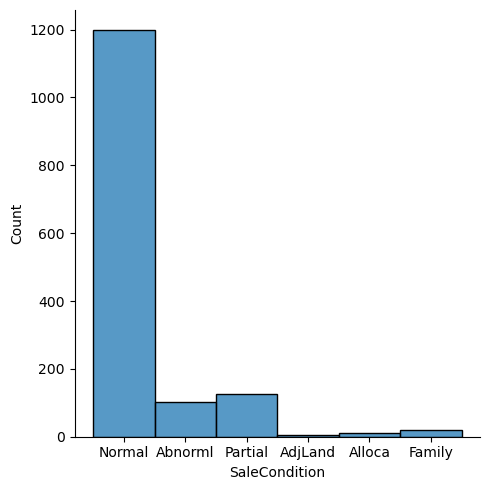

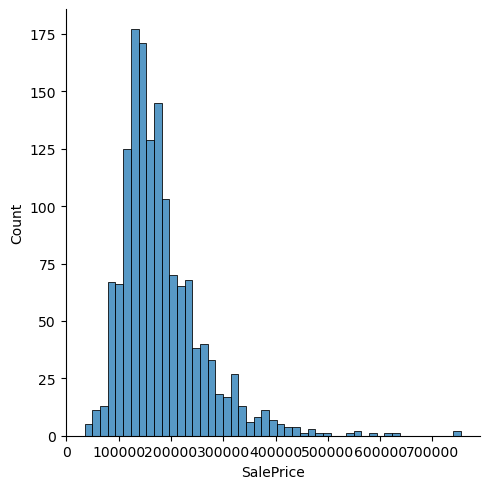

In [1123]:
for col in df.columns:
    sns.displot(df[col])
    plt.show()

### 3.b. Skewness for numerical Variable:

#### Skewness can be seen in the plots below.

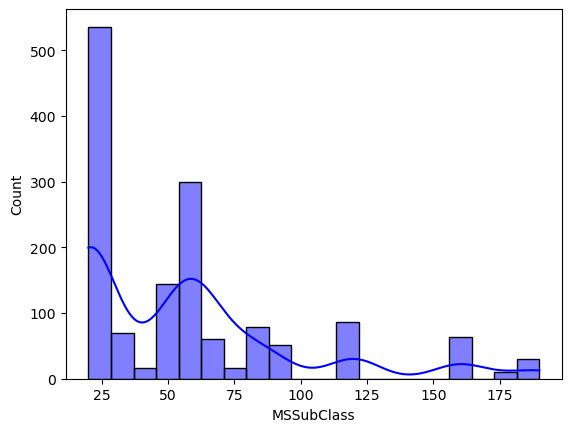

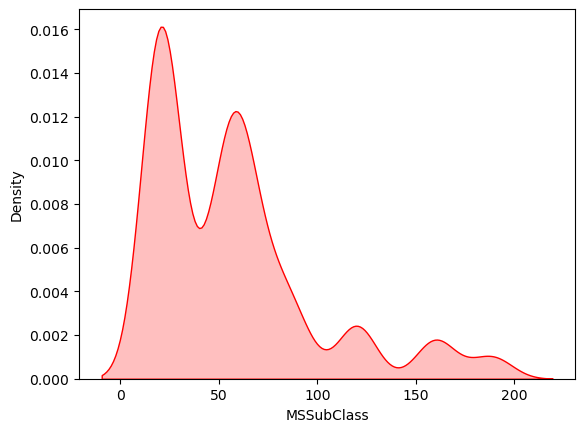

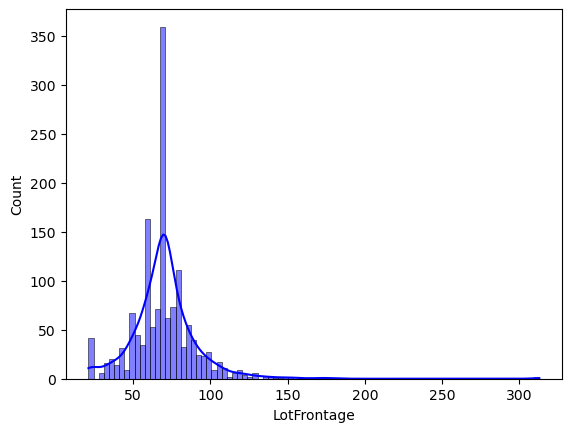

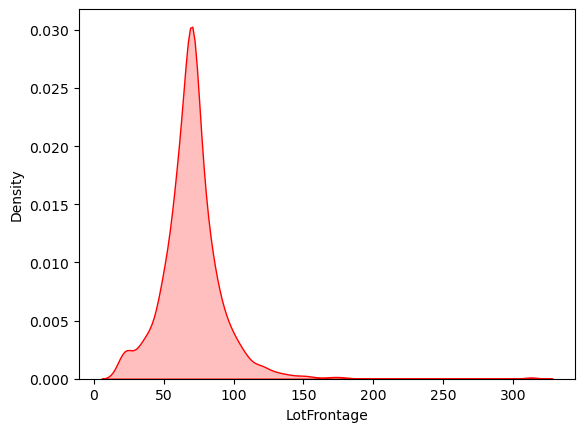

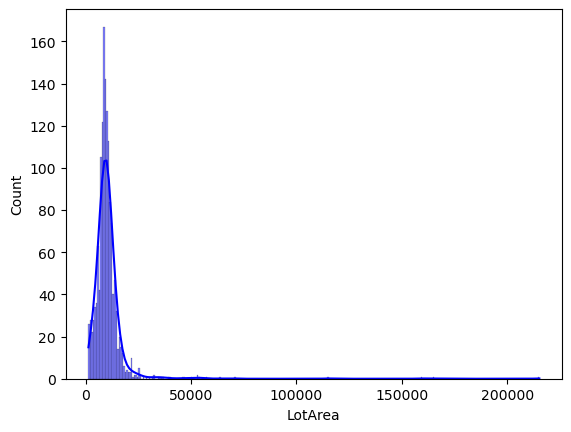

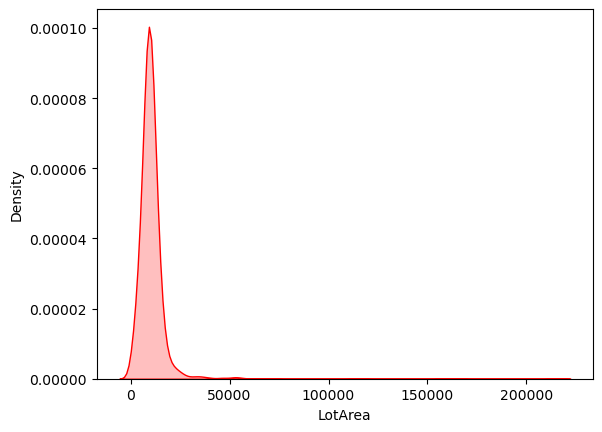

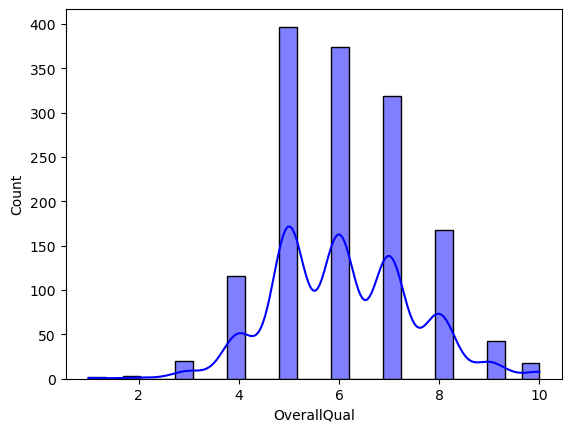

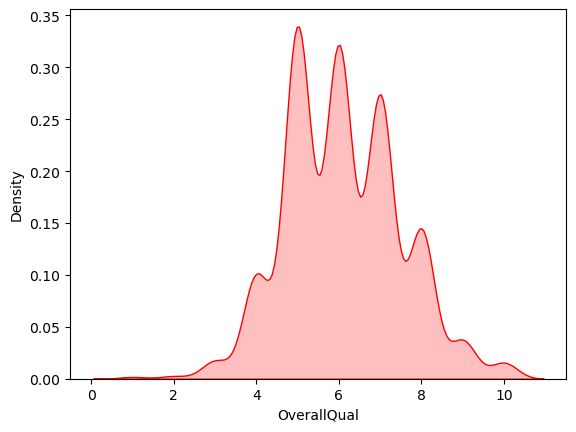

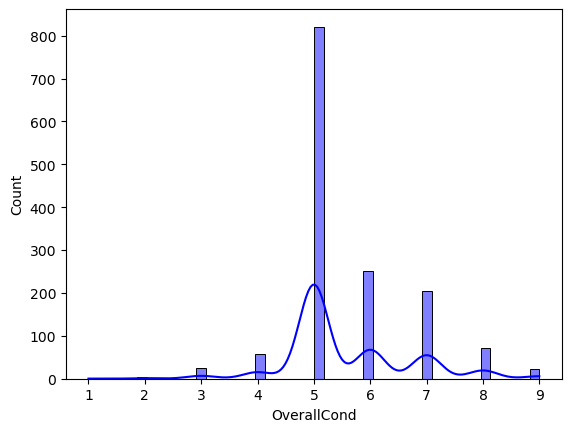

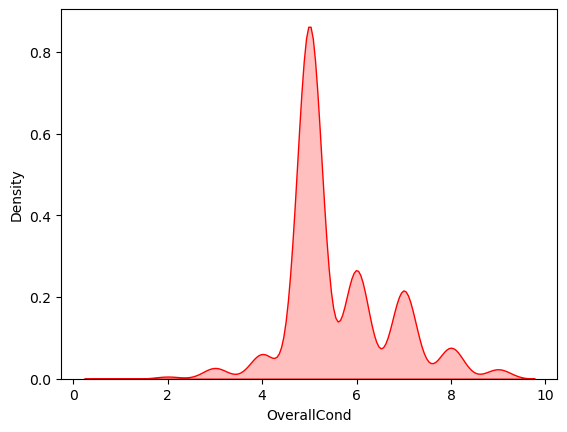

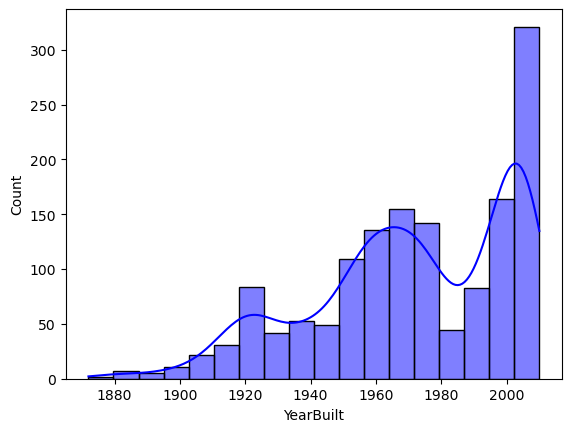

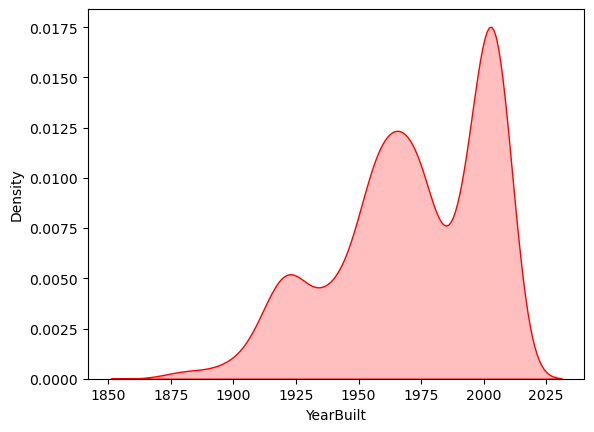

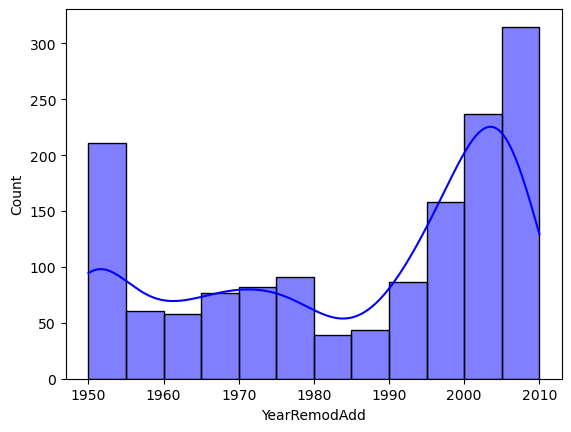

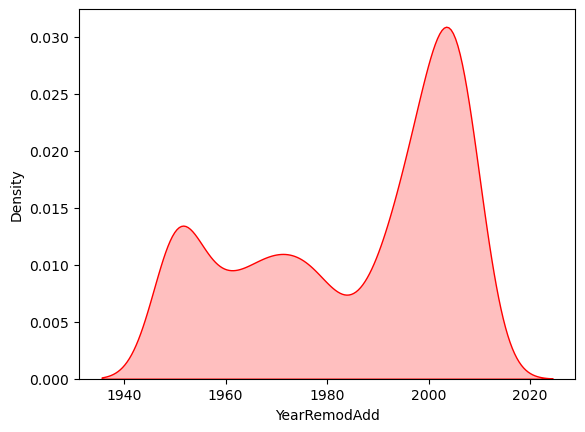

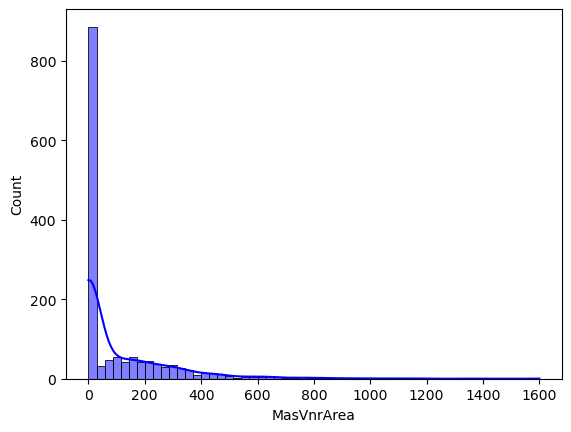

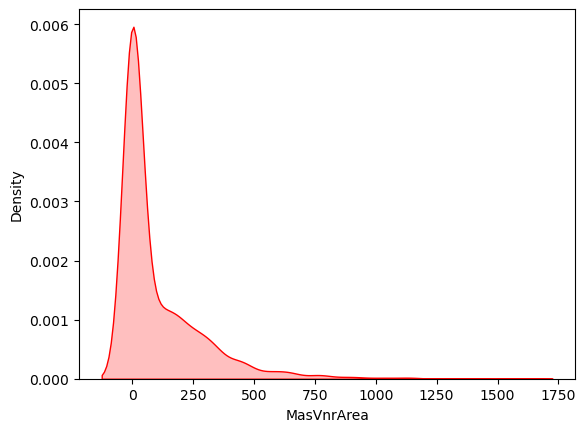

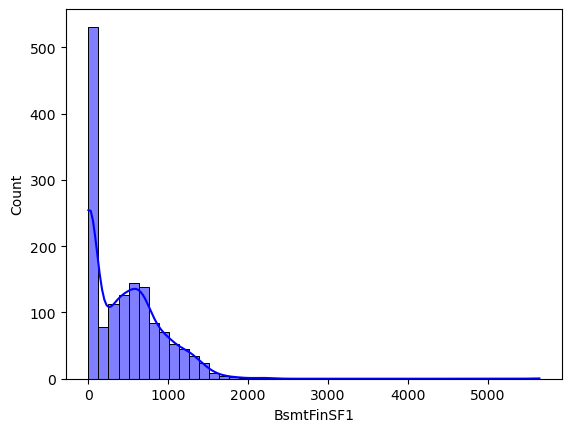

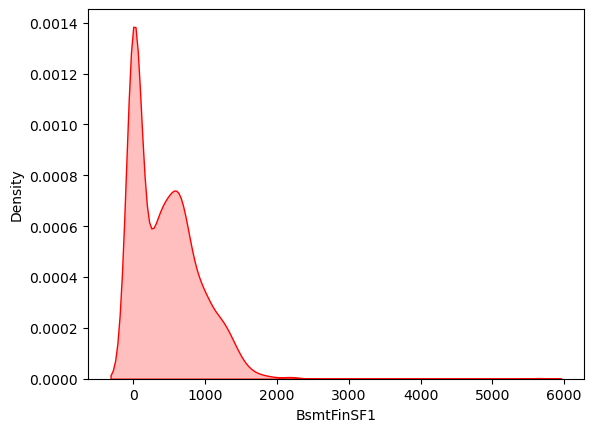

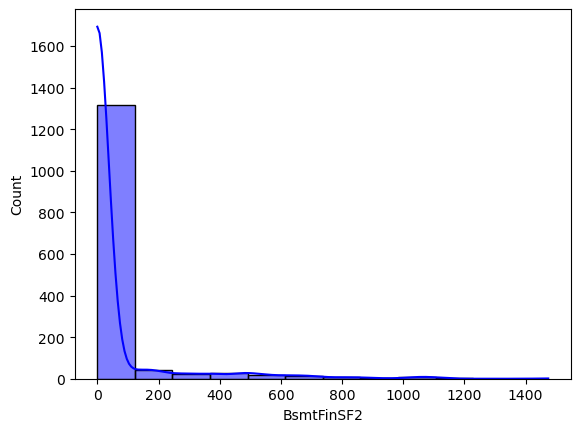

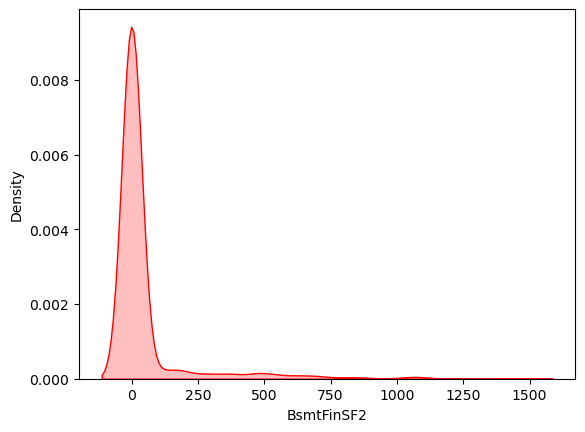

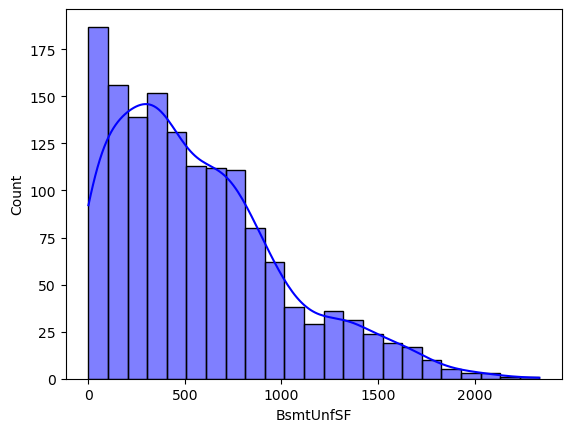

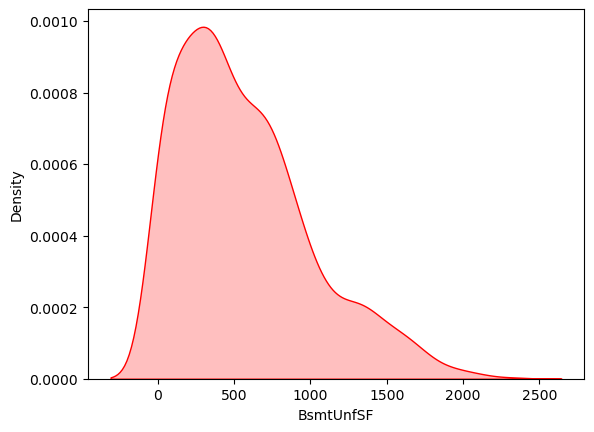

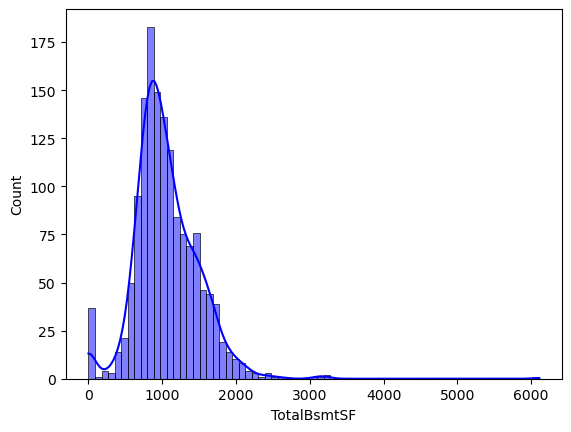

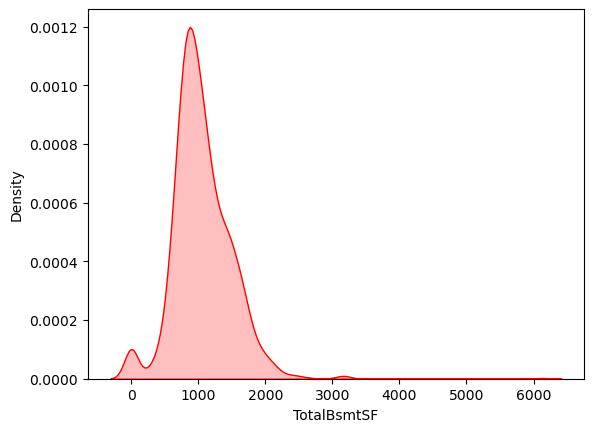

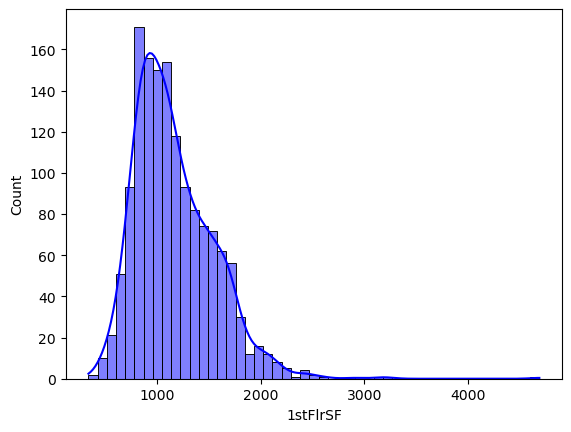

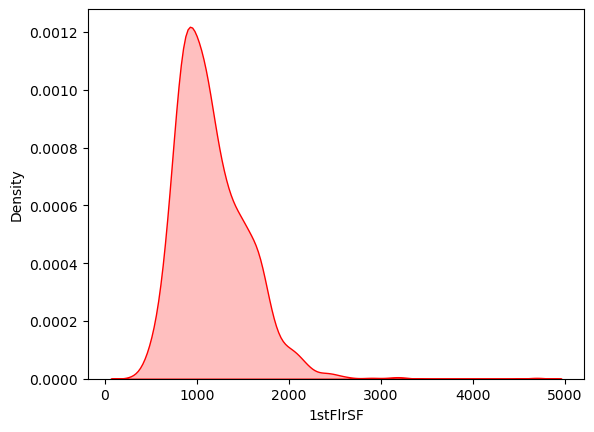

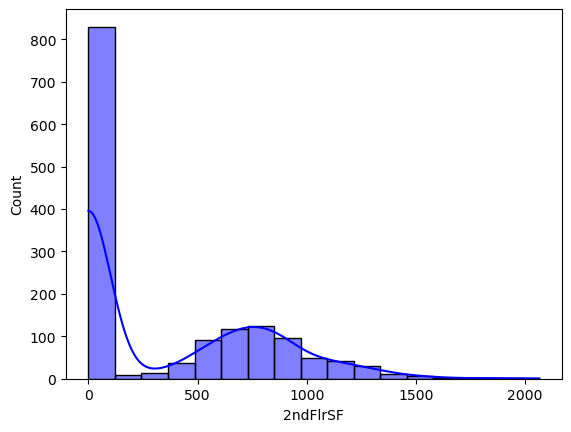

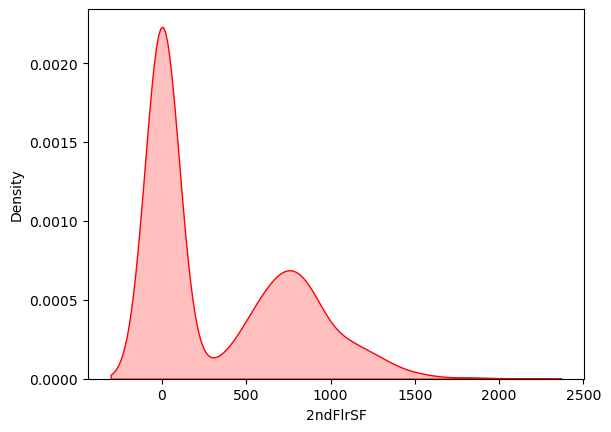

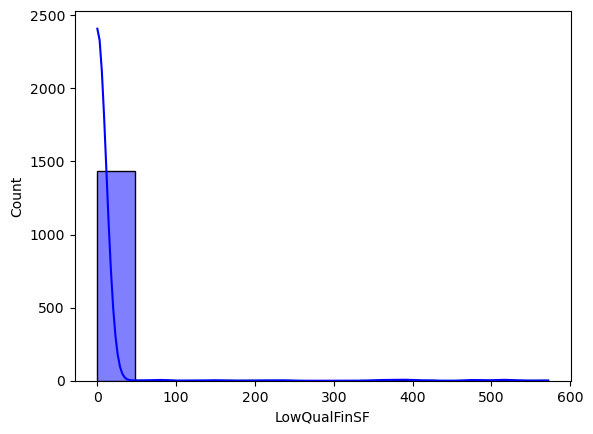

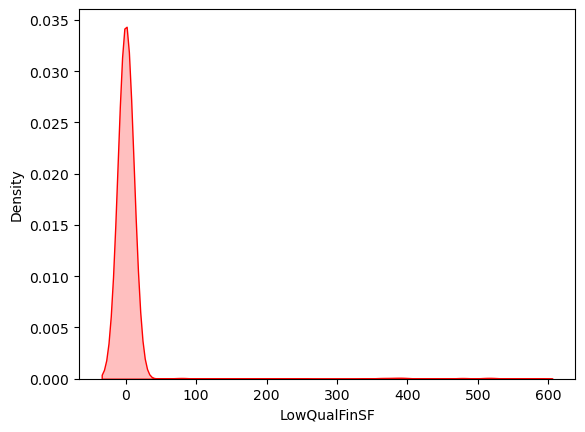

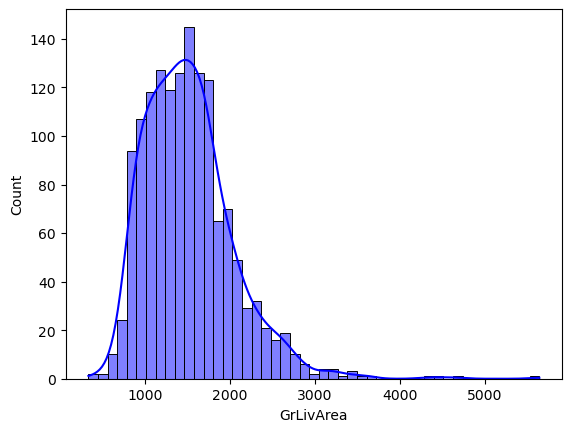

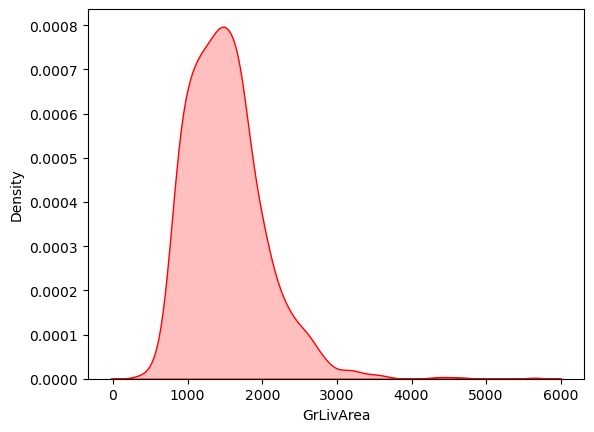

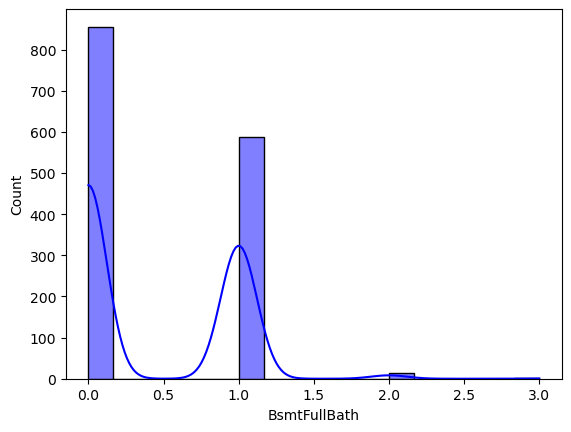

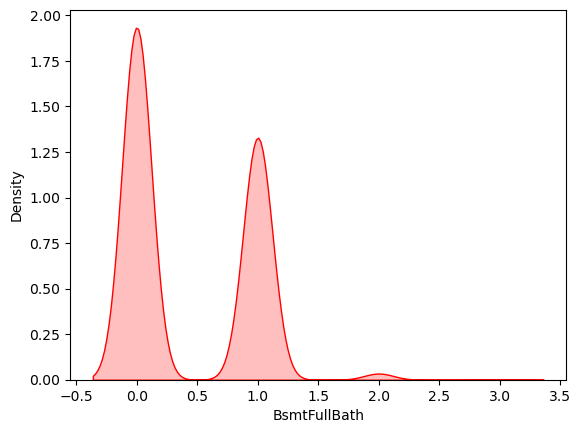

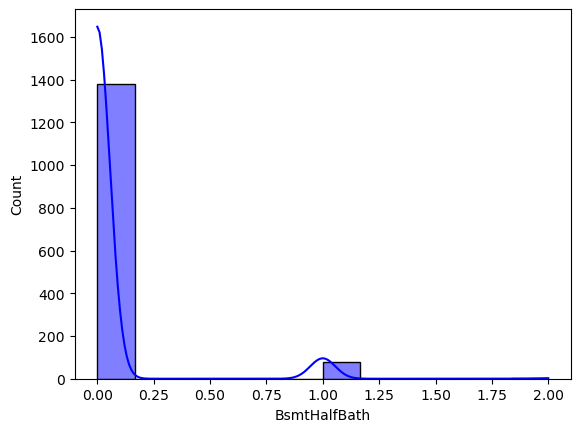

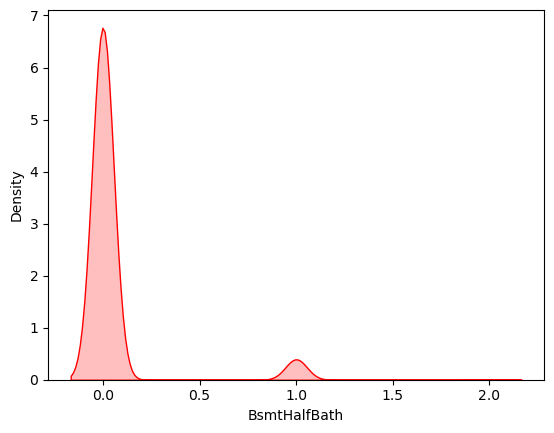

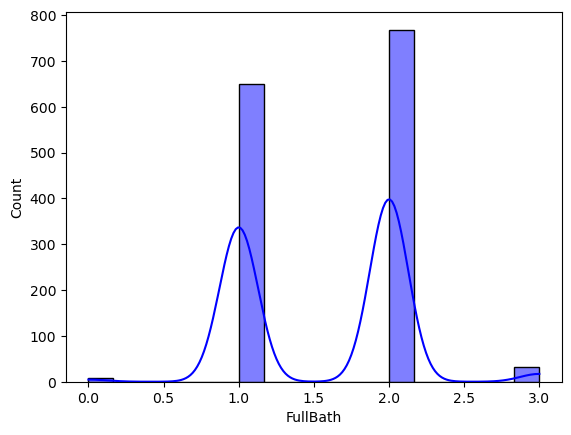

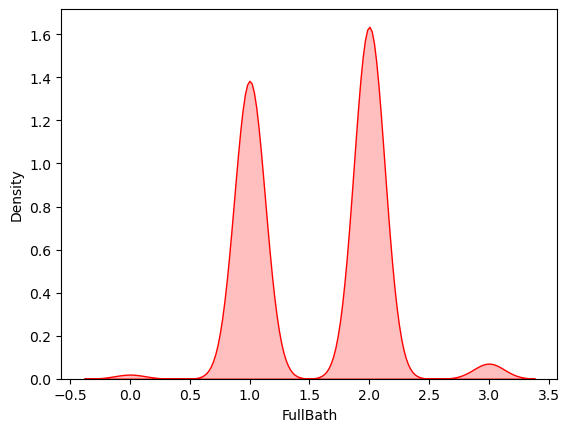

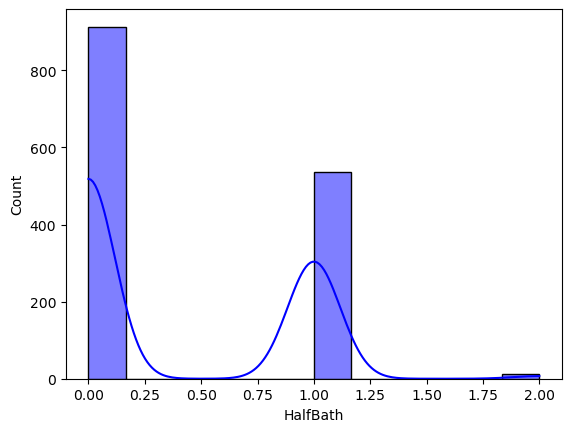

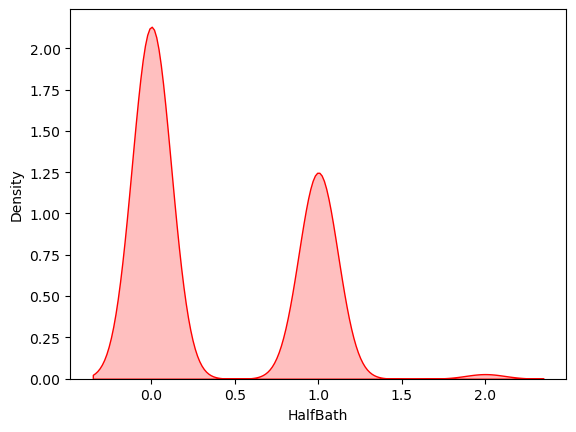

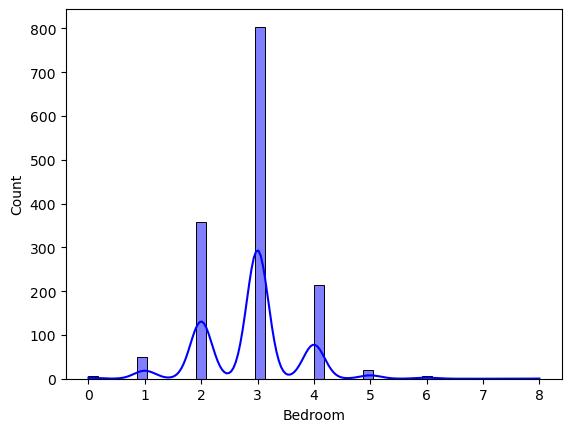

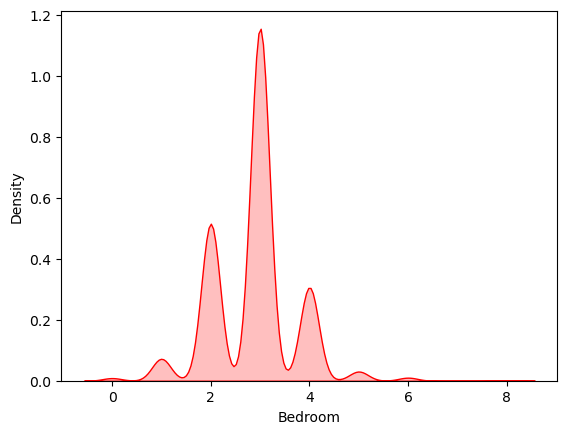

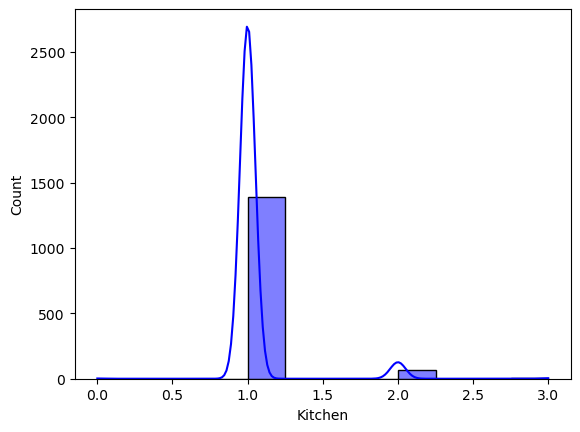

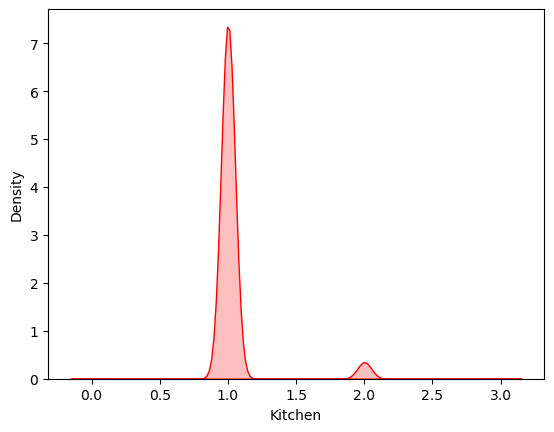

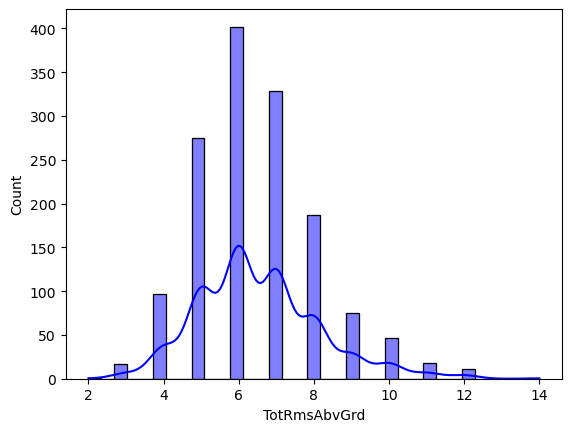

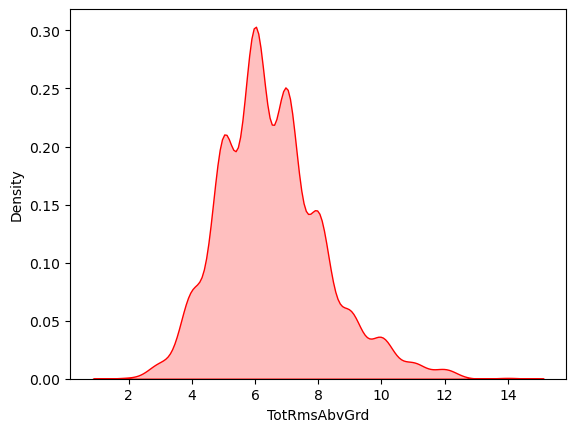

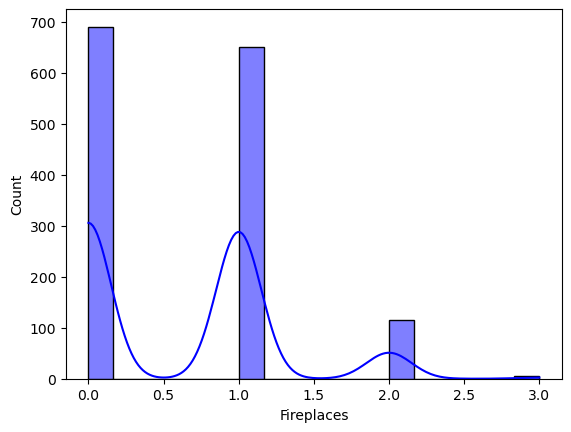

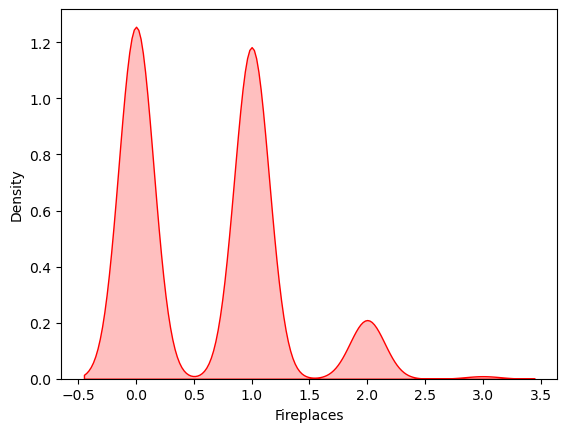

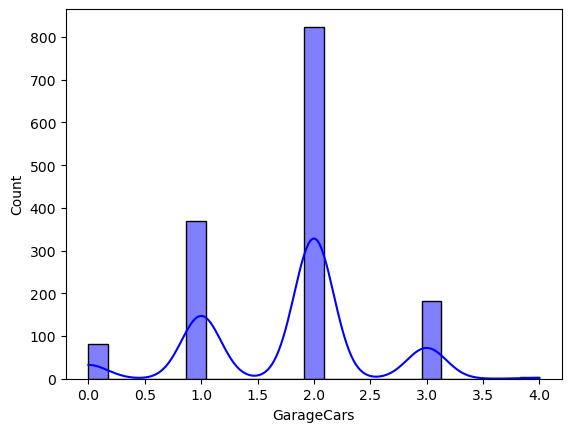

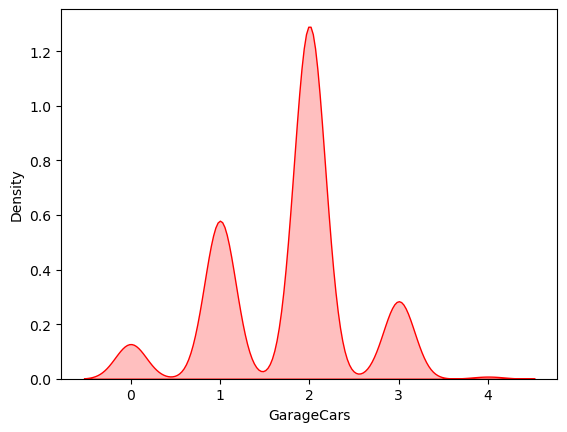

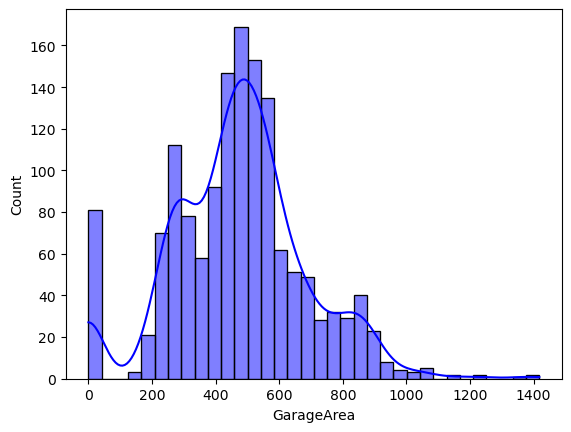

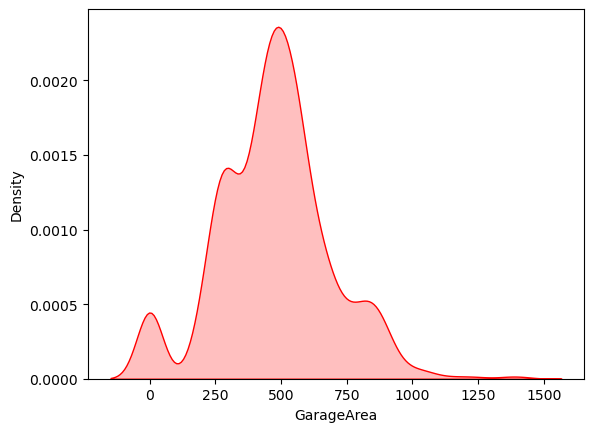

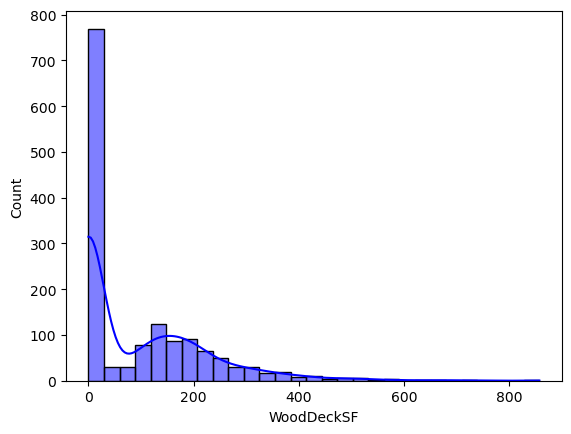

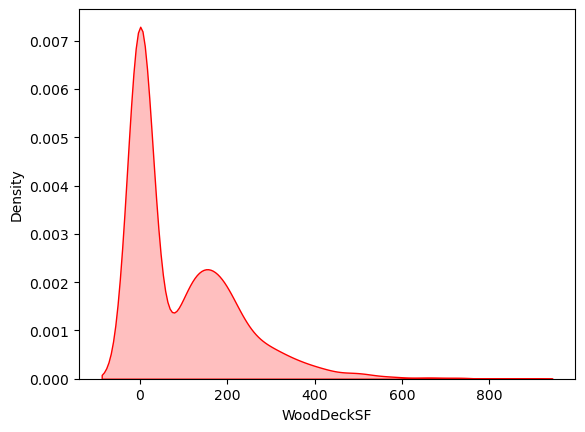

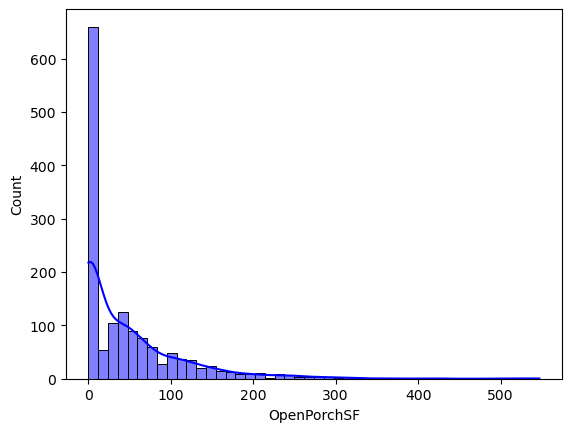

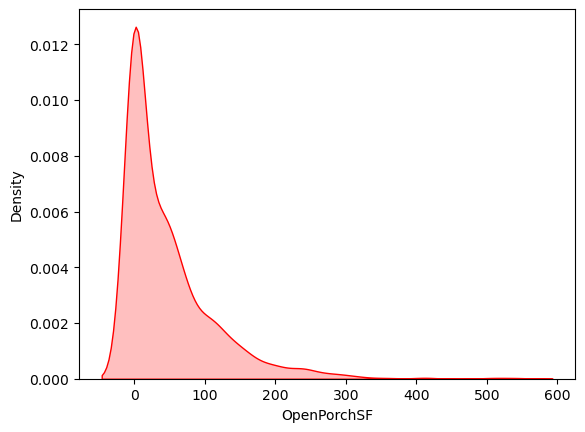

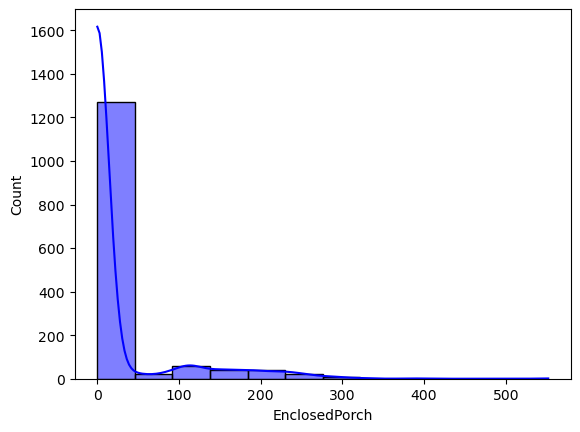

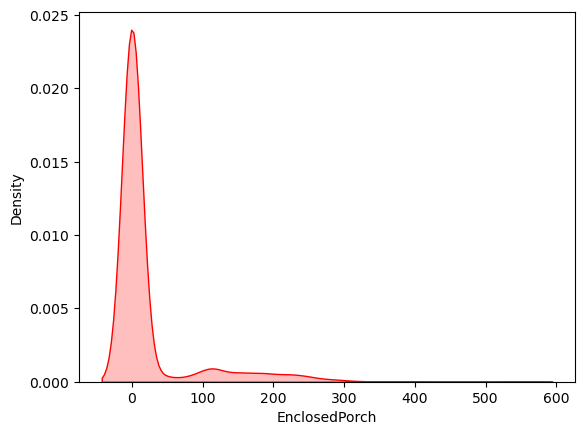

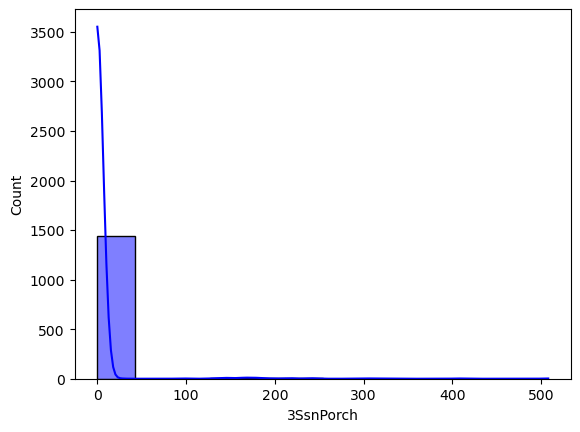

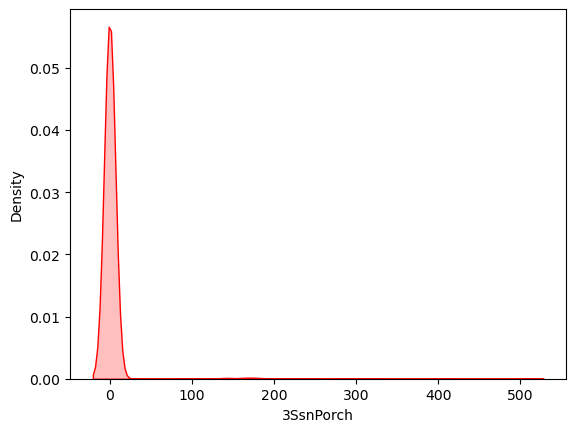

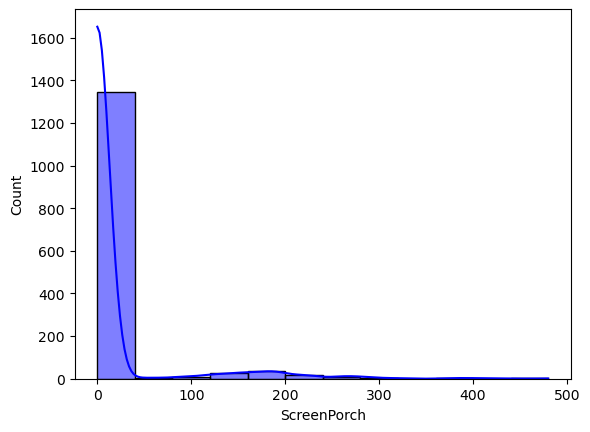

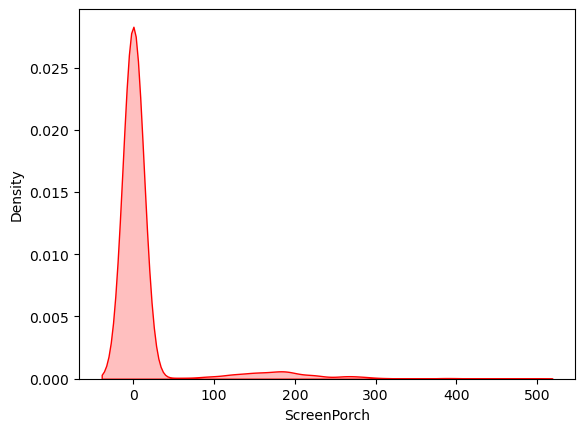

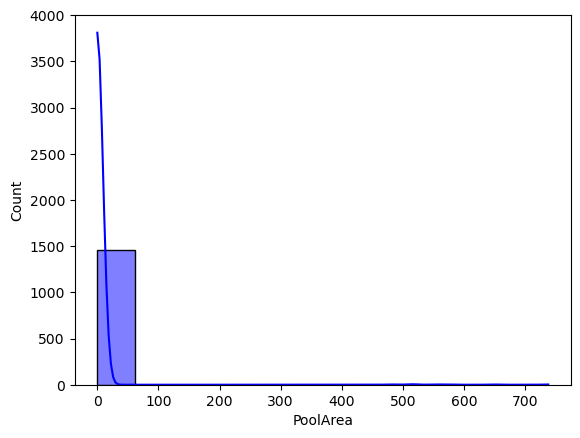

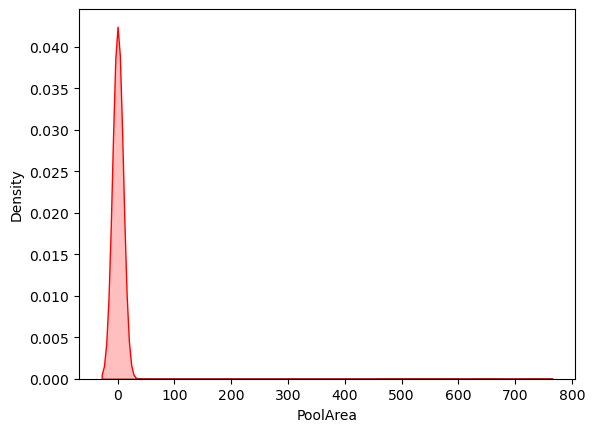

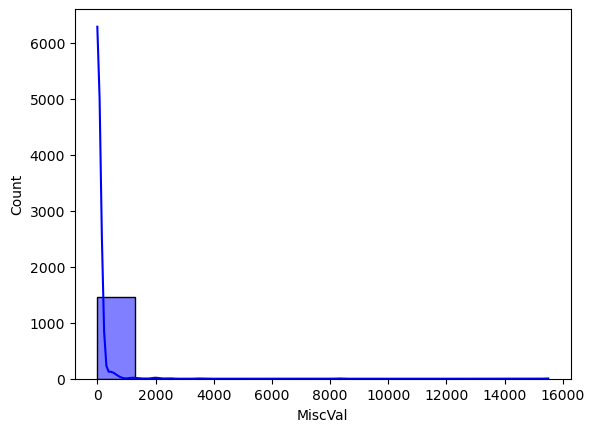

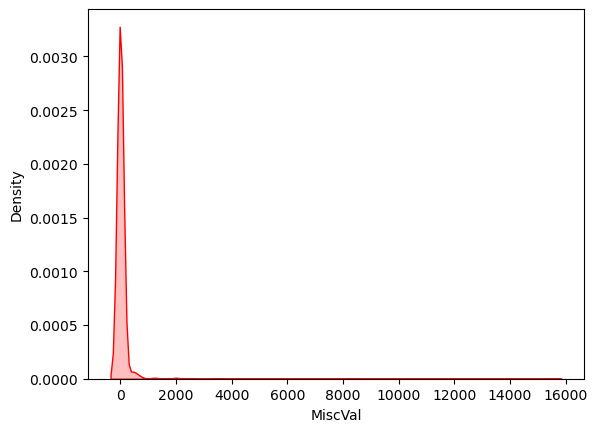

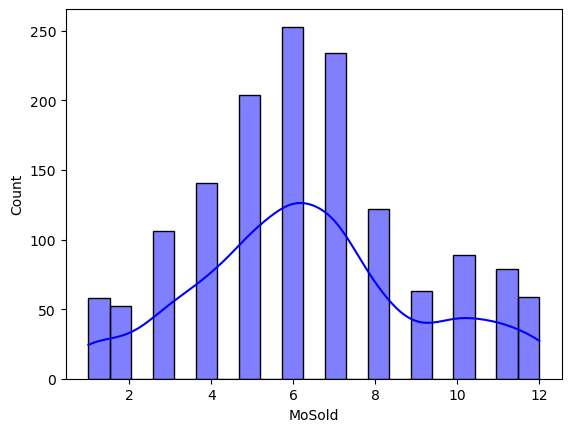

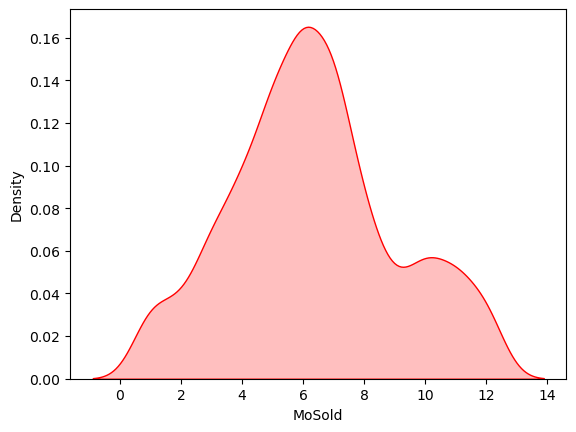

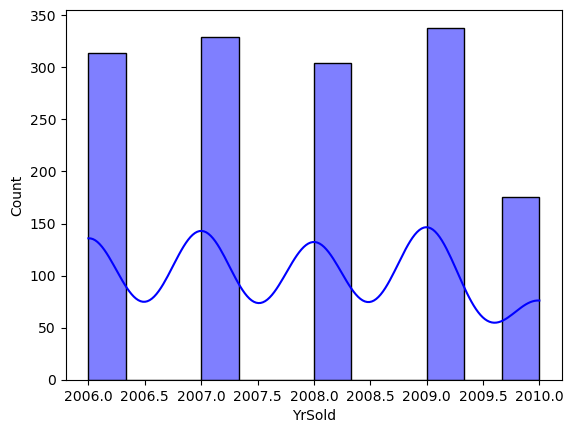

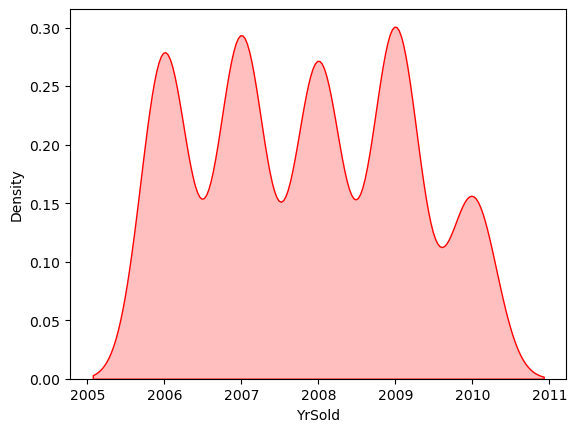

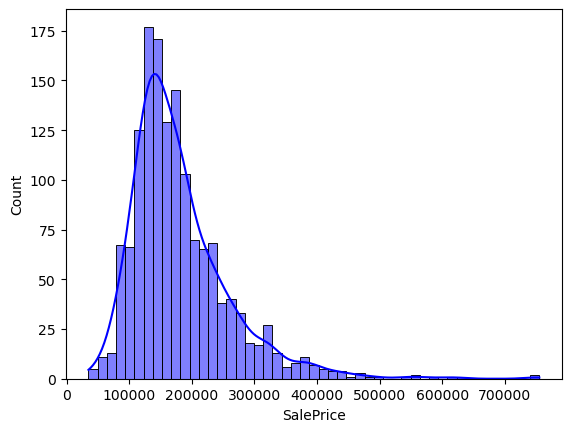

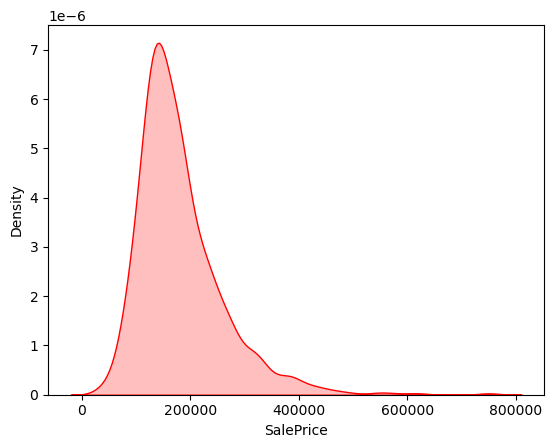

In [1124]:
for col in df_num.columns:
    #sns.displot(df[col],kde = True, color = 'b')
    #plt.show()
    #sns.kdeplot(df[col])
    #plt.show()
    sns.histplot(df_num[col], kde=True, color = "b")
    plt.show()
    sns.kdeplot(df_num[col], fill = True, color = "r")
    plt.show()

#### Skewness Value Calculation and Visualization:

In [1125]:
# Skewness of Numerical Data: 

Sknewness_Array = []
for col in df_num.select_dtypes(include=['int64', 'float64']).columns:
    print(f"Sknewness of feature {col} is: {df_num[col].skew()}")
    Sknewness_Array.append(df_num[col].skew())

Sknewness of feature MSSubClass is: 1.4076567471495591
Sknewness of feature LotFrontage is: 2.3849501679427925
Sknewness of feature LotArea is: 12.207687851233496
Sknewness of feature OverallQual is: 0.2169439277628693
Sknewness of feature OverallCond is: 0.6930674724842182
Sknewness of feature YearBuilt is: -0.613461172488183
Sknewness of feature YearRemodAdd is: -0.5035620027004709
Sknewness of feature MasVnrArea is: 2.6776164510820997
Sknewness of feature BsmtFinSF1 is: 1.685503071910789
Sknewness of feature BsmtFinSF2 is: 4.255261108933303
Sknewness of feature BsmtUnfSF is: 0.9202684528039037
Sknewness of feature TotalBsmtSF is: 1.5242545490627664
Sknewness of feature 1stFlrSF is: 1.3767566220336365
Sknewness of feature 2ndFlrSF is: 0.8130298163023265
Sknewness of feature LowQualFinSF is: 9.011341288465387
Sknewness of feature GrLivArea is: 1.3665603560164552
Sknewness of feature BsmtFullBath is: 0.596066609663168
Sknewness of feature BsmtHalfBath is: 4.103402697955168
Sknewness of

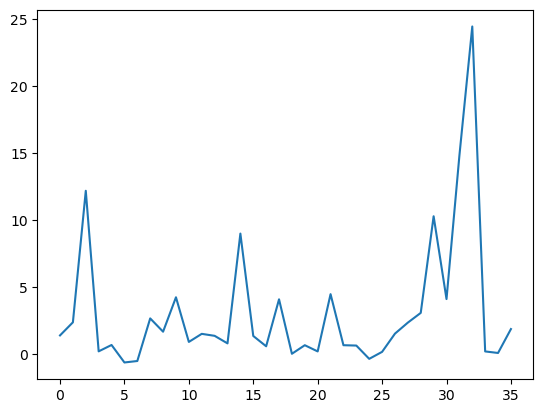

In [1126]:
plt.plot(Sknewness_Array)

In [1127]:
df_num.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    22.024023    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7553.500000     5.000000     5.000000   
50%      50.000000    70.049958    9478.500000     6.000000     5.000000   
75%      70.000000    79.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [1128]:
df_cat.describe()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1460       1460       1460  ...       1460        1460   
unique           25          9          8  ...          6           4   
top             mes       Norm       Norm  ...      SBrkr          TA   
freq            225       1260       1445  ...       1334         735   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1460       1460         1460       1460       1460       1460   
unique          7          7            4          6          6          3   
top           Typ     Attchd          Unf         TA         TA          Y   
freq         1360        870          605       1311       1326       1340   

       SaleType SaleCondition  
count      1460          1460  
unique        9             6  
top          WD        Normal  
freq       1267          1198  

[4 rows x 38 columns]

### 3.c. Calculate Correlation for Significant Numerical Variables:

In [1129]:
# Select only the numerical columns
# df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation between the numerical columns
corr = df_num.corr()

# Print the correlation matrix
print(corr)

               MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178699  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808   

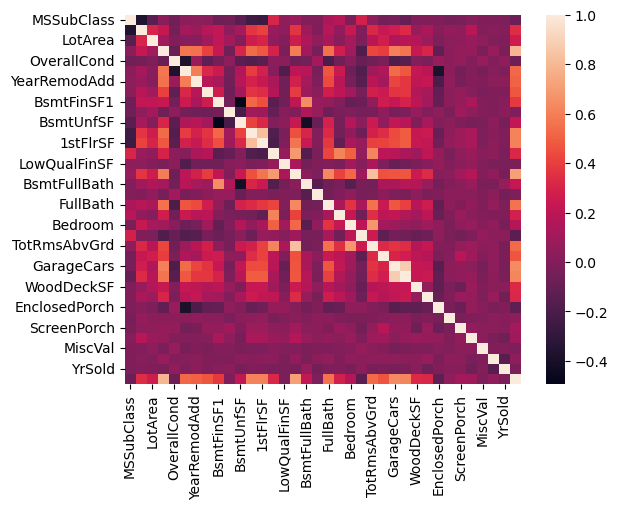

In [1032]:
# HeatMap : 
sns.heatmap(corr, annot=False)

# display the plot
plt.show()

<AxesSubplot:>

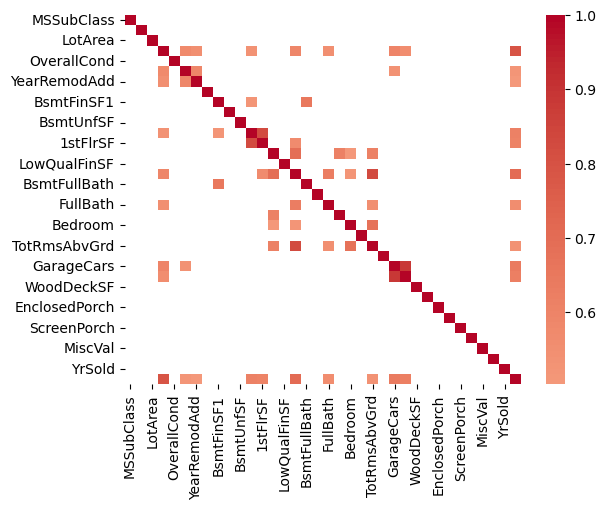

In [1130]:
corr_filtered = corr.where(abs(corr) > 0.5)
sns.heatmap(corr_filtered, cmap='coolwarm', center=0)


In [1131]:
filtered_vars = corr.columns[((corr > 0.6) & (corr < 1)).any()]
filtered_vars

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Bedroom',
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

### Correlation of other variable with Sales Price :Which parameter influences Sale prices significantly

MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
Bedroom          0.168213
Kitchen         -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float64


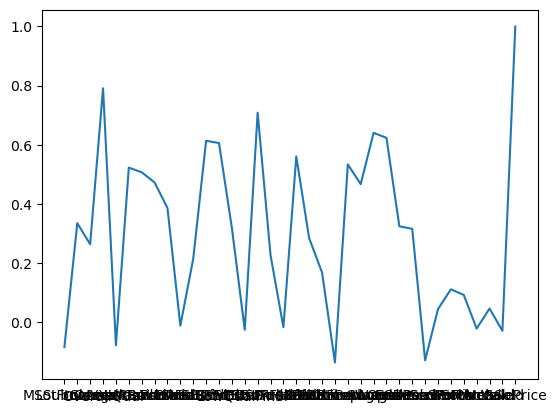

In [1132]:
col_SalePrice = df_num['SalePrice']
corr_with_Sales_Price = df_num.corrwith(col_SalePrice)
print(corr_with_Sales_Price)
x_range = range(len(corr_with_Sales_Price))
plt.plot(corr_with_Sales_Price.index, corr_with_Sales_Price)
plt.show()

#### Use Threshold to determine most significant features with respect to Sales Price:

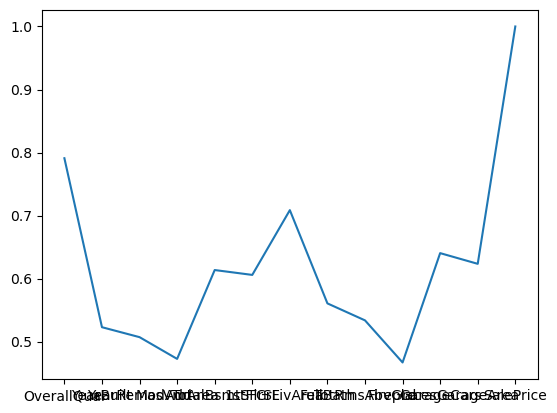

In [1135]:
threshold = 0.45

# calculate the pairwise correlation
corr_with_Sales_Price = df_num.corrwith(col_SalePrice)

# filter the correlation values based on the threshold
corr_with_Sales_Price = corr_with_Sales_Price[corr_with_Sales_Price >= threshold]

# plot the filtered correlation values
x_range = range(len(corr_with_Sales_Price))
plt.plot(corr_with_Sales_Price.index, corr_with_Sales_Price)
plt.show()


#### Most Significant Variables that influence the Sales Price :


In [1136]:
print(corr_with_Sales_Price.index)
len(corr_with_Sales_Price.index)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')


13

### Total number of significantnumerical variables = significant variable with respect to sales price + Overall significant variable 

In [1137]:
df_num_significant = df_num[(corr_with_Sales_Price.index).union(filtered_vars)]
df_num_significant

1stFlrSF  2ndFlrSF  Bedroom  BsmtFinSF1  BsmtFullBath  Fireplaces  \
Id                                                                        
1          856       854        3         706             1           0   
2         1262         0        3         978             0           1   
3          920       866        3         486             1           1   
4          961       756        3         216             1           1   
5         1145      1053        4         655             1           1   
...        ...       ...      ...         ...           ...         ...   
1456       953       694        3           0             0           1   
1457      2073         0        3         790             1           2   
1458      1188      1152        4         275             0           2   
1459      1078         0        2          49             1           0   
1460      1256         0        3         830             1           0   

      FullBath  GarageArea  GarageCars  GrLivArea  HalfBath  MasVnrArea  \
Id                                                                        
1            2         548           2       1710         1       196.0   
2            2         460           2       1262         0         0.0   
3            2         608           2       1786         1       162.0   
4            1         642           3       1717         0         0.0   
5            2         836           3       2198         1       350.0   
...        ...         ...         ...        ...       ...         ...   
1456         2         460           2       1647         1         0.0   
1457         2         500           2       2073         0       119.0   
1458         2         252           1       2340         0         0.0   
1459         1         240           1       1078         0         0.0   
1460         1         276           1       1256         1         0.0   

      OverallQual  SalePrice  TotRmsAbvGrd  TotalBsmtSF  YearBuilt  \
Id                                                                   
1               7     208500             8          856       2003   
2               6     181500             6         1262       1976   
3               7     223500             6          920       2001   
4               7     140000             7          756       1915   
5               8     250000             9         1145       2000   
...           ...        ...           ...          ...        ...   
1456            6     175000             7          953       1999   
1457            6     210000             7         1542       1978   
1458            7     266500             9         1152       1941   
1459            5     142125             5         1078       1950   
1460            5     147500             6         1256       1965   

      YearRemodAdd  
Id                  
1             2003  
2             1976  
3             2002  
4             1970  
5             2000  
...            ...  
1456          2000  
1457          1988  
1458          2006  
1459          1996  
1460          1965  

[1460 rows x 18 columns]

### 3.d. Pair Plot of Numerical Variables: 

In [927]:
sns.pairplot(corr)
plt.show()

### 4.b. Count plot for bivariate analysis of Categorical Variables

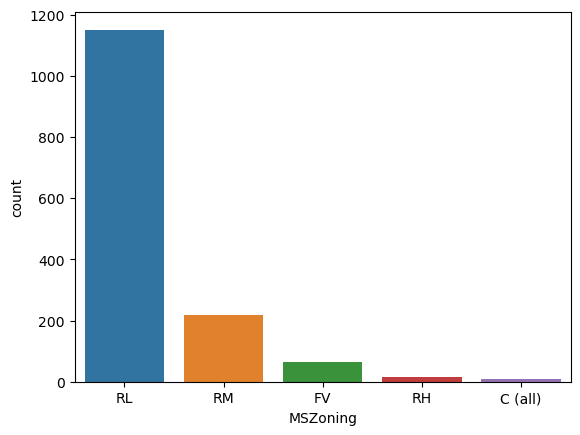

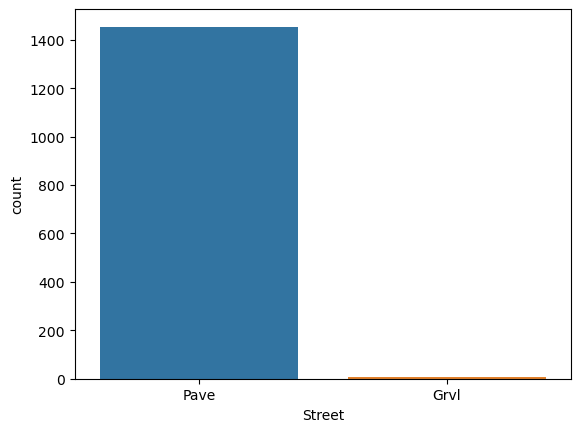

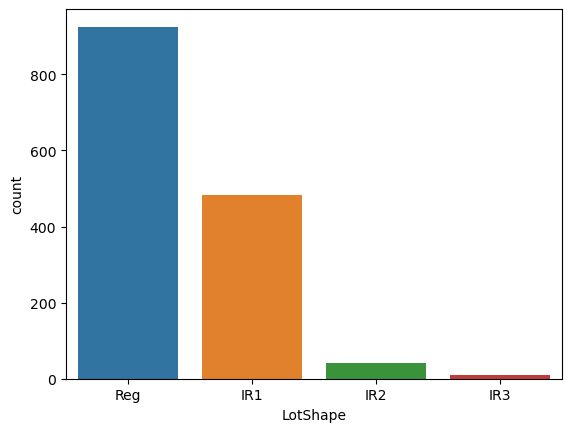

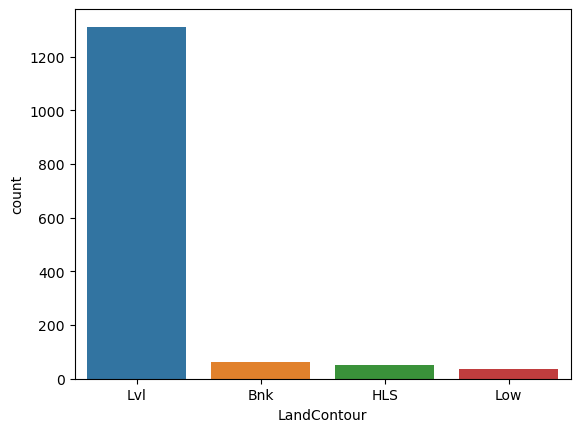

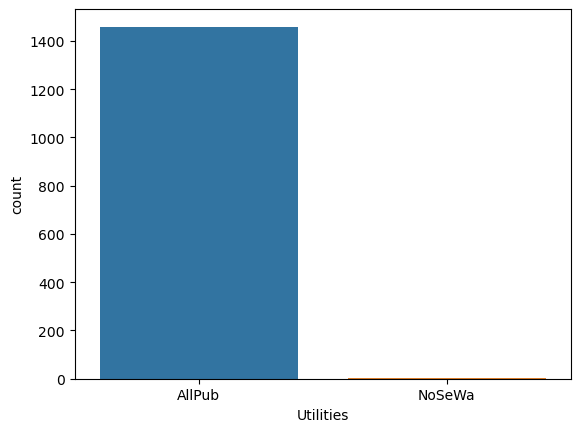

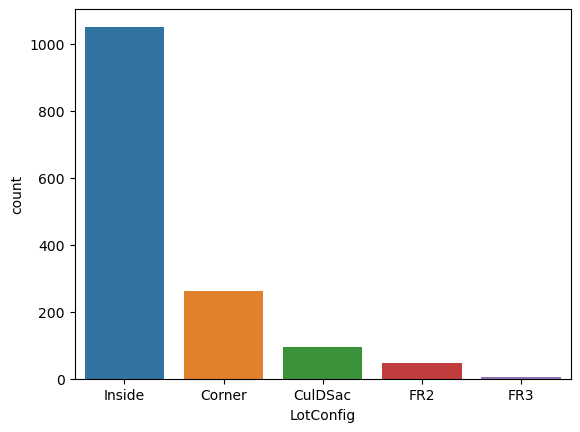

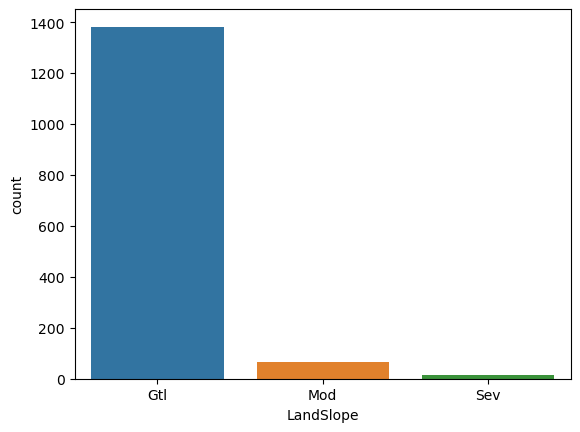

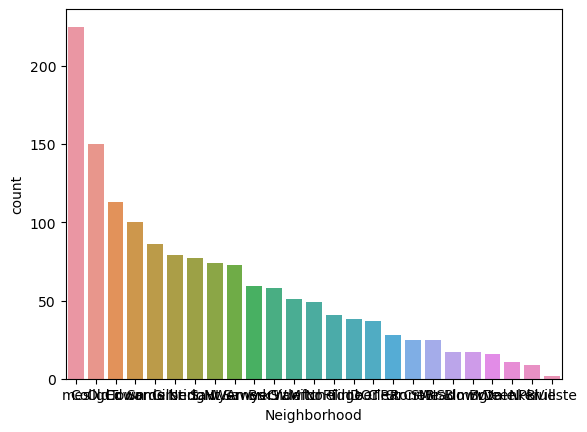

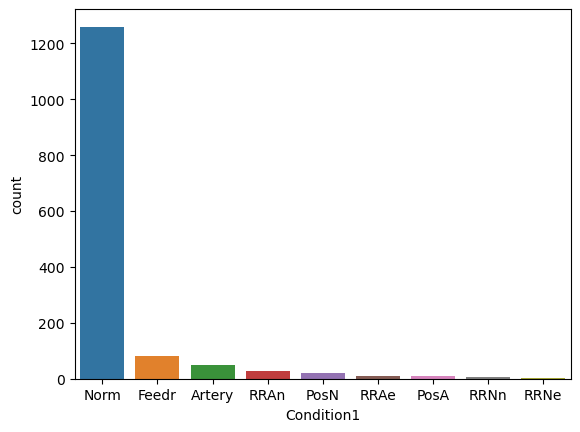

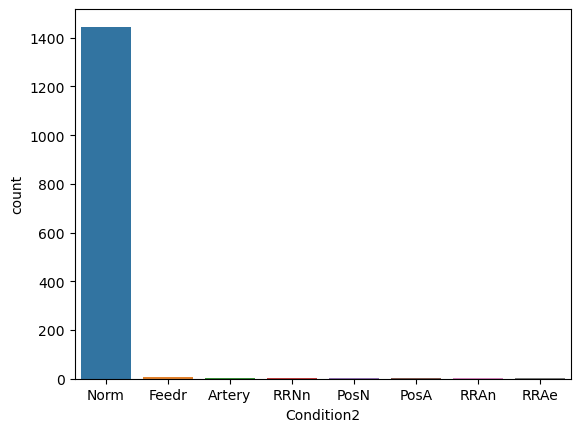

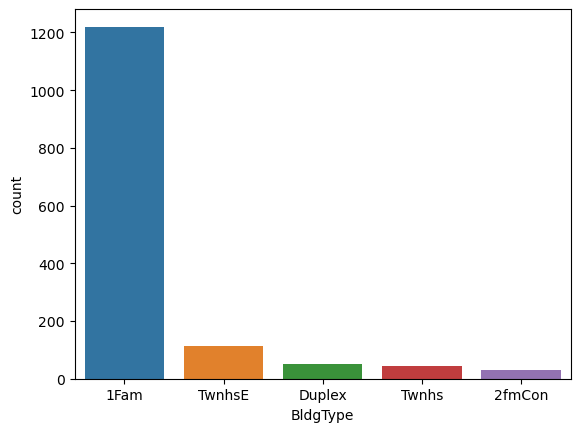

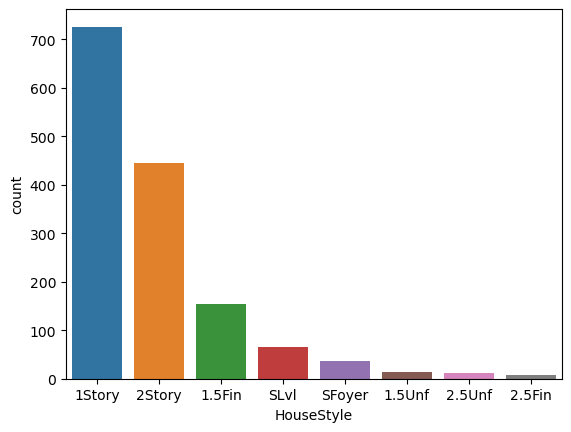

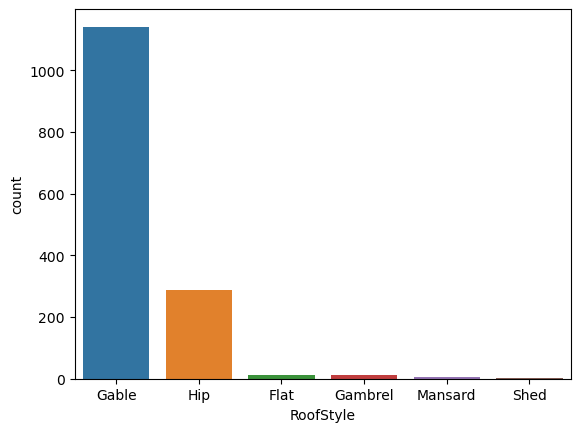

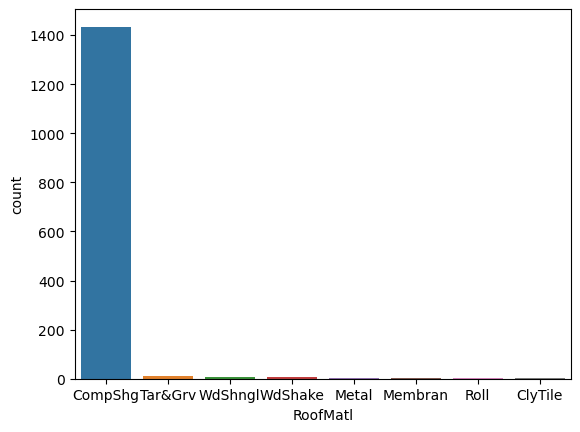

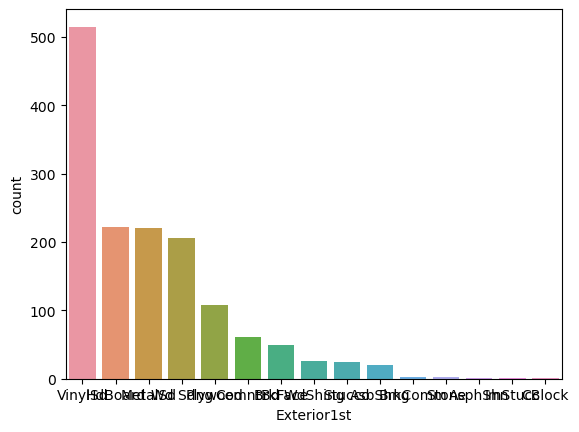

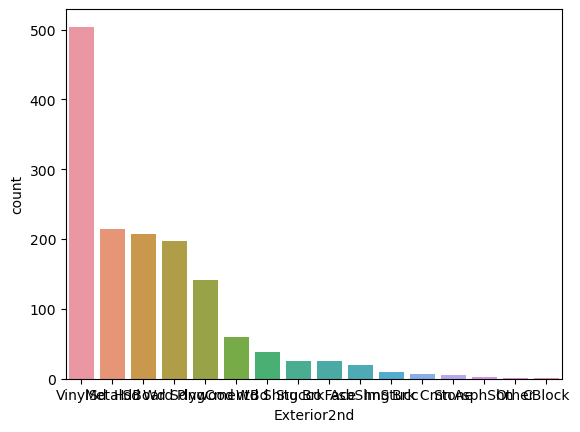

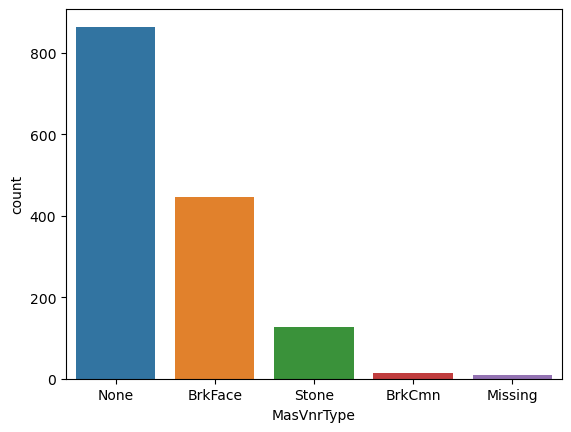

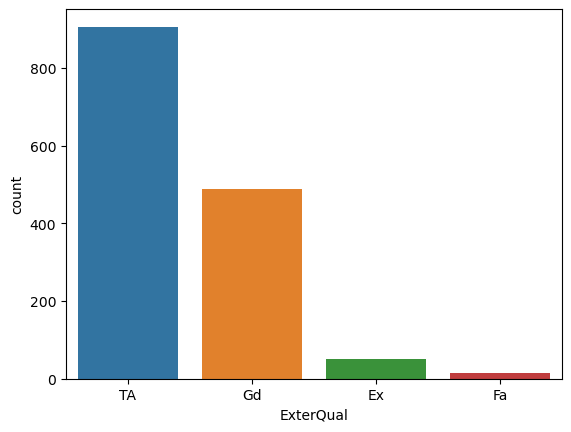

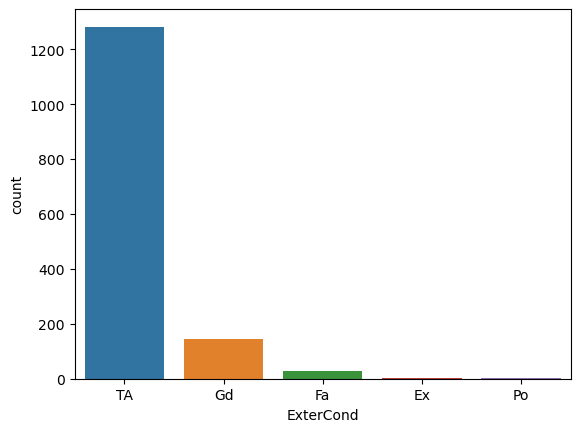

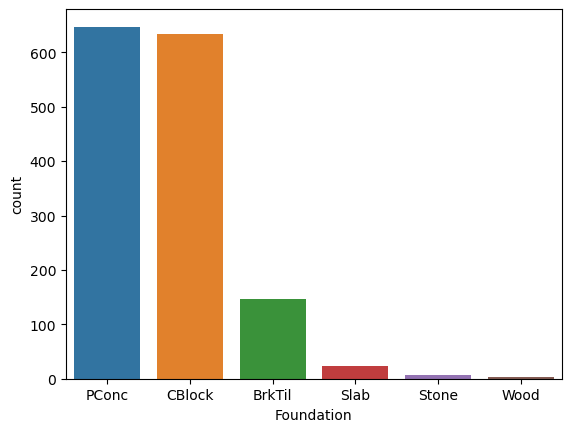

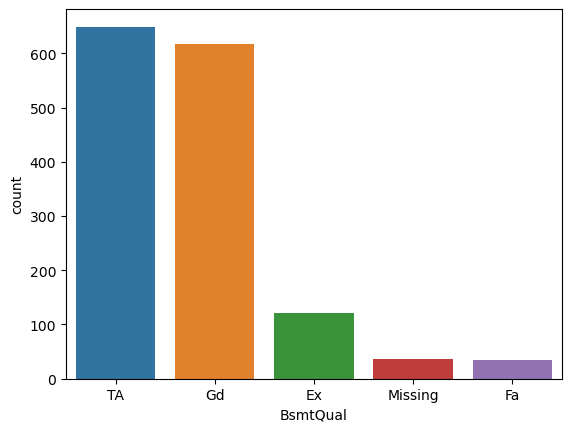

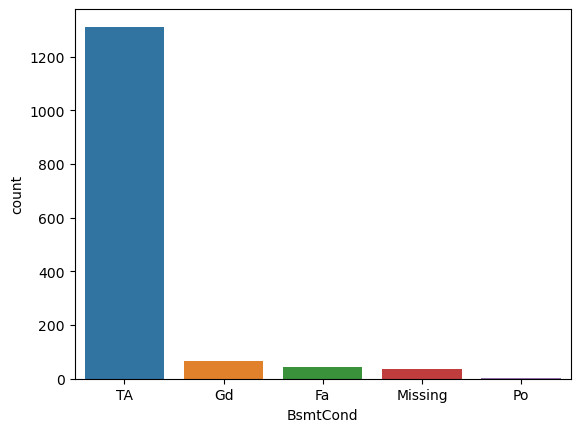

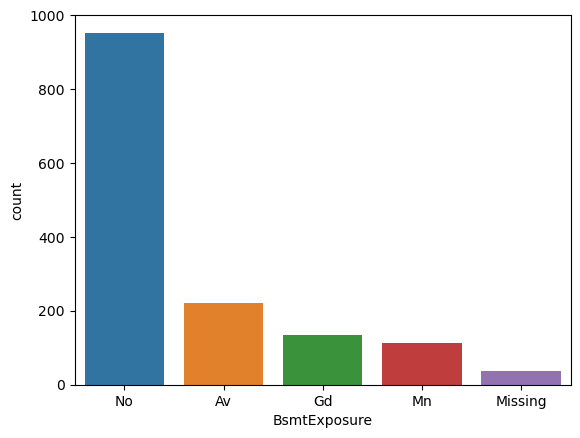

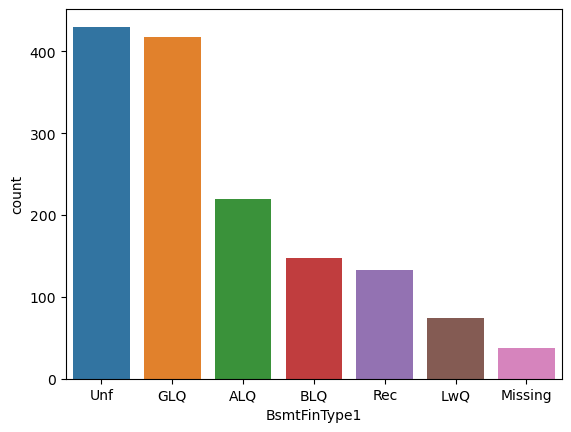

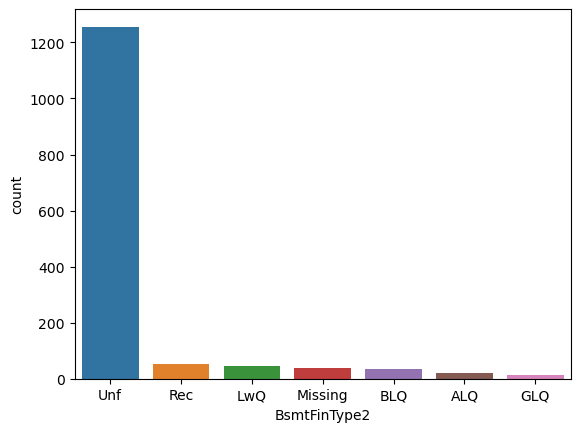

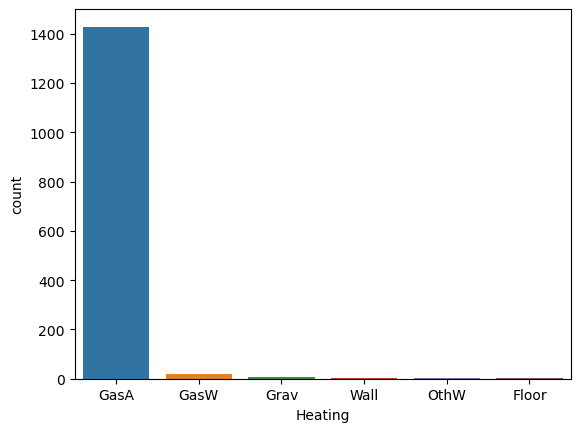

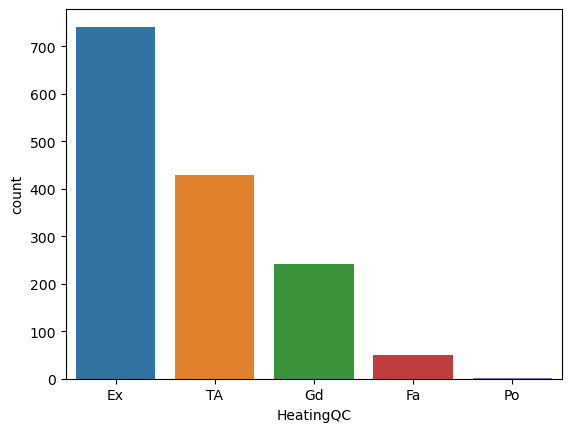

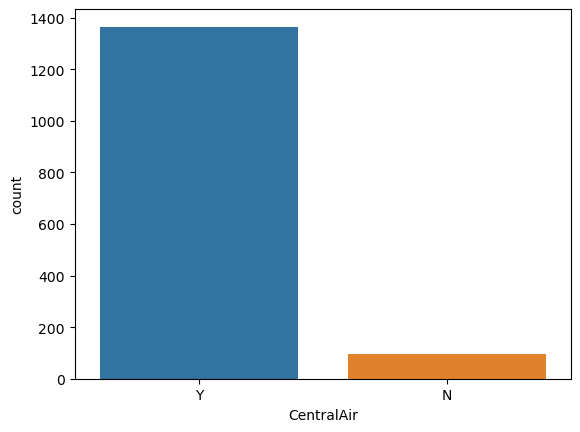

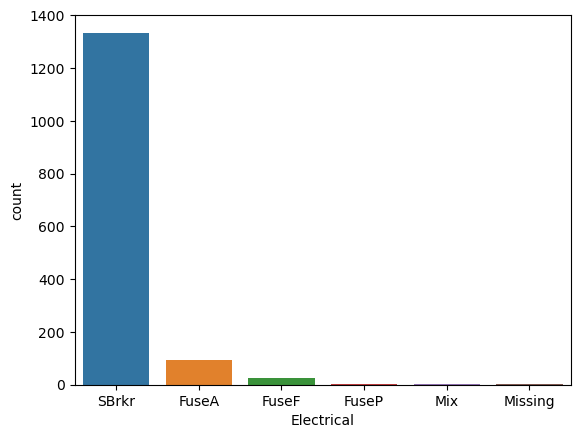

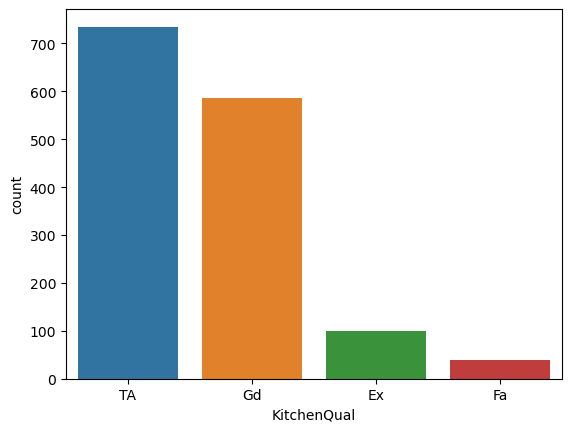

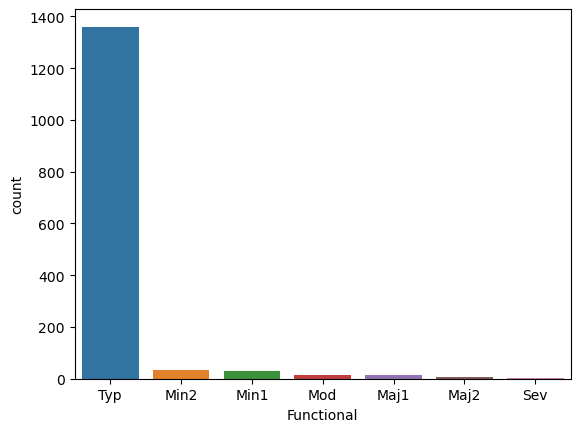

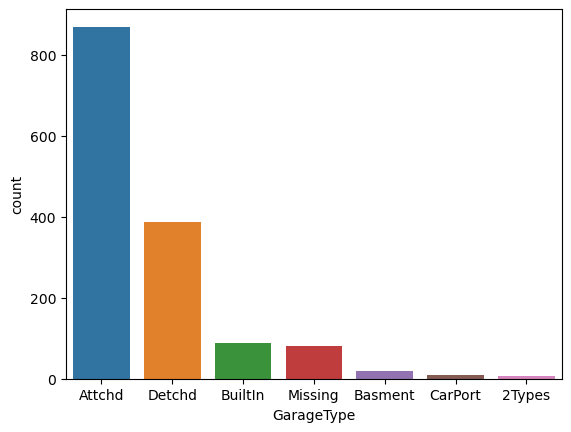

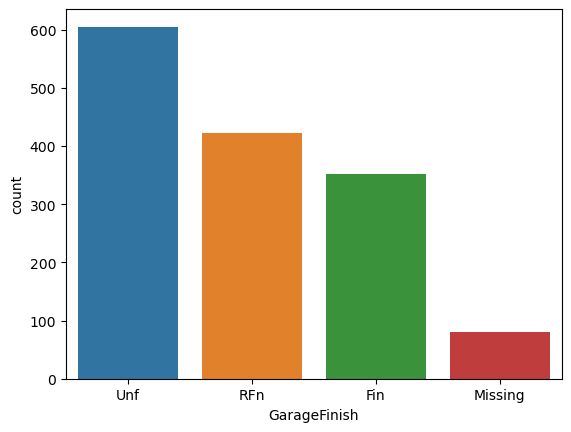

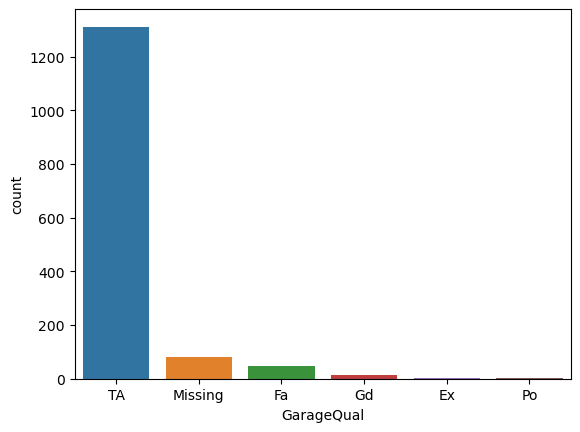

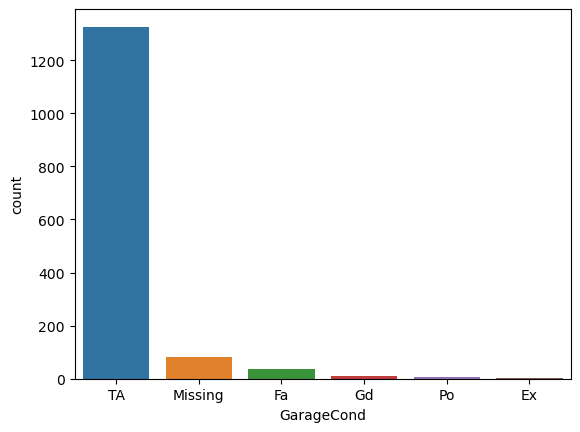

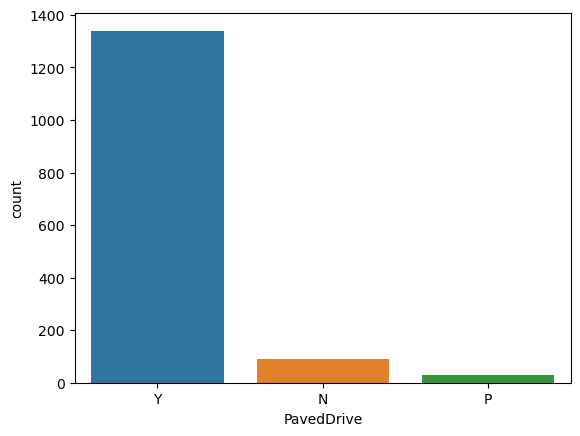

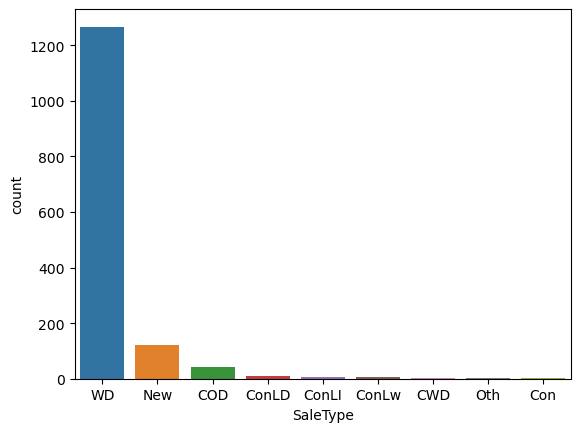

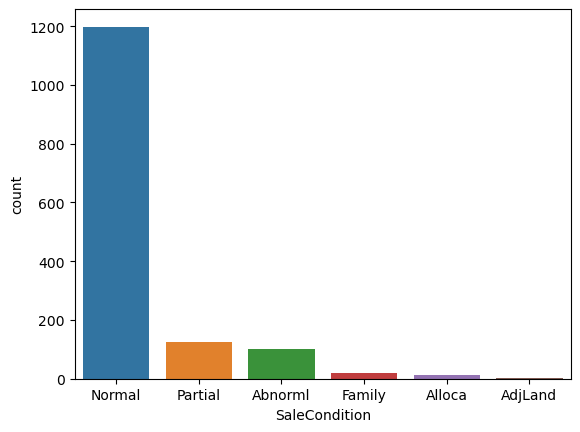

In [1138]:
for column in df_cat.columns:
    plt.figure()
    sns.countplot(x=column, data=df_cat, order=df_cat[column].value_counts().index)
    plt.show()

### 4.c. Identify significant variables using p-values and Chi-Square values

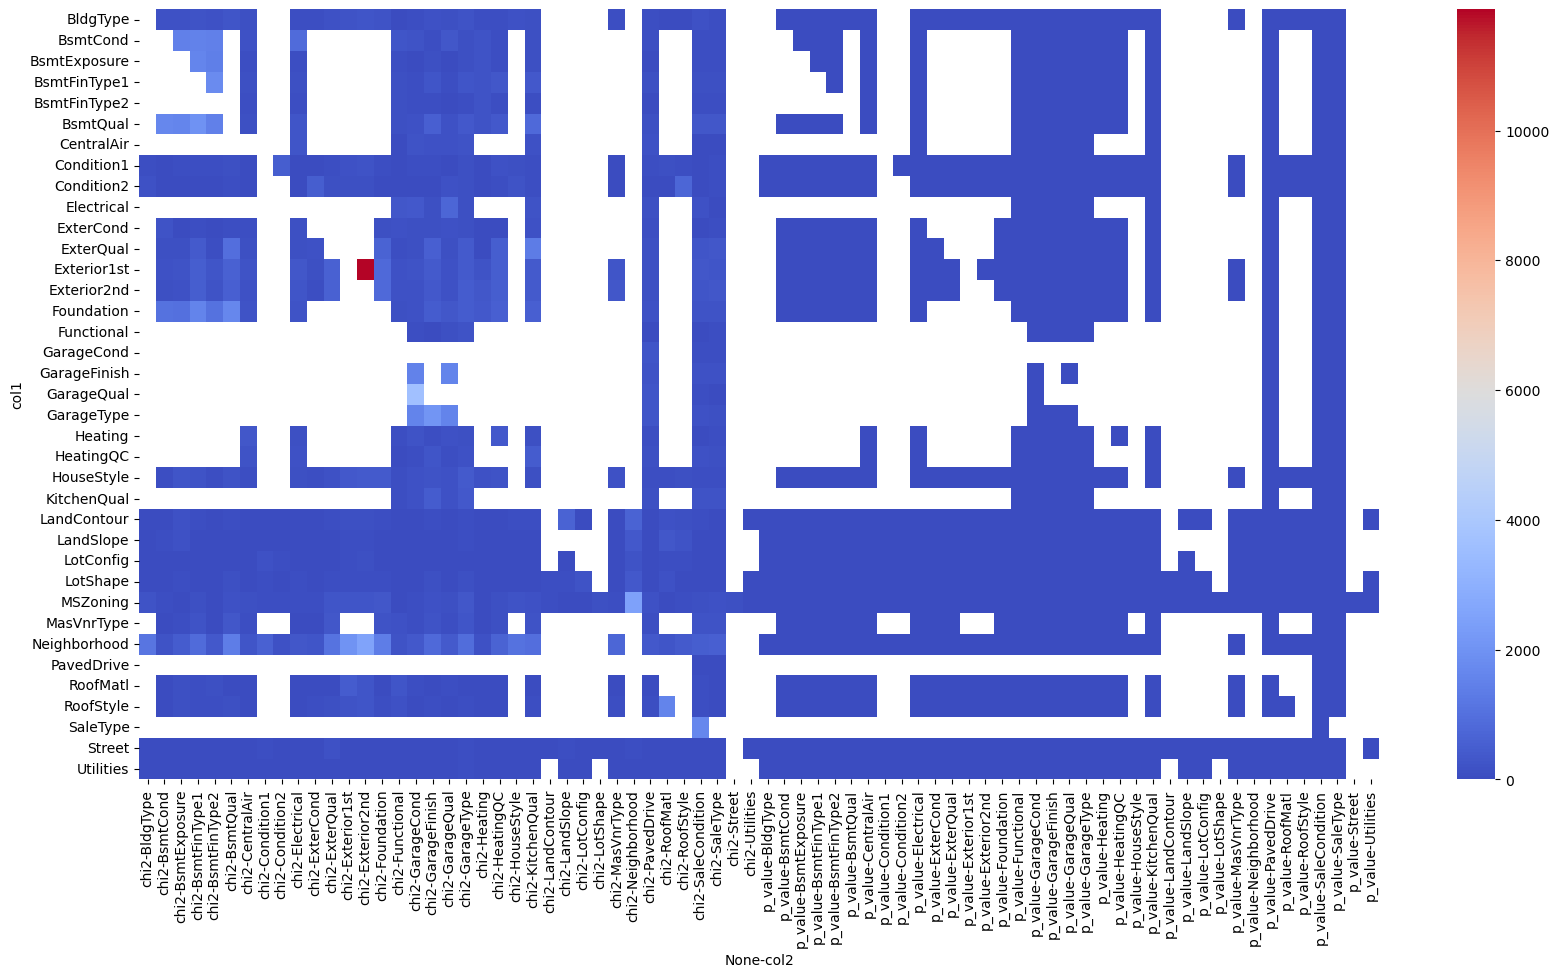

In [1139]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get all possible combinations of columns
combinations = itertools.combinations(df_cat.columns, 2)


# Create an empty dataframe to store the results
results = pd.DataFrame(columns=['col1', 'col2', 'chi2','p_value'])

# Iterate over each combination of columns
for col1, col2 in combinations:
    # Create a contingency table
    contingency_table = pd.crosstab(df_cat[col1], df_cat[col2])
    if contingency_table.values.sum() == 0:
        continue
    #calculate the chi-square statistic and p-value
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # Append the results to the dataframe
    results = pd.concat([results, pd.DataFrame({'col1': [col1], 'col2': [col2], 'chi2':[chi2],'p_value': [p]})])

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(results.pivot("col1", "col2", ["chi2","p_value"]), cmap='coolwarm', annot=False, fmt='.4f',ax=ax)
plt.show()




#### Significant Variables based on p-values

In [1140]:
# set a significance threshold
alpha = 0.05

# filter the results dataframe to include only the rows where the p-value is less than or equal to the threshold
significant_results = results[results['p_value'] <= alpha]

# print the significant results
print(significant_results)


          col1           col2         chi2       p_value
0     MSZoning         Street    94.741584  1.293331e-19
0     MSZoning       LotShape   113.249403  1.359627e-18
0     MSZoning    LandContour    57.575368  6.221392e-08
0     MSZoning      LotConfig    39.751809  8.462387e-04
0     MSZoning      LandSlope    23.035272  3.319255e-03
..         ...            ...          ...           ...
0   GarageCond     PavedDrive   276.722064  1.279549e-53
0   GarageCond  SaleCondition    79.652407  1.293424e-07
0   PavedDrive       SaleType    30.097791  1.750169e-02
0   PavedDrive  SaleCondition    42.584773  5.899112e-06
0     SaleType  SaleCondition  1652.675077  0.000000e+00

[528 rows x 4 columns]


In [1141]:
# Create an empty set to store the significant columns
significant_cols = set()

# Iterate over the significant results
for index, row in significant_results.iterrows():
    # Add the significant columns to the set
    significant_cols.add(row['col1'])
    significant_cols.add(row['col2'])

# Print the significant columns
print(significant_cols)
len(significant_cols)

{'PavedDrive', 'BsmtFinType2', 'Exterior1st', 'ExterQual', 'RoofStyle', 'Condition2', 'BsmtExposure', 'Neighborhood', 'BldgType', 'Exterior2nd', 'GarageCond', 'Heating', 'BsmtQual', 'LotShape', 'BsmtFinType1', 'GarageQual', 'SaleType', 'Street', 'Functional', 'ExterCond', 'Condition1', 'LandSlope', 'GarageType', 'CentralAir', 'GarageFinish', 'LotConfig', 'MasVnrType', 'HouseStyle', 'Electrical', 'KitchenQual', 'LandContour', 'Utilities', 'HeatingQC', 'SaleCondition', 'Foundation', 'BsmtCond', 'MSZoning', 'RoofMatl'}


38

#### Understand which variables are associated with most other variables : 

In [1142]:
# Create a dictionary to store the number of significant associations for each column
association_counts = {col: 0 for col in df_cat.columns}

# Iterate over the significant results
for index, row in significant_results.iterrows():
    # Increment the association count for each column in the significant results
    association_counts[row['col1']] += 1
    association_counts[row['col2']] += 1

# Sort the association counts by value
sorted_association_counts = dict(sorted(association_counts.items(), key=lambda item: item[1], reverse=True))

# Print the variables with the highest association counts
print("Variables with the highest association counts:")
for variable, count in sorted_association_counts.items():
    if count > 0:
        print(f"{variable}: {count}")
        


Variables with the highest association counts:
GarageType: 36
Neighborhood: 35
BldgType: 34
Exterior2nd: 34
ExterQual: 34
BsmtExposure: 34
MSZoning: 33
HouseStyle: 33
Exterior1st: 33
BsmtQual: 33
KitchenQual: 33
BsmtFinType1: 32
PavedDrive: 32
Foundation: 31
BsmtFinType2: 31
GarageFinish: 31
BsmtCond: 30
HeatingQC: 30
CentralAir: 30
GarageCond: 30
SaleCondition: 30
MasVnrType: 29
GarageQual: 29
LotShape: 28
Electrical: 28
LandContour: 27
RoofStyle: 27
ExterCond: 27
Functional: 25
SaleType: 25
Heating: 23
Condition1: 22
LotConfig: 18
RoofMatl: 17
LandSlope: 16
Condition2: 15
Street: 13
Utilities: 8


In [1144]:
# Create an empty dataframe to store the significant variables
df_cat_signifiacnt = pd.DataFrame()

# Iterate over the variables with the highest association counts
for variable, count in sorted_association_counts.items():
    if count > 20:
        # Add the significant variable to the dataframe
        df_cat_signifiacnt = pd.concat([df_cat_signifiacnt, df[variable]], axis=1)

# Print the dataframe containing the significant variables
print(df_cat_signifiacnt)


     GarageType Neighborhood BldgType Exterior2nd ExterQual BsmtExposure  \
1        Attchd      CollgCr     1Fam     VinylSd        Gd           No   
2        Attchd      Veenker     1Fam     MetalSd        TA           Gd   
3        Attchd      CollgCr     1Fam     VinylSd        Gd           Mn   
4        Detchd      Crawfor     1Fam     Wd Shng        TA           No   
5        Attchd      NoRidge     1Fam     VinylSd        Gd           Av   
...         ...          ...      ...         ...       ...          ...   
1456     Attchd      Gilbert     1Fam     VinylSd        TA           No   
1457     Attchd       NWAmes     1Fam     Plywood        TA           No   
1458     Attchd      Crawfor     1Fam     CmentBd        Ex           No   
1459     Attchd          mes     1Fam     MetalSd        TA           Mn   
1460     Attchd      Edwards     1Fam     HdBoard        Gd           No   

     MSZoning HouseStyle Exterior1st BsmtQual  ... GarageQual LotShape  \
1          RL

### 5. Combine all the significant categorical and numerical variables

In [1151]:
# Concat Along Columns
df_combine = pd.concat([df_num_significant, df_cat_signifiacnt],axis=1)
df_combine

1stFlrSF  2ndFlrSF  Bedroom  BsmtFinSF1  BsmtFullBath  Fireplaces  \
1          856       854        3         706             1           0   
2         1262         0        3         978             0           1   
3          920       866        3         486             1           1   
4          961       756        3         216             1           1   
5         1145      1053        4         655             1           1   
...        ...       ...      ...         ...           ...         ...   
1456       953       694        3           0             0           1   
1457      2073         0        3         790             1           2   
1458      1188      1152        4         275             0           2   
1459      1078         0        2          49             1           0   
1460      1256         0        3         830             1           0   

      FullBath  GarageArea  GarageCars  GrLivArea  ...  GarageQual  LotShape  \
1            2         548           2       1710  ...          TA       Reg   
2            2         460           2       1262  ...          TA       Reg   
3            2         608           2       1786  ...          TA       IR1   
4            1         642           3       1717  ...          TA       IR1   
5            2         836           3       2198  ...          TA       IR1   
...        ...         ...         ...        ...  ...         ...       ...   
1456         2         460           2       1647  ...          TA       Reg   
1457         2         500           2       2073  ...          TA       Reg   
1458         2         252           1       2340  ...          TA       Reg   
1459         1         240           1       1078  ...          TA       Reg   
1460         1         276           1       1256  ...          TA       Reg   

      Electrical  LandContour  RoofStyle  ExterCond  Functional  SaleType  \
1          SBrkr          Lvl      Gable         TA         Typ        WD   
2          SBrkr          Lvl      Gable         TA         Typ        WD   
3          SBrkr          Lvl      Gable         TA         Typ        WD   
4          SBrkr          Lvl      Gable         TA         Typ        WD   
5          SBrkr          Lvl      Gable         TA         Typ        WD   
...          ...          ...        ...        ...         ...       ...   
1456       SBrkr          Lvl      Gable         TA         Typ        WD   
1457       SBrkr          Lvl      Gable         TA        Min1        WD   
1458       SBrkr          Lvl      Gable         Gd         Typ        WD   
1459       FuseA          Lvl        Hip         TA         Typ        WD   
1460       SBrkr          Lvl      Gable         TA         Typ        WD   

     Heating Condition1  
1       GasA       Norm  
2       GasA      Feedr  
3       GasA       Norm  
4       GasA       Norm  
5       GasA       Norm  
...      ...        ...  
1456    GasA       Norm  
1457    GasA       Norm  
1458    GasA       Norm  
1459    GasA       Norm  
1460    GasA       Norm  

[1460 rows x 50 columns]

### 6. Outlier Detection using Box Plot for numerical variables only:

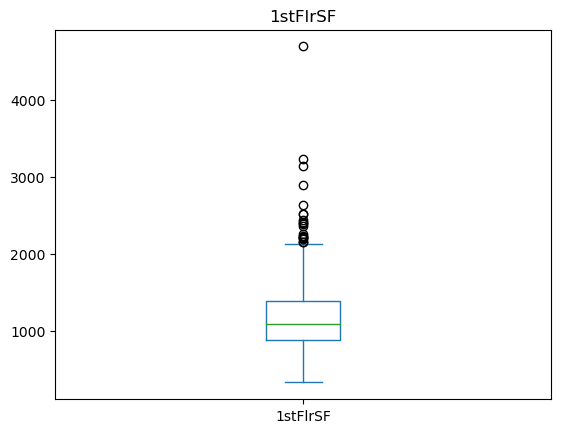

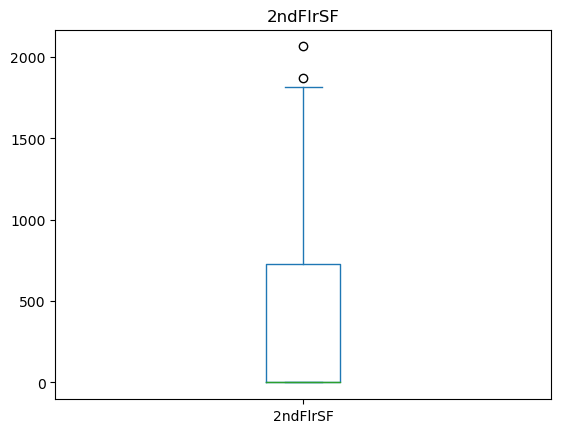

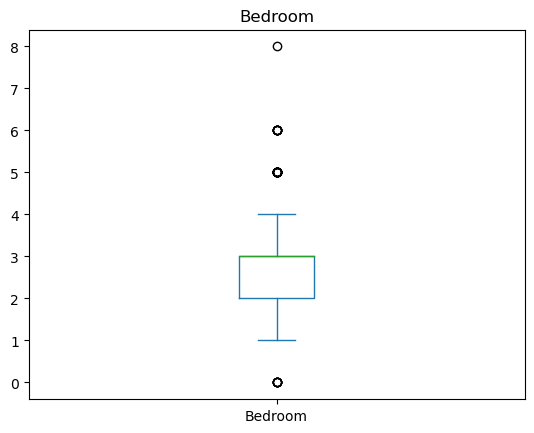

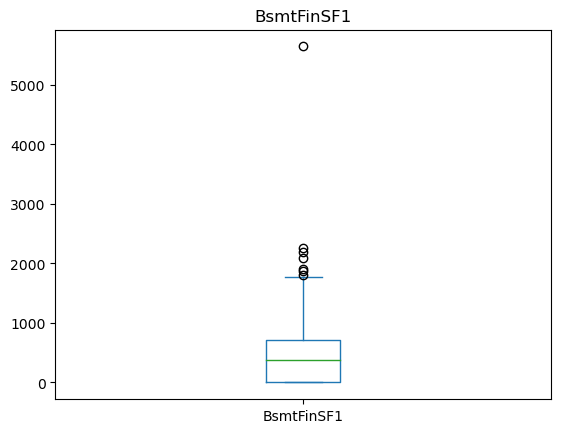

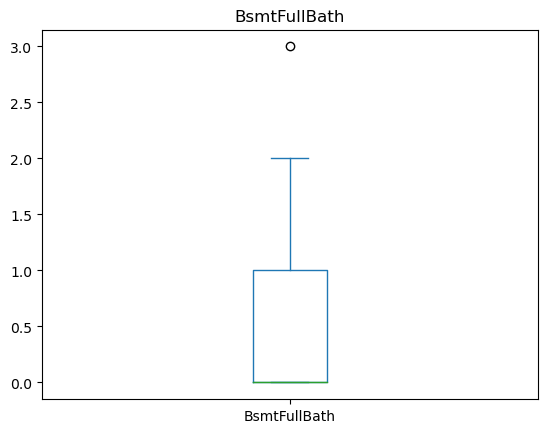

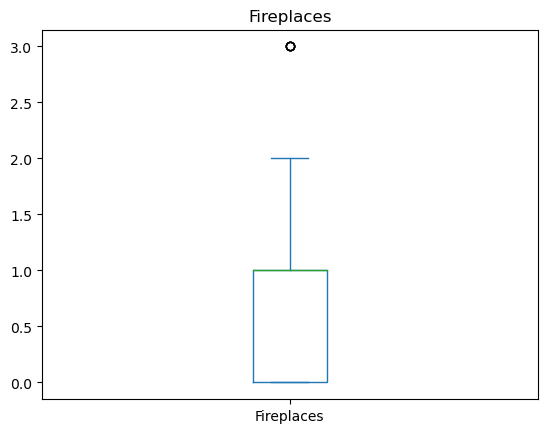

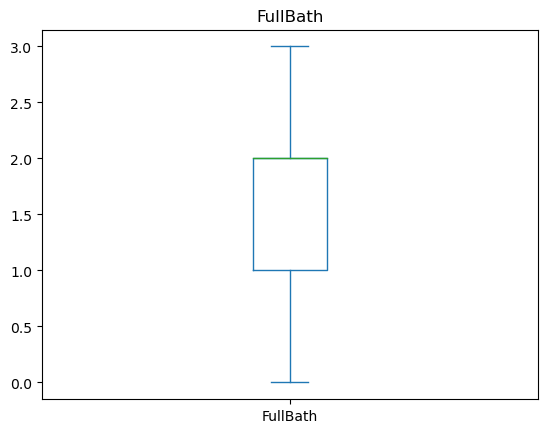

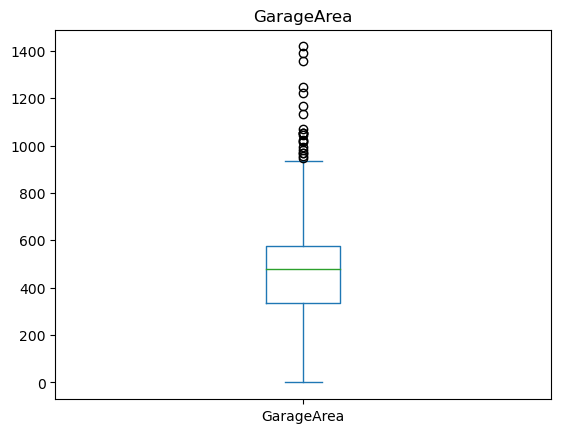

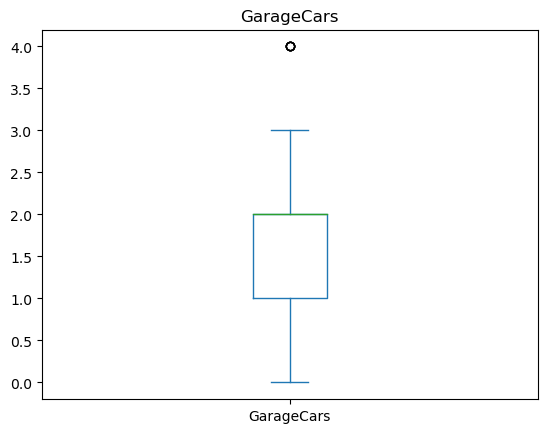

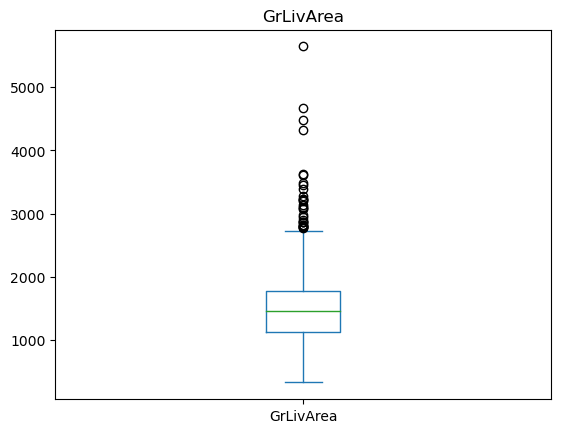

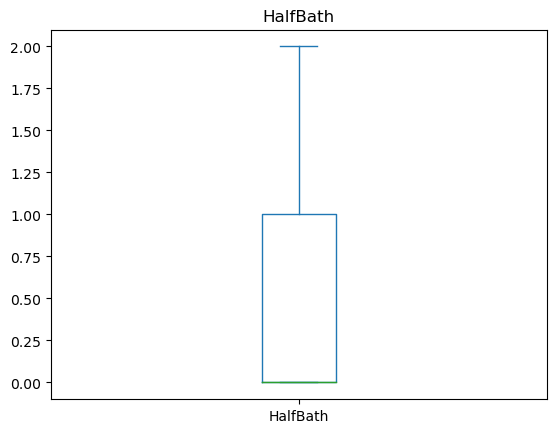

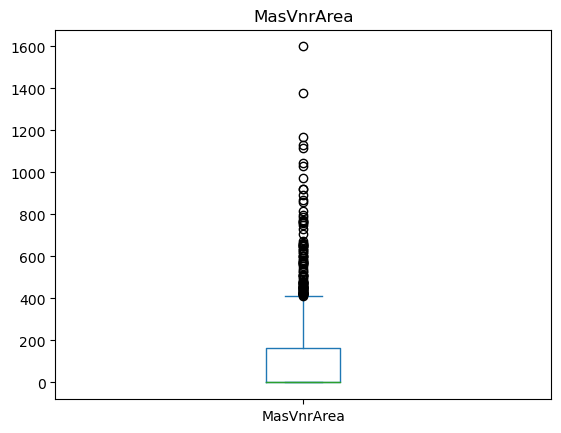

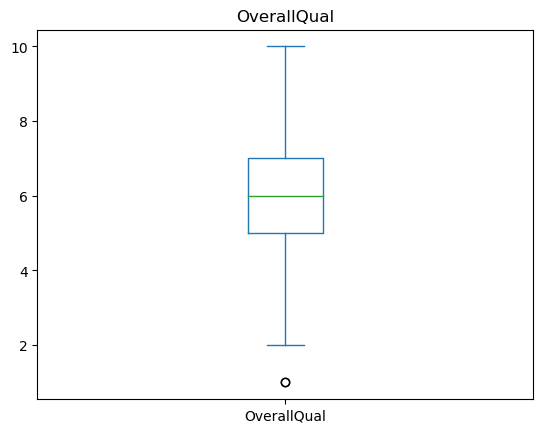

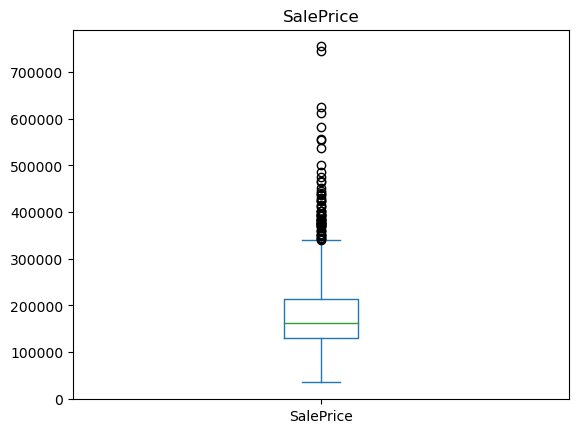

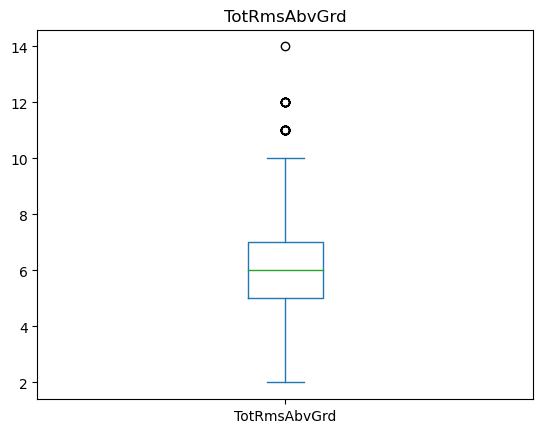

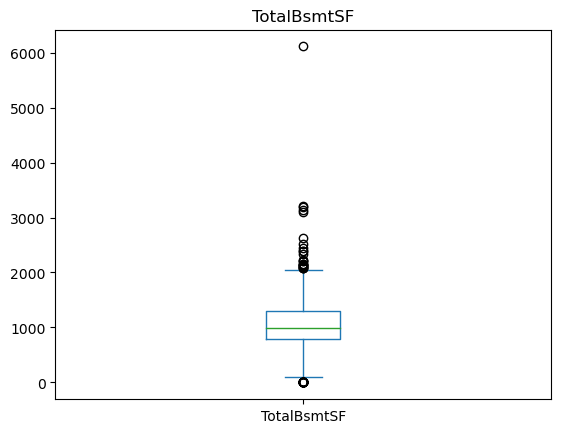

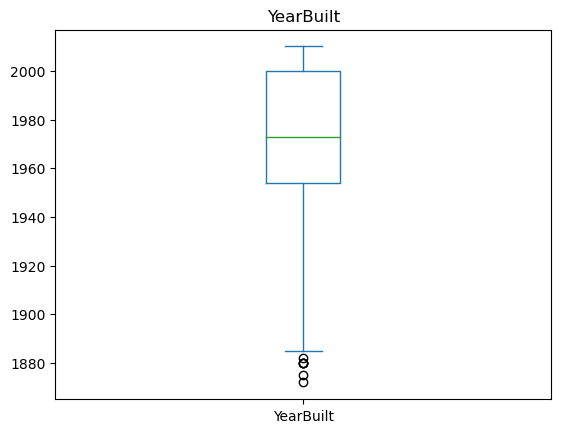

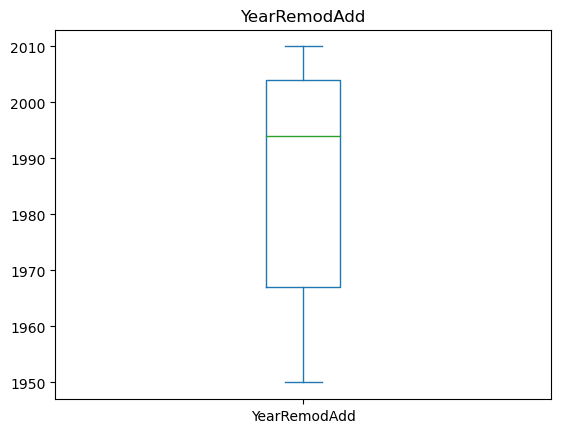

In [1156]:
for column in df_num_significant.columns:
    plt.figure()
    df_num_significant[column].plot.box()
    plt.title(column)
    plt.show()


### 6. Outlier Detection using Count Plot for categorical variables only:

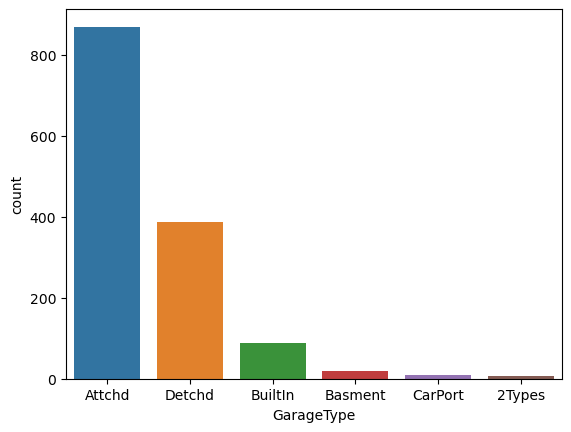

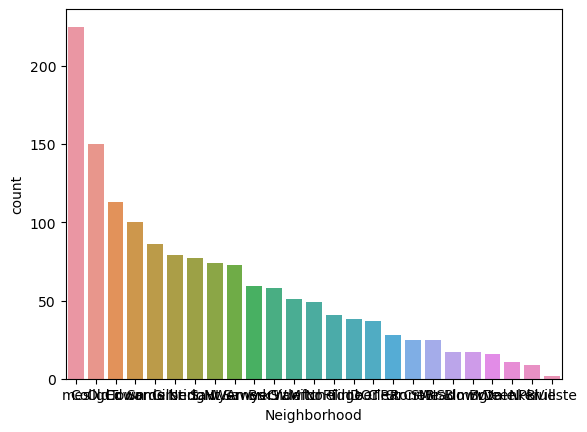

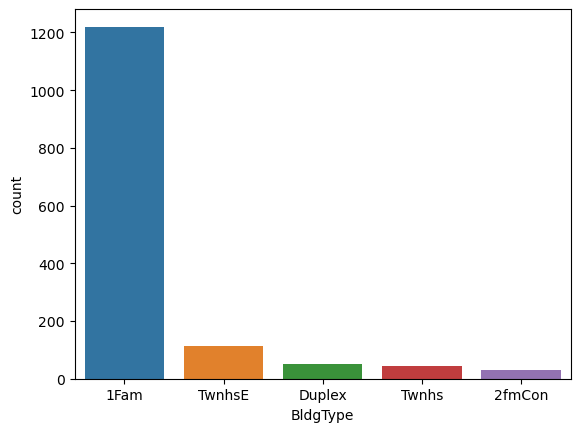

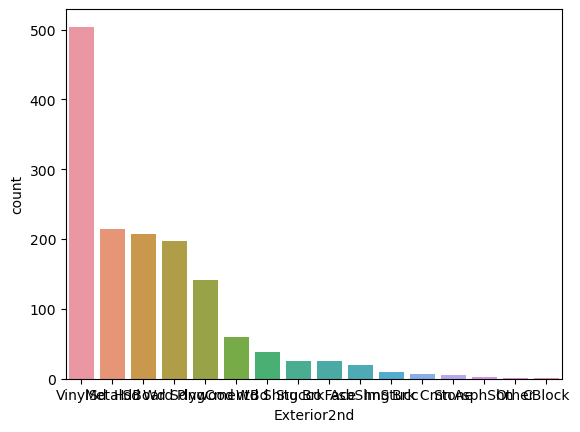

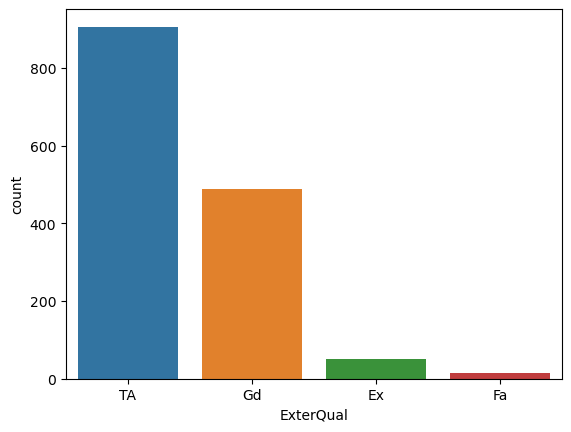

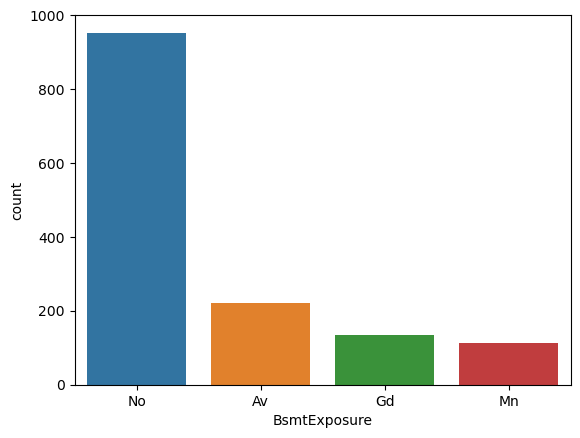

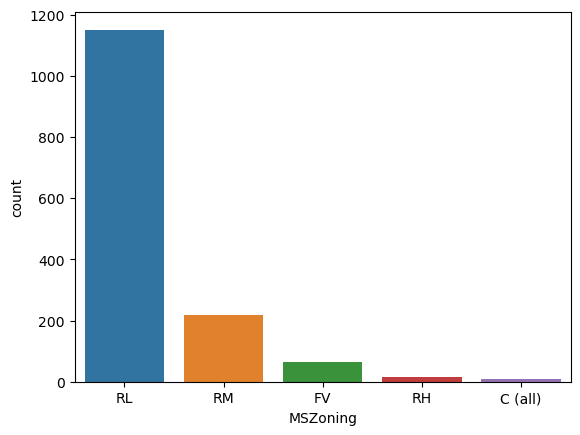

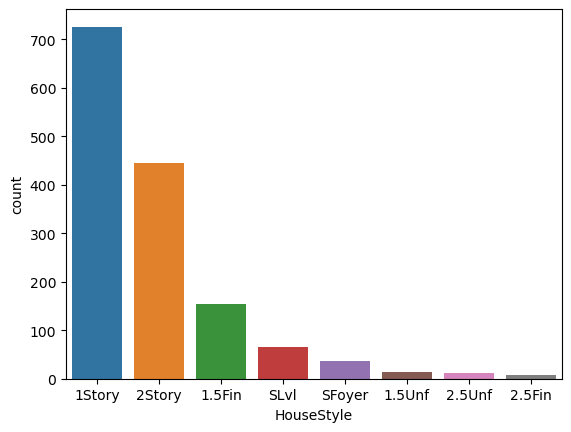

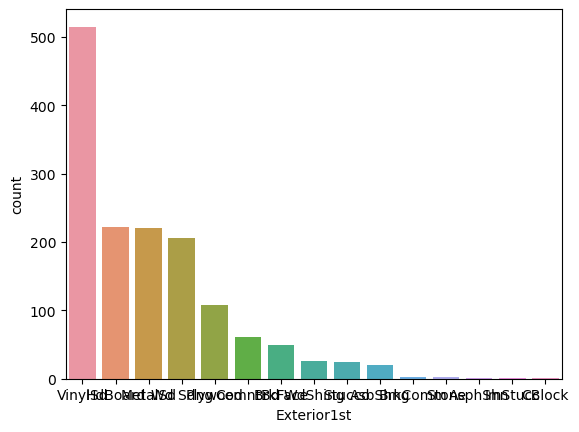

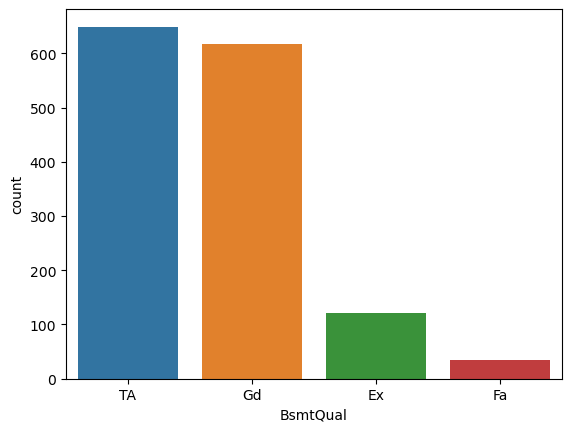

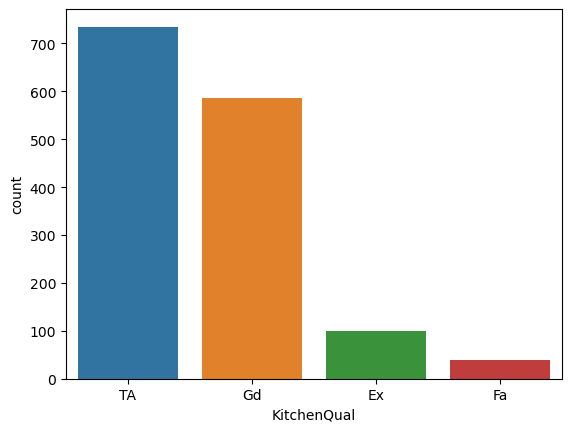

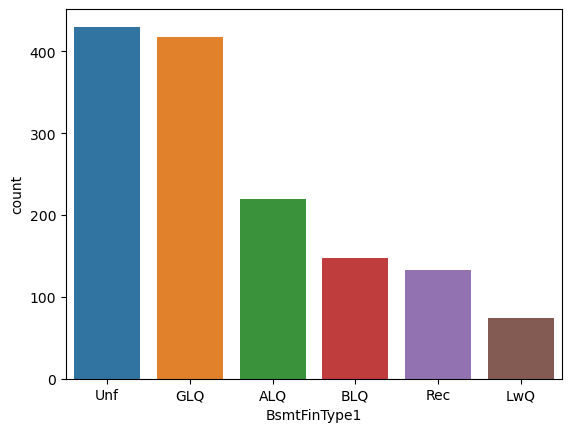

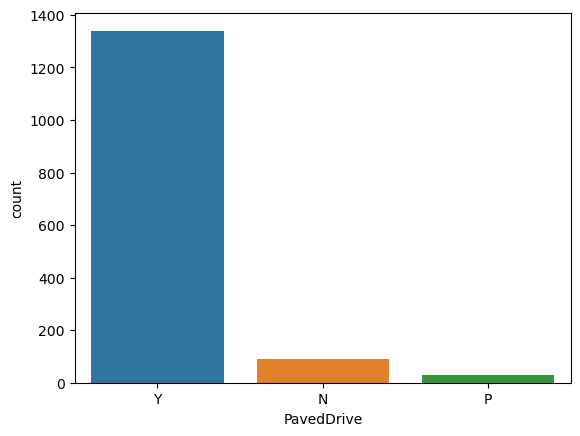

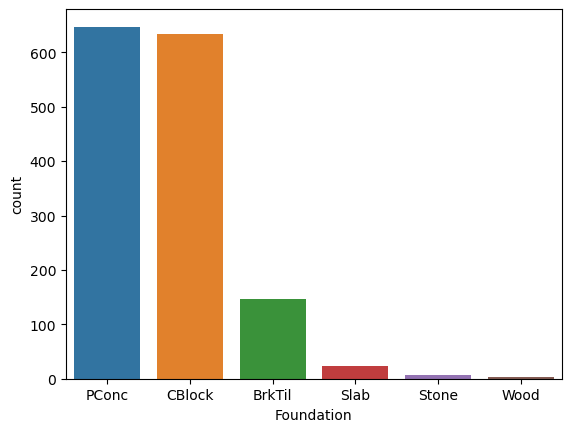

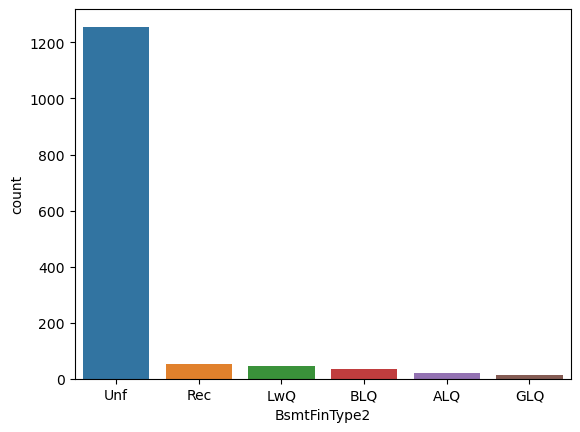

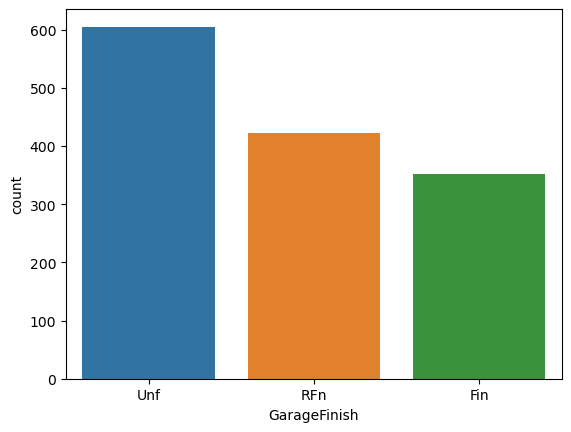

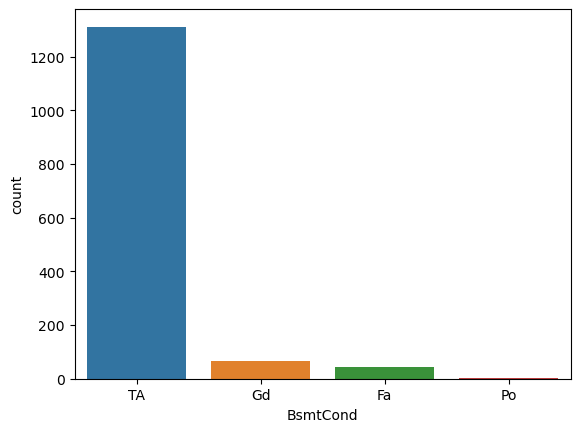

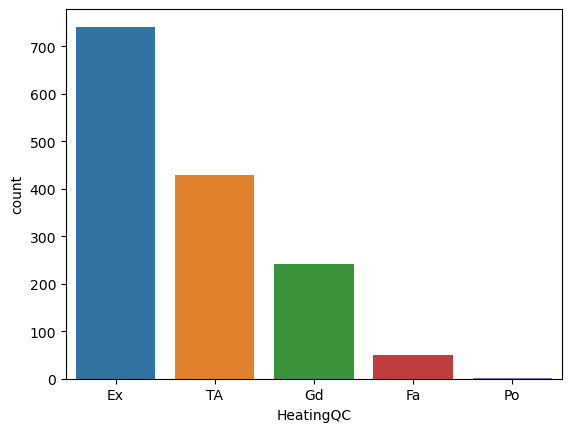

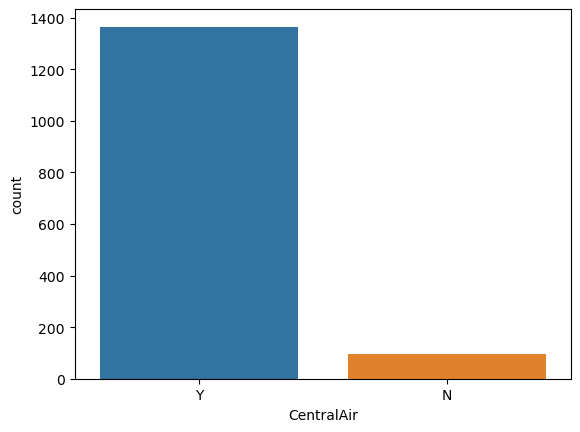

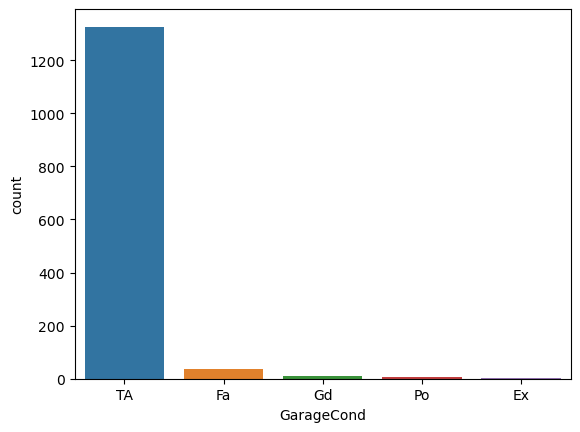

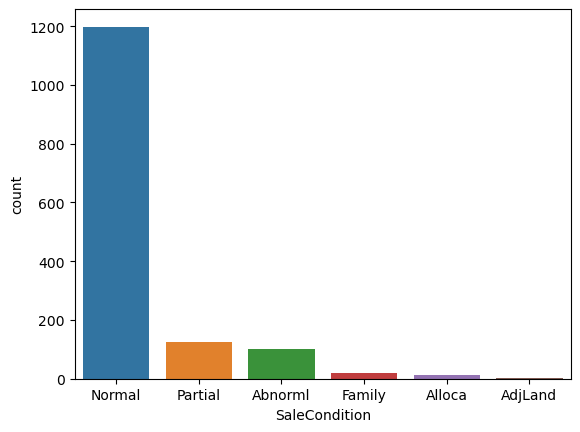

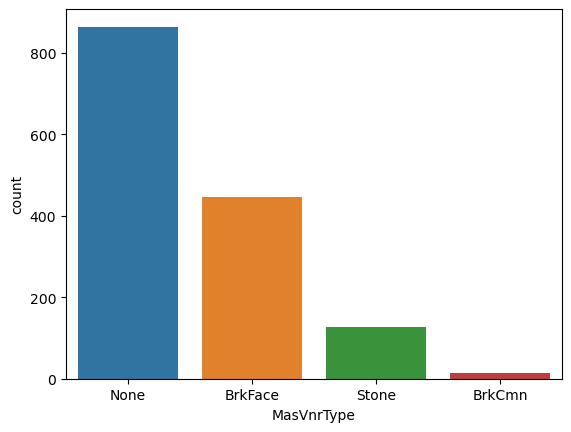

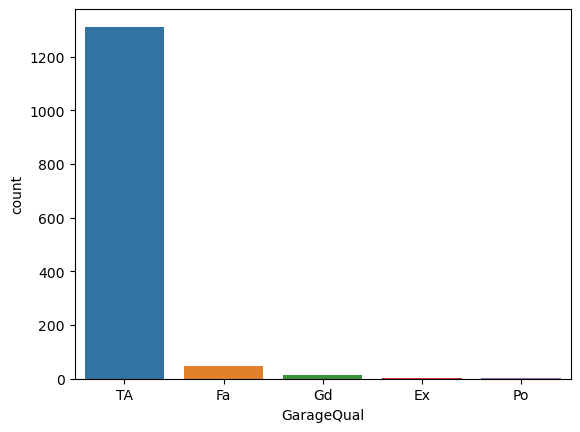

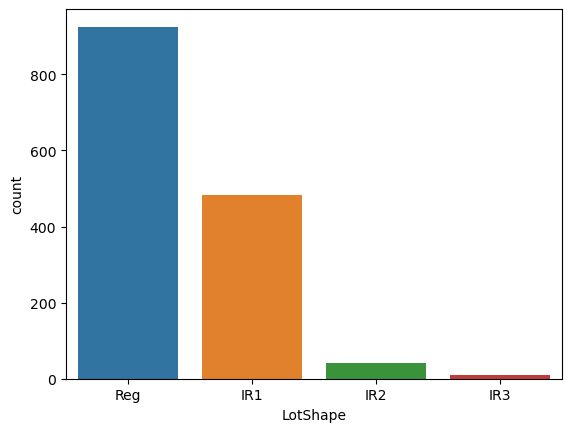

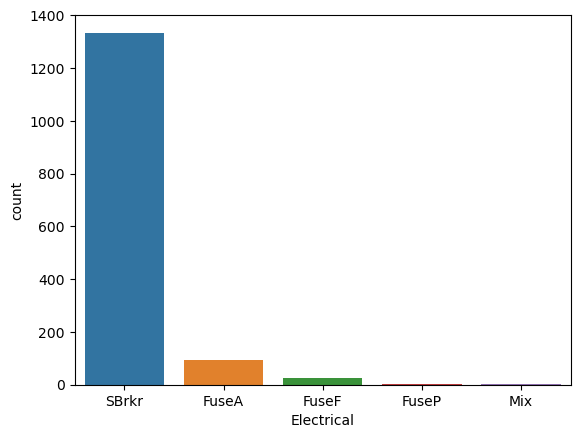

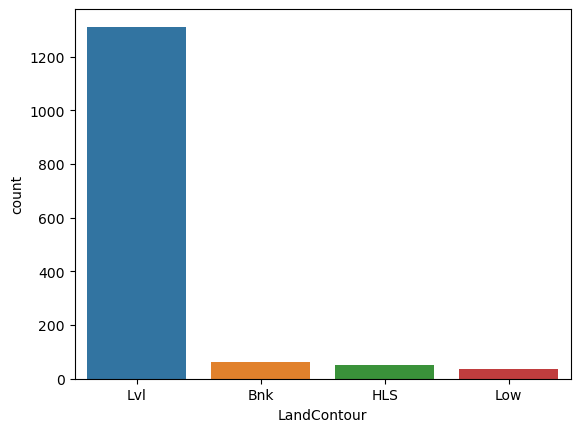

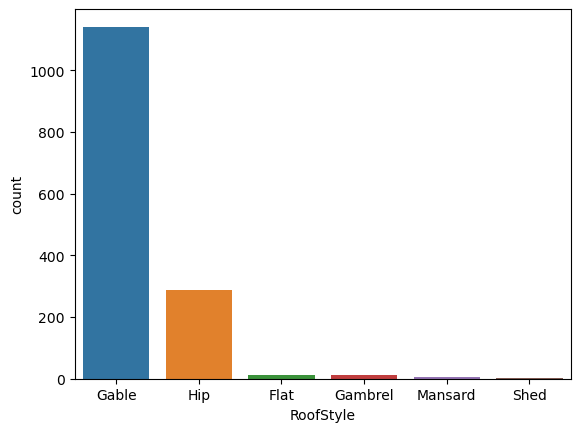

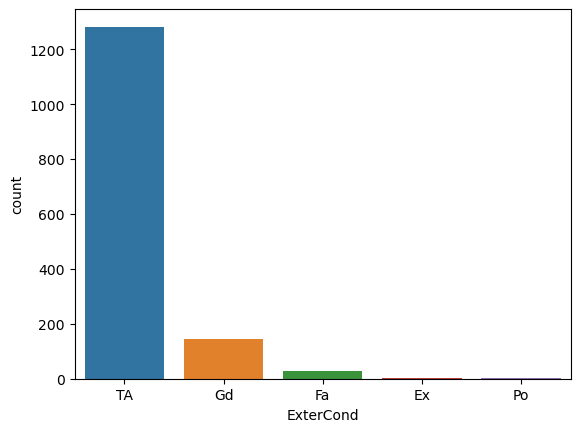

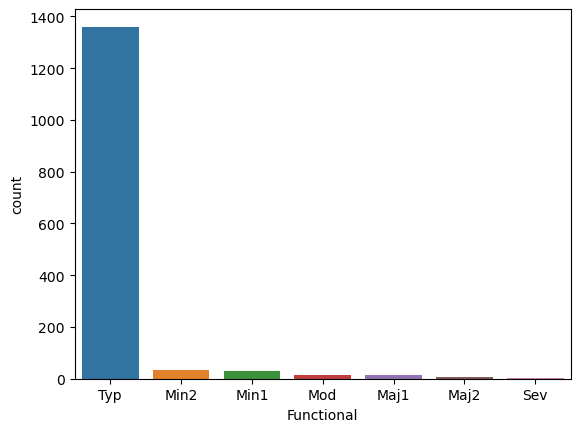

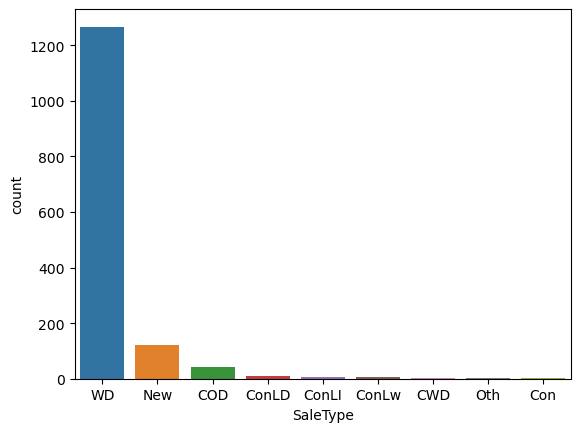

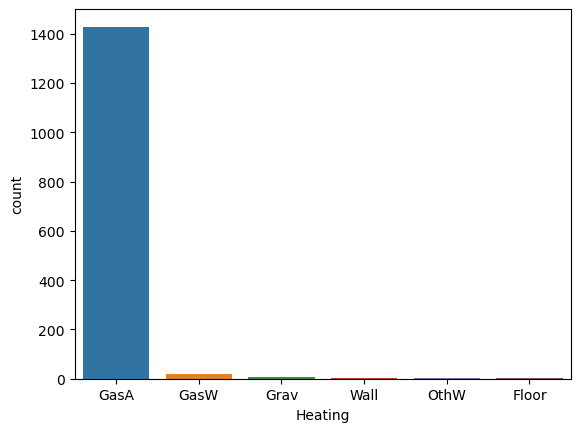

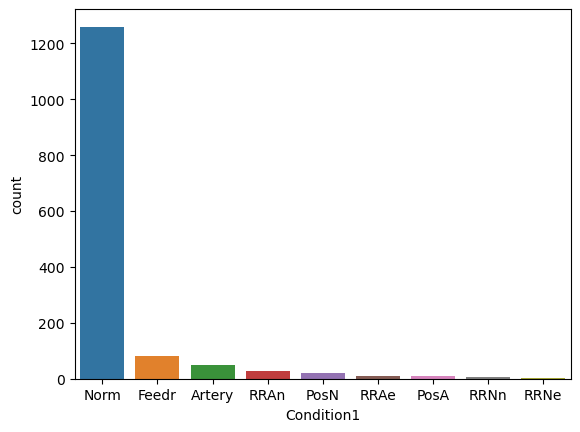

In [1158]:
for column in df_cat_signifiacnt.columns:
    plt.figure()
    sns.countplot(x=column, data=df_combine, order=df_cat_signifiacnt[column].value_counts().index)
    plt.show()

### Note : df_combine can be used as the new data set after the following steps performed : 
Perform the following steps:
1.	Understand the dataset:
a.	Identify the shape of the dataset
b.	Identify variables with null values
c.	Identify variables with unique values
2.	Generate a separate dataset for numerical and categorical variables
3.	EDA of numerical variables:
a.	Missing value treatment
b.	Identify the skewness and distribution
c.	Identify significant variables using a correlation matrix 
d.	Pair plot for distribution and density
4.	EDA of categorical variables
a.	Missing value treatment
b.	Count plot for bivariate analysis
c.	Identify significant variables using p-values and Chi-Square values
5.	Combine all the significant categorical and numerical variables
6.	Plot box plot for the new dataset to find the variables with outliers
